ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Ventas de Copiadoras

Datos cargados: 15 representantes de ventas
Variable independiente (X): Número de llamadas de ventas
Variable dependiente (Y): Número de copiadoras vendidas
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generating Histograms...


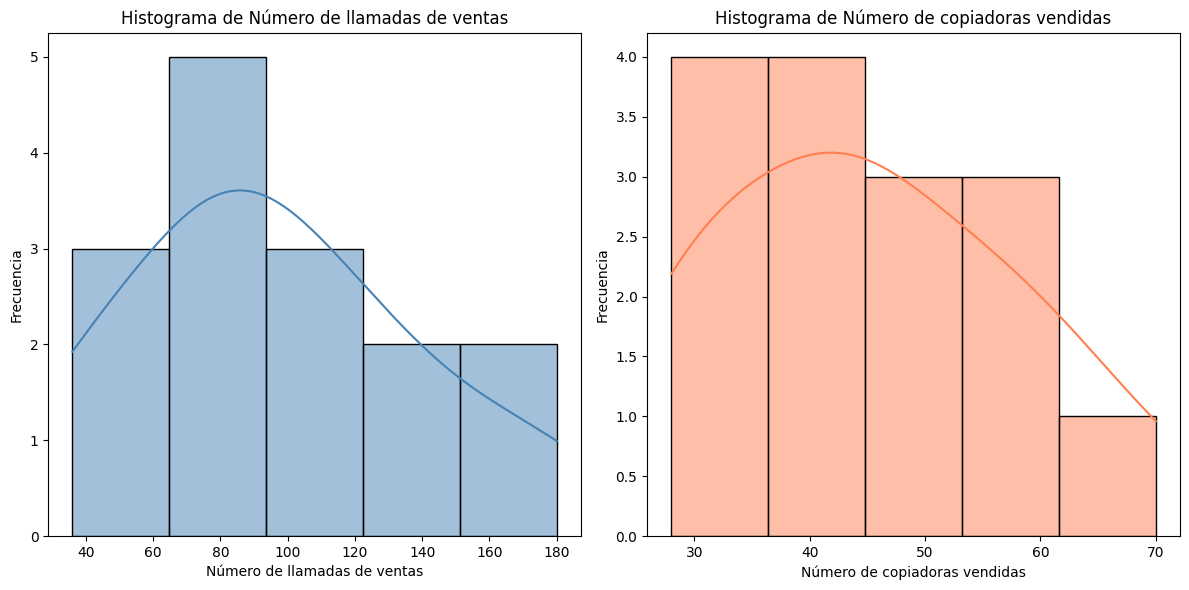

------------------------------
Generating Scatter Plot...


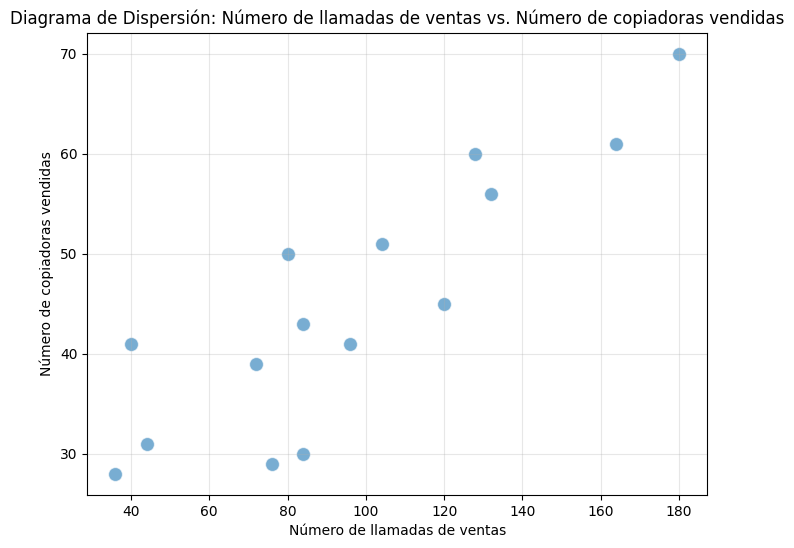

------------------------------
Performing Normality Tests...
Shapiro-Wilk test for 'Número de llamadas de ventas': Statistics=0.953, p-value=0.578
Shapiro-Wilk test for 'Número de copiadoras vendidas': Statistics=0.949, p-value=0.505

Interpretation of normality test results:
✓ The 'Número de llamadas de ventas' variable appears to be normally distributed (p > 0.05).
✓ The 'Número de copiadoras vendidas' variable appears to be normally distributed (p > 0.05).
------------------------------
Calculating Correlation Coefficients...
Pearson correlation coefficient: 0.8646
Kendall correlation coefficient: 0.7019
Spearman correlation coefficient: 0.8551
------------------------------
Determining the most appropriate correlation coefficient...
✓ Both variables appear normally distributed. The Pearson correlation coefficient (0.8646) is the most appropriate.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

H

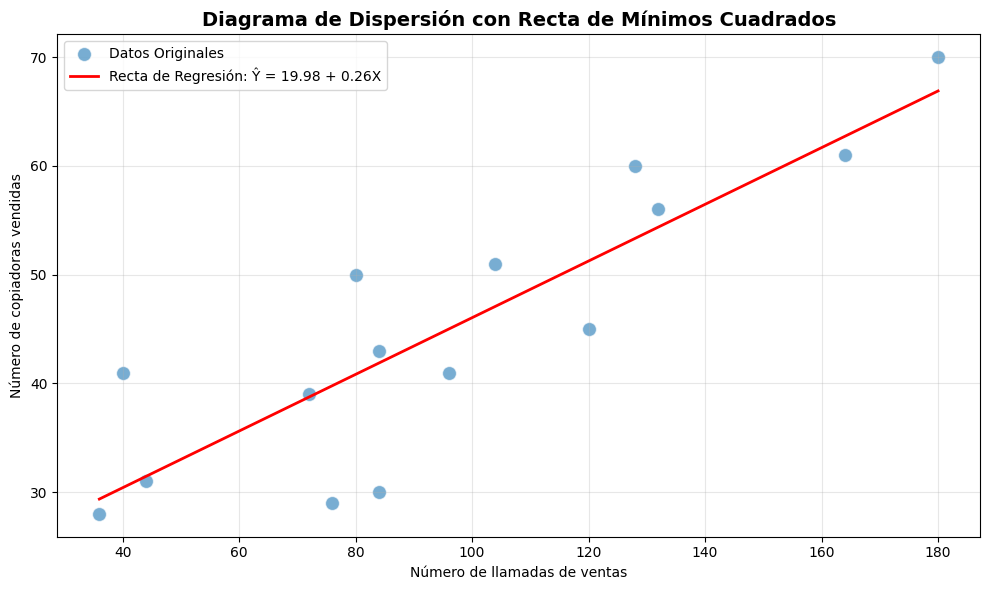


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β > 0 (Existe una relación lineal positiva significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 587.1100
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 6.7203

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 25600.0000
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.0420

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (0.2606 - 0) / 0.0420
   t calculado = 6.2051

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 13
   Valor crítico (t_0.05,13) = 1.7709
   Valor p (una cola) = 0.0000

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
t calculado (6.2051) > t crítico (1.7709)
valor p (0.0000) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente diferen

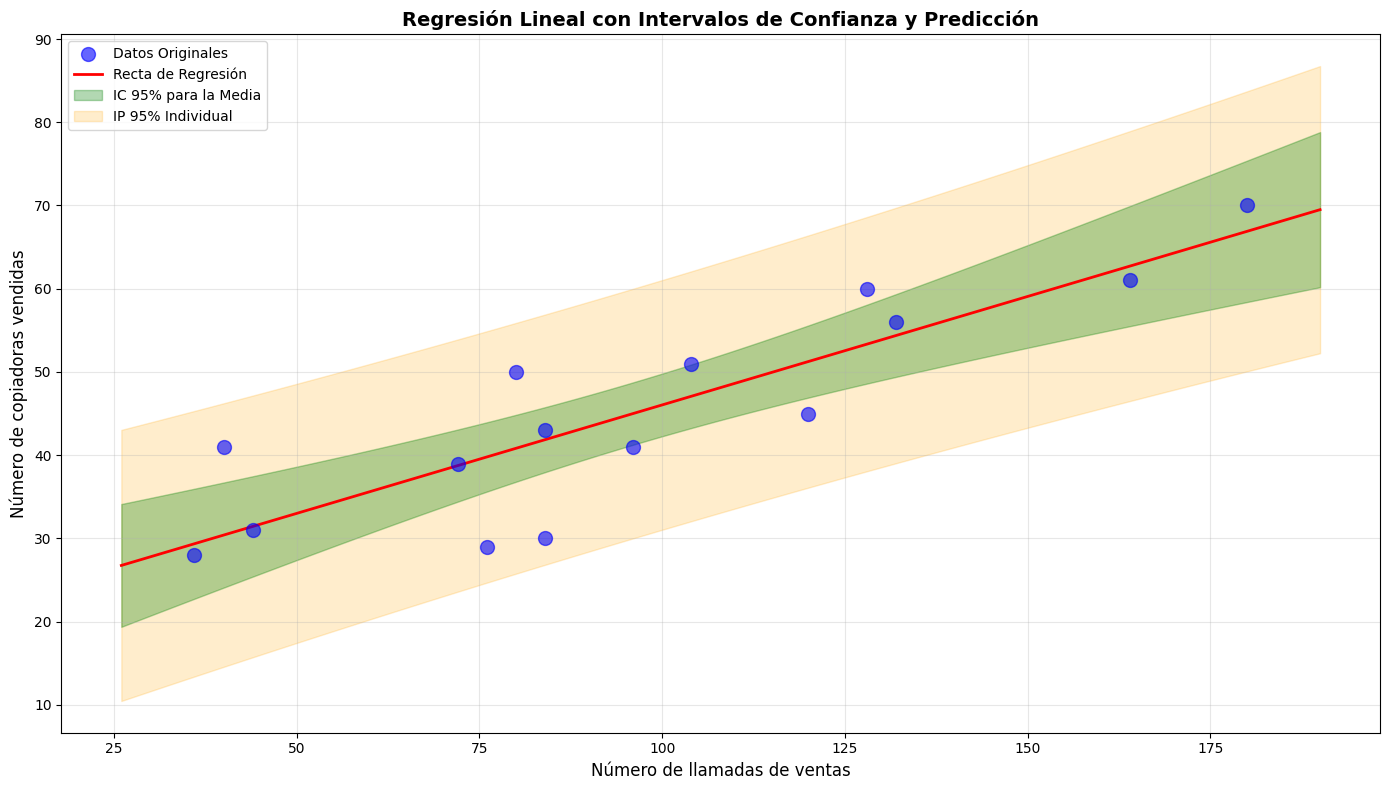

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Representante      X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
Brian Virrost      96       41       45.00    -4.00      -0.60     
Carlos Ramirez     40       41       30.41    10.59      1.58      
Carol Saia         104      51       47.09    3.91       0.58      
Greg Fish          128      60       53.34    6.66       0.99      
Jeff Hall          164      61       62.72    -1.72      -0.26     
Mark Reynolds      76       29       39.79    -10.79     -1.61     
Meryl Rumsey       72       39       38.75    0.25       0.04      
Mike Kiel          80       50       40.83    9.17       1.36      
Ray Snarsky        36       28       29.36    -1.36      -0.20     
Rich Niles         84       43       41.87    1.13       0.17      
Ron Broderick      180      70       66.89    3.11       0.46      
Sal Spina          132   

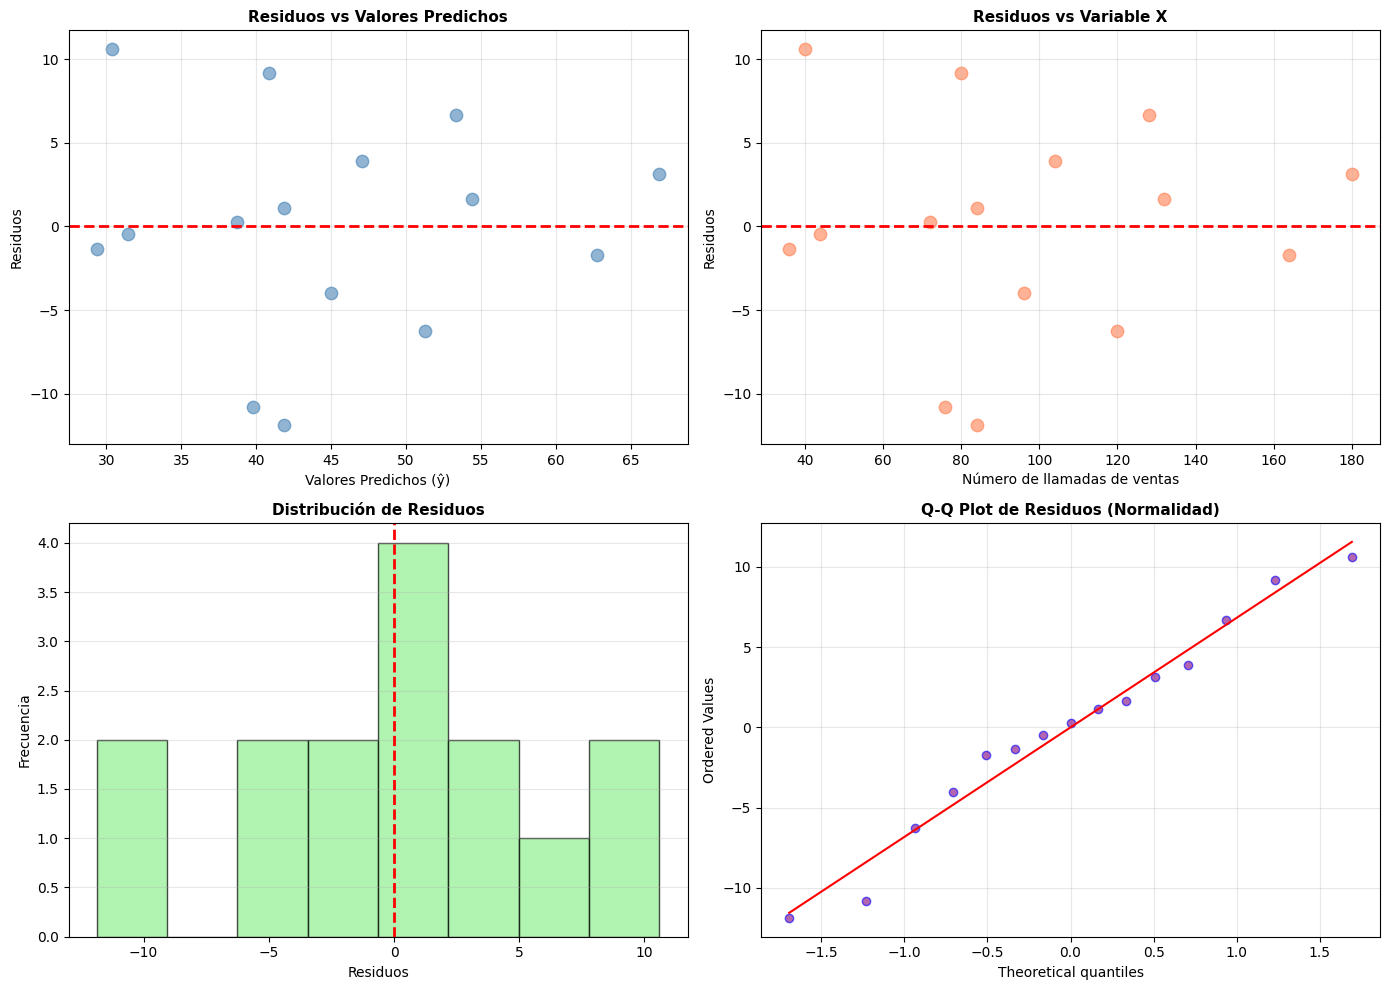


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9699
  Valor p = 0.8559
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Número de llamadas de ventas: p-value = 0.5777
     ✓ Distribución normal
   • Número de copiadoras vendidas: p-value = 0.5052
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.8559
     ✓ Distribución normal



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (VENTAS DE COPIADORAS) ---
data = {
    'Representantes de ventas': [
        'Brian Virrost', 'Carlos Ramirez', 'Carol Saia', 'Greg Fish',
        'Jeff Hall', 'Mark Reynolds', 'Meryl Rumsey', 'Mike Kiel',
        'Ray Snarsky', 'Rich Niles', 'Ron Broderick', 'Sal Spina',
        'Soni Jones', 'Susan Welch', 'Tom Keller'
    ],
    'Número de llamadas de ventas': [
        96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84
    ],
    'Número de copiadoras vendidas': [
        41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30
    ]
}
df = pd.DataFrame(data)

variable_x = 'Número de llamadas de ventas'
variable_y = 'Número de copiadoras vendidas'
n = len(df)
alfa = 0.05

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Ventas de Copiadoras")
print("=" * 70)
print(f"\nDatos cargados: {n} representantes de ventas")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerating Histograms...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.xlabel(variable_x)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.xlabel(variable_y)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x} vs. {variable_y}')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Performing Normality Tests...")
shapiro_test_calls = shapiro(df[variable_x])
print(f"Shapiro-Wilk test for '{variable_x}': Statistics={shapiro_test_calls.statistic:.3f}, p-value={shapiro_test_calls.pvalue:.3f}")

shapiro_test_sold = shapiro(df[variable_y])
print(f"Shapiro-Wilk test for '{variable_y}': Statistics={shapiro_test_sold.statistic:.3f}, p-value={shapiro_test_sold.pvalue:.3f}")

print("\nInterpretation of normality test results:")
if shapiro_test_calls.pvalue > alfa:
    print(f"✓ The '{variable_x}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_x}' variable does not appear to be normally distributed (p <= 0.05).")

if shapiro_test_sold.pvalue > alfa:
    print(f"✓ The '{variable_y}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_y}' variable does not appear to be normally distributed (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculating Correlation Coefficients...")
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determining the most appropriate correlation coefficient...")
if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
    print(f"✓ Both variables appear normally distributed. The Pearson correlation coefficient ({pearson_corr:.4f}) is the most appropriate.")
else:
     print(f"⚠ At least one variable does not appear normally distributed. The Spearman correlation coefficient ({spearman_corr:.4f}) or Kendall correlation coefficient ({kendall_corr:.4f}) are more appropriate non-parametric measures.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r = pearson_corr
gl = n - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
except ZeroDivisionError:
    t_calculado = float('nan')

# Valor p (two-sided)
valor_p = t.sf(abs(t_calculado), gl) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo = t.ppf(1 - alfa / 2, gl)
t_critico_negativo = -t_critico_positivo

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n}")
print(f"Grados de libertad (gl): {gl}")
print(f"Coeficiente de correlación de Pearson (r): {r:.4f}")
print(f"Estadístico t calculado: {t_calculado:.4f}")
print(f"Valor crítico (t, α={alfa}): ±{t_critico_positivo:.4f}")
print(f"Valor p: {valor_p:.4f}")

# Criterio de Decisión
if valor_p < alfa:
    decision_hipotesis = "RECHAZAR H0"
    conclusion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis = "NO RECHAZAR H0"
    conclusion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa}): {decision_hipotesis}")
print(f"CONCLUSIÓN: {conclusion}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X (Número de llamadas) y Y (Copiadoras vendidas)
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()

# 1. Cálculo de la PENDIENTE (b1)
# b1 = r * (Sy / Sx)
std_x = df[variable_x].std(ddof=1)  # Desviación estándar muestral
std_y = df[variable_y].std(ddof=1)  # Desviación estándar muestral
b1 = r * (std_y / std_x)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
# b0 = mean_y - b1 * mean_x
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x:.2f}")
print(f"Media de Y (ȳ): {mean_y:.2f}")
print(f"Desviación estándar de X (Sx): {std_x:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1:.4f}")
print(f"INTERSECCIÓN (b₀): {b0:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0:.4f} + {b1:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min = df[variable_x].min()
x_max = df[variable_x].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = b0 + b1 * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0:.2f} + {b1:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β > 0 (La pendiente es significativamente mayor que cero)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)")

# Calcular valores predichos (ŷ)
df['y_predicho'] = b0 + b1 * df[variable_x]

# Calcular el Error Estándar de Estimación (s_y,x)
# Fórmula: s_y,x = sqrt(Σ(y - ŷ)² / (n - 2))
diferencias_cuadradas = (df[variable_y] - df['y_predicho']) ** 2
suma_diferencias_cuadradas = diferencias_cuadradas.sum()
s_yx = np.sqrt(suma_diferencias_cuadradas / (n - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
# Fórmula: s_b = s_y,x / sqrt(Σ(x - x̄)²)
desviaciones_x = (df[variable_x] - mean_x) ** 2
suma_desviaciones_x = desviaciones_x.sum()
s_b = s_yx / np.sqrt(suma_desviaciones_x)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b:.4f}")

# Calcular el estadístico t
# Fórmula: t = (b - 0) / s_b
t_calculado_pendiente = (b1 - 0) / s_b

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1:.4f} - 0) / {s_b:.4f}")
print(f"   t calculado = {t_calculado_pendiente:.4f}")

# Grados de libertad
gl_pendiente = n - 2

# Valor crítico (prueba de una cola, cola derecha)
t_critico_pendiente = t.ppf(1 - alfa, gl_pendiente)

# Valor p (prueba de una cola)
valor_p_pendiente = t.sf(t_calculado_pendiente, gl_pendiente)

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa}")
print(f"   Grados de libertad (gl) = {gl_pendiente}")
print(f"   Valor crítico (t_{alfa},{gl_pendiente}) = {t_critico_pendiente:.4f}")
print(f"   Valor p (una cola) = {valor_p_pendiente:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente < alfa:
    decision_pendiente = "RECHAZAR H0"
    interpretacion = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) < α ({alfa}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de llamadas de ventas tiene un efecto significativo POSITIVO sobre
    el número de copiadoras vendidas.

    En términos prácticos: Por cada llamada de ventas adicional, se espera un
    incremento de {b1:.4f} copiadoras vendidas, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente = "NO RECHAZAR H0"
    interpretacion = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente = f"""
    Dado que el valor p ({valor_p_pendiente:.4f}) ≥ α ({alfa}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el número de llamadas
    de ventas tenga un efecto significativo sobre el número de copiadoras vendidas.
    """

print(f"t calculado ({t_calculado_pendiente:.4f}) {'>' if t_calculado_pendiente > t_critico_pendiente else '<'} t crítico ({t_critico_pendiente:.4f})")
print(f"valor p ({valor_p_pendiente:.4f}) {'<' if valor_p_pendiente < alfa else '≥'} α ({alfa})")
print(f"\nDECISIÓN: {decision_pendiente}")
print(f"INTERPRETACIÓN: {interpretacion}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL:")
print("=" * 70)
print(conclusion_pendiente)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
# R² = 1 - (SSE / SS Total)
# donde SSE = Σ(y - ŷ)² y SS Total = Σ(y - ȳ)²

SSE = suma_diferencias_cuadradas  # Ya calculado anteriormente
SS_Total = ((df[variable_y] - mean_y) ** 2).sum()
SSR = SS_Total - SSE

r_cuadrado = 1 - (SSE / SS_Total)
# También: r_cuadrado = r ** 2

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE:.4f} / {SS_Total:.4f})")
print(f"  R² = {r_cuadrado:.4f}")

print(f"\nVerificación: R² = r² = ({r:.4f})² = {r**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado*100:.2f}% de la variabilidad en el número de            │")
print(f"│  copiadoras vendidas puede ser explicada por el número          │")
print(f"│  de llamadas de ventas realizadas.                              │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR = SSR / 1  # 1 grado de libertad para regresión
MSE = SSE / (n - 2)  # n-2 grados de libertad para error

# Estadístico F
F_calculado = MSR / MSE

# Valor p del estadístico F
valor_p_f = f_dist.sf(F_calculado, 1, n - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR:<15.4f} {1:<10} {MSR:<15.4f} {F_calculado:<15.4f} {valor_p_f:<15.6f}")
print(f"{'Error':<20} {SSE:<15.4f} {n-2:<10} {MSE:<15.4f}")
print(f"{'Total':<20} {SS_Total:<15.4f} {n-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f < alfa:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f:.6f} < {alfa})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f:.6f} ≥ {alfa})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo = t.ppf(1 - alfa/2, gl_pendiente)
print(f"\nValor crítico t para intervalos (α={alfa}, gl={gl_pendiente}): ±{t_critico_intervalo:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Ejemplo: Calcular intervalo para algunos valores de X
valores_x_ejemplo = [40, 96, 120, 180]  # Ejemplos de llamadas de ventas

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de copiadoras vendidas:\n")
print(f"{'X (Llamadas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 70)

intervalos_confianza = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error
    termino_error = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_conf = t_critico_intervalo * s_yx * termino_error

    # Límites del intervalo
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando se realizan X llamadas de ventas,")
print("la MEDIA de copiadoras vendidas estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa)*100:.0f}%")
print(f"\nIntervalos de predicción para copiadoras vendidas INDIVIDUALES:\n")
print(f"{'X (Llamadas)':<15} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 70)

intervalos_prediccion = []
for x_val in valores_x_ejemplo:
    # Predicción
    y_pred = b0 + b1 * x_val

    # Término del error (NOTA: incluye el 1 + ...)
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))

    # Margen de error
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred

    # Límites del intervalo
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<15} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa)*100:.0f}% de confianza, cuando se realizan X llamadas de ventas,")
print("una observación INDIVIDUAL de copiadoras vendidas estará dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df[variable_x], df[variable_y],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range = np.linspace(df[variable_x].min() - 10, df[variable_x].max() + 10, 100)
y_range = b0 + b1 * x_range
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower = []
ic_upper = []
ip_lower = []
ip_upper = []

for x_val in x_range:
    y_pred = b0 + b1 * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_conf = t_critico_intervalo * s_yx * termino_error_conf
    ic_lower.append(y_pred - margen_conf)
    ic_upper.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n) + ((x_val - mean_x)**2 / suma_desviaciones_x))
    margen_pred = t_critico_intervalo * s_yx * termino_error_pred
    ip_lower.append(y_pred - margen_pred)
    ip_upper.append(y_pred + margen_pred)

# Graficar intervalos de confianza
plt.fill_between(x_range, ic_lower, ic_upper,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range, ip_lower, ip_upper,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x, fontsize=12)
plt.ylabel(variable_y, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df['residuos'] = df[variable_y] - df['y_predicho']
df['residuos_estandarizados'] = df['residuos'] / s_yx

print("\nTabla de Residuos:")
print(f"\n{'Representante':<18} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df.iterrows():
    print(f"{row['Representantes de ventas']:<18} {row[variable_x]:<8} {row[variable_y]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df['residuos'].min():.4f}")
print(f"  Residuo máximo: {df['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df['y_predicho'], df['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df[variable_x], df['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df['residuos'], bins=8, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos = shapiro(df['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos.pvalue:.4f}")

if shapiro_residuos.pvalue > alfa:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x}: p-value = {shapiro_test_calls.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_calls.pvalue > alfa else '✗ No normal'}")
print(f"   • {variable_y}: p-value = {shapiro_test_sold.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_sold.pvalue > alfa else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos.pvalue > alfa else '✗ No normal'}")

# 3. Homocedasticidad (inspección visual)
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados = np.abs(df['residuos_estandarizados'])
outliers = df[residuos_estandarizados > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers)}")
if len(outliers) > 0:
    print(f"   • Representantes con residuos atípicos:")
    for idx, row in outliers.iterrows():
        print(f"     - {row['Representantes de ventas']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion = False
razones_transformacion = []

if shapiro_test_calls.pvalue <= alfa or shapiro_test_sold.pvalue <= alfa:
    razones_transformacion.append("- Variables originales no son normales")
    necesita_transformacion = True

if shapiro_residuos.pvalue <= alfa:
    razones_transformacion.append("- Residuos no siguen distribución normal")
    necesita_transformacion = True

if abs(r) < 0.5:
    razones_transformacion.append("- Correlación lineal débil (r < 0.5)")
    necesita_transformacion = True

if len(outliers) > n * 0.15:  # Más del 15% son outliers
    razones_transformacion.append(f"- Exceso de valores atípicos ({len(outliers)} casos)")
    necesita_transformacion = True

if necesita_transformacion:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_calls.pvalue > alfa and shapiro_test_sold.pvalue > alfa:
        print("  ✓ Las variables originales son aproximadamente normales")

    if shapiro_residuos.pvalue > alfa:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r) >= 0.6:
        print(f"  ✓ La correlación lineal es adecuada (r = {r:.4f})")

    if len(outliers) <= n * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers)} casos)")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0:.4f} + {b1:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0:.2f} copiadoras
   • Por cada llamada adicional, aumentan {b1:.4f} copiadoras vendidas

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r:.4f}
     └─ Correlación {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'} {'positiva' if r > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado:.4f}
     └─ {r_cuadrado*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx:.4f}
     └─ Error típico de predicción: ±{s_yx:.2f} copiadoras

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa}):

   1. Correlación:
      • Estadístico t: {t_calculado:.4f}
      • Valor p: {valor_p:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p < alfa else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente:.4f}
      • Valor p: {valor_p_pendiente:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente < alfa else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado:.4f}
      • Valor p: {valor_p_f:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f < alfa else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos.pvalue > alfa else '⚠ NO CUMPLE'} (p = {shapiro_residuos.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente < alfa and valor_p_f < alfa:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   El número de llamadas de ventas es un predictor SIGNIFICATIVO del
   número de copiadoras vendidas. El modelo explica {r_cuadrado*100:.2f}% de la
   variabilidad y puede utilizarse con confianza para:

   • Predecir ventas futuras basadas en llamadas planificadas
   • Establecer objetivos de llamadas para alcanzar metas de ventas
   • Evaluar el rendimiento de los representantes de ventas

   Recomendación: IMPLEMENTAR este modelo en la planificación de ventas.
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque existe una relación entre llamadas y ventas, el modelo
   presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos para mejorar el modelo
   • Considerar otras variables explicativas
   • Realizar análisis adicionales antes de implementar decisiones
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Horas de Estudio vs. Calificación Final

Datos cargados: 12 estudiantes
Variable independiente (X): Horas de estudio (X)
Variable dependiente (Y): Calificación final (Y)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generating Histograms...


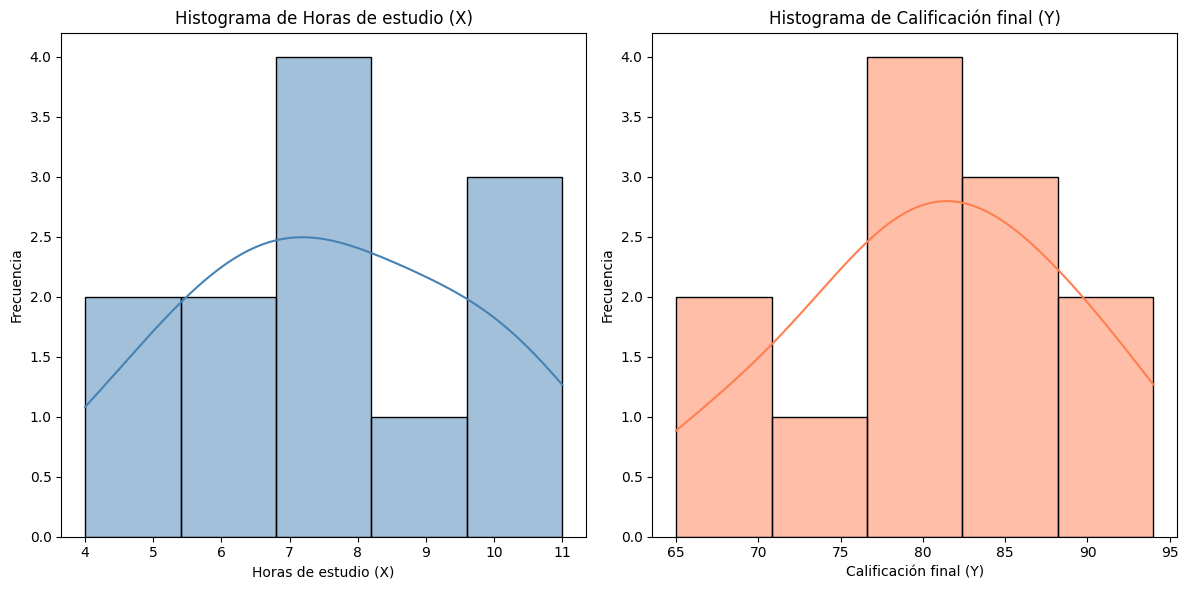

------------------------------
Generating Scatter Plot...


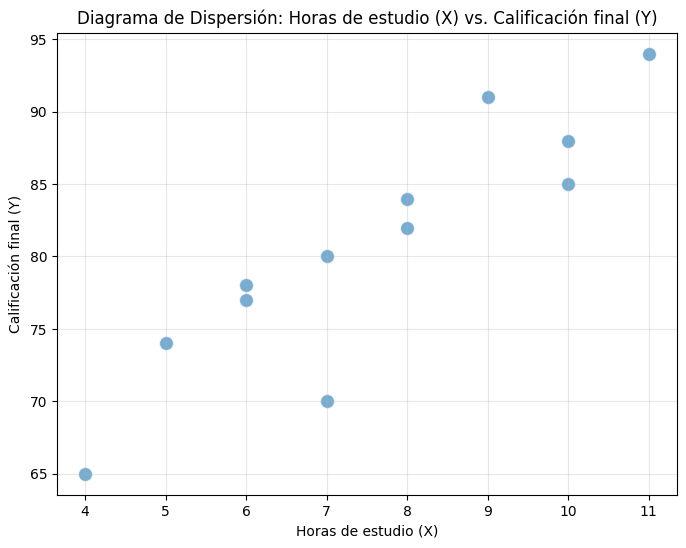

------------------------------
Performing Normality Tests...
Shapiro-Wilk test for 'Horas de estudio (X)': Statistics=0.971, p-value=0.924
Shapiro-Wilk test for 'Calificación final (Y)': Statistics=0.989, p-value=0.999

Interpretation of normality test results:
✓ The 'Horas de estudio (X)' variable appears to be normally distributed (p > 0.05).
✓ The 'Calificación final (Y)' variable appears to be normally distributed (p > 0.05).
------------------------------
Calculating Correlation Coefficients...
Pearson correlation coefficient: 0.8965
Kendall correlation coefficient: 0.8129
Spearman correlation coefficient: 0.9190
------------------------------
Determining the most appropriate correlation coefficient...
✓ Both variables appear normally distributed. The Pearson correlation coefficient (0.8965) is the most appropriate.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 (No existe

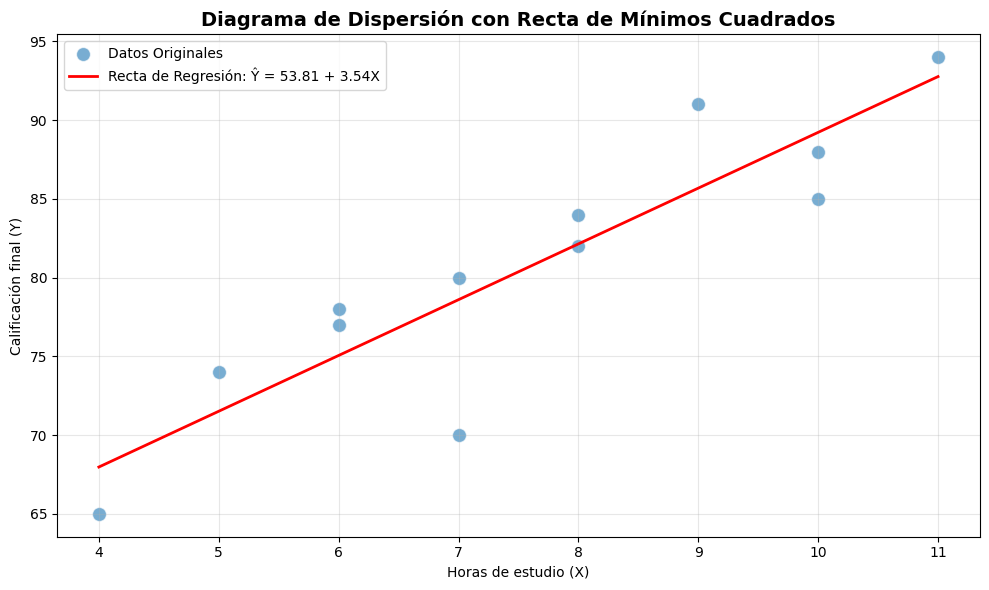


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β > 0 (Existe una relación lineal positiva significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 155.9738
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 3.9494

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 50.9167
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.5535

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (3.5417 - 0) / 0.5535
   t calculado = 6.3991

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 10
   Valor crítico (t_0.05,10) = 1.8125
   Valor p (una cola) = 0.0000

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
t calculado (6.3991) > t crítico (1.8125)
valor p (0.0000) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente diferente 

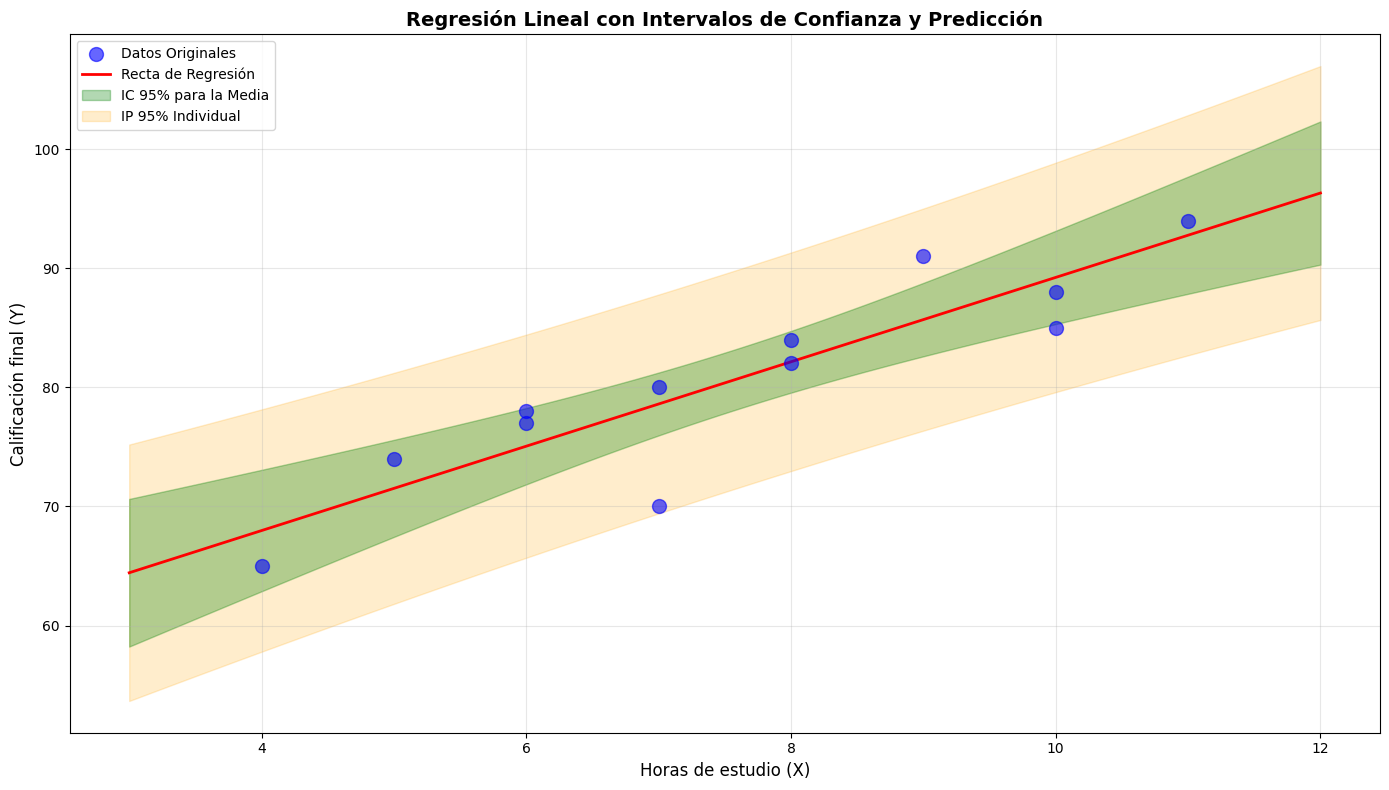

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Estudiante         X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
Estudiante 1       4        65       67.98    -2.98      -0.75     
Estudiante 2       7        70       78.60    -8.60      -2.18     
Estudiante 3       10       85       89.23    -4.23      -1.07     
Estudiante 4       6        78       75.06    2.94       0.74      
Estudiante 5       8        82       82.14    -0.14      -0.04     
Estudiante 6       9        91       85.68    5.32       1.35      
Estudiante 7       5        74       71.52    2.48       0.63      
Estudiante 8       11       94       92.77    1.23       0.31      
Estudiante 9       7        80       78.60    1.40       0.35      
Estudiante 10      6        77       75.06    1.94       0.49      
Estudiante 11      8        84       82.14    1.86       0.47      
Estudiante 12      10    

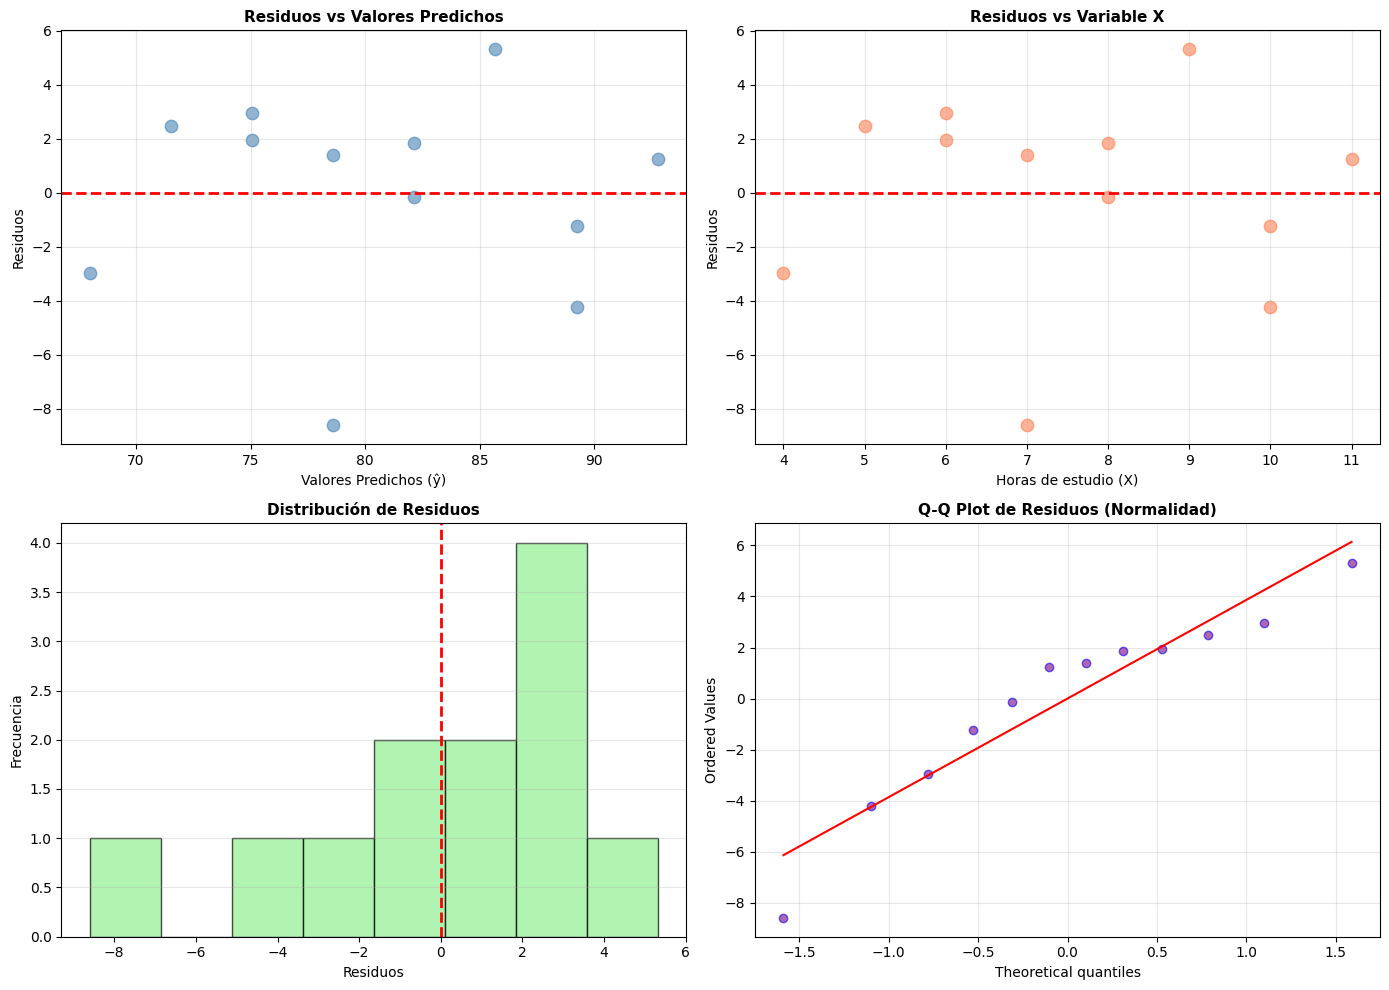


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9194
  Valor p = 0.2811
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Horas de estudio (X): p-value = 0.9239
     ✓ Distribución normal
   • Calificación final (Y): p-value = 0.9994
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.2811
     ✓ Distribución normal

3. HOMOCEDASTIC

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (HORAS DE ESTUDIO vs. CALIFICACIÓN) ---
data_estudio = {
    'Estudiante': [f'Estudiante {i+1}' for i in range(12)],
    'Horas de estudio (X)': [4, 7, 10, 6, 8, 9, 5, 11, 7, 6, 8, 10],
    'Calificación final (Y)': [65, 70, 85, 78, 82, 91, 74, 94, 80, 77, 84, 88]
}
df_estudio = pd.DataFrame(data_estudio)

variable_x_estudio = 'Horas de estudio (X)'
variable_y_estudio = 'Calificación final (Y)'
n_estudio = len(df_estudio)
alfa_estudio = 0.05 # Nivel de significancia

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Horas de Estudio vs. Calificación Final")
print("=" * 70)
print(f"\nDatos cargados: {n_estudio} estudiantes")
print(f"Variable independiente (X): {variable_x_estudio}")
print(f"Variable dependiente (Y): {variable_y_estudio}")
print(f"Nivel de significancia (α): {alfa_estudio}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerating Histograms...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_estudio[variable_x_estudio], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x_estudio}')
plt.xlabel(variable_x_estudio)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_estudio[variable_y_estudio], kde=True, color='coral')
plt.title(f'Histograma de {variable_y_estudio}')
plt.xlabel(variable_y_estudio)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_estudio, y=variable_y_estudio, data=df_estudio, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x_estudio} vs. {variable_y_estudio}')
plt.xlabel(variable_x_estudio)
plt.ylabel(variable_y_estudio)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Performing Normality Tests...")
shapiro_test_horas = shapiro(df_estudio[variable_x_estudio])
print(f"Shapiro-Wilk test for '{variable_x_estudio}': Statistics={shapiro_test_horas.statistic:.3f}, p-value={shapiro_test_horas.pvalue:.3f}")

shapiro_test_calif = shapiro(df_estudio[variable_y_estudio])
print(f"Shapiro-Wilk test for '{variable_y_estudio}': Statistics={shapiro_test_calif.statistic:.3f}, p-value={shapiro_test_calif.pvalue:.3f}")

print("\nInterpretation of normality test results:")
if shapiro_test_horas.pvalue > alfa_estudio:
    print(f"✓ The '{variable_x_estudio}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_x_estudio}' variable does not appear to be normally distributed (p <= 0.05).")

if shapiro_test_calif.pvalue > alfa_estudio:
    print(f"✓ The '{variable_y_estudio}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_y_estudio}' variable does not appear to be normally distributed (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculating Correlation Coefficients...")
pearson_corr_estudio = df_estudio[variable_x_estudio].corr(df_estudio[variable_y_estudio], method='pearson')
kendall_corr_estudio = df_estudio[variable_x_estudio].corr(df_estudio[variable_y_estudio], method='kendall')
spearman_corr_estudio = df_estudio[variable_x_estudio].corr(df_estudio[variable_y_estudio], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr_estudio:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr_estudio:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr_estudio:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determining the most appropriate correlation coefficient...")
if shapiro_test_horas.pvalue > alfa_estudio and shapiro_test_calif.pvalue > alfa_estudio:
    print(f"✓ Both variables appear normally distributed. The Pearson correlation coefficient ({pearson_corr_estudio:.4f}) is the most appropriate.")
else:
     print(f"⚠ At least one variable does not appear normally distributed. The Spearman correlation coefficient ({spearman_corr_estudio:.4f}) or Kendall correlation coefficient ({kendall_corr_estudio:.4f}) are more appropriate non-parametric measures.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r_estudio = pearson_corr_estudio
gl_estudio = n_estudio - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado_estudio = r_estudio * np.sqrt(n_estudio - 2) / np.sqrt(1 - r_estudio**2)
except ZeroDivisionError:
    t_calculado_estudio = float('nan')

# Valor p (two-sided)
valor_p_estudio = t.sf(abs(t_calculado_estudio), gl_estudio) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo_estudio = t.ppf(1 - alfa_estudio / 2, gl_estudio)
t_critico_negativo_estudio = -t_critico_positivo_estudio

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n_estudio}")
print(f"Grados de libertad (gl): {gl_estudio}")
print(f"Coeficiente de correlación de Pearson (r): {r_estudio:.4f}")
print(f"Estadístico t calculado: {t_calculado_estudio:.4f}")
print(f"Valor crítico (t, α={alfa_estudio}): ±{t_critico_positivo_estudio:.4f}")
print(f"Valor p: {valor_p_estudio:.4f}")

# Criterio de Decisión
if valor_p_estudio < alfa_estudio:
    decision_hipotesis_estudio = "RECHAZAR H0"
    conclusion_estudio = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis_estudio = "NO RECHAZAR H0"
    conclusion_estudio = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa_estudio}): {decision_hipotesis_estudio}")
print(f"CONCLUSIÓN: {conclusion_estudio}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X y Y
mean_x_estudio = df_estudio[variable_x_estudio].mean()
mean_y_estudio = df_estudio[variable_y_estudio].mean()

# 1. Cálculo de la PENDIENTE (b1)
std_x_estudio = df_estudio[variable_x_estudio].std(ddof=1)  # Desviación estándar muestral
std_y_estudio = df_estudio[variable_y_estudio].std(ddof=1)  # Desviación estándar muestral
b1_estudio = r_estudio * (std_y_estudio / std_x_estudio)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
b0_estudio = mean_y_estudio - b1_estudio * mean_x_estudio

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x_estudio}")
print(f"Variable dependiente (Y): {variable_y_estudio}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x_estudio:.2f}")
print(f"Media de Y (ȳ): {mean_y_estudio:.2f}")
print(f"Desviación estándar de X (Sx): {std_x_estudio:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y_estudio:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1_estudio:.4f}")
print(f"INTERSECCIÓN (b₀): {b0_estudio:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0_estudio:.4f} + {b1_estudio:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x_estudio, y=variable_y_estudio, data=df_estudio, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min_estudio = df_estudio[variable_x_estudio].min()
x_max_estudio = df_estudio[variable_x_estudio].max()
x_line_estudio = np.linspace(x_min_estudio, x_max_estudio, 100)
y_line_estudio = b0_estudio + b1_estudio * x_line_estudio

plt.plot(x_line_estudio, y_line_estudio, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0_estudio:.2f} + {b1_estudio:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x_estudio)
plt.ylabel(variable_y_estudio)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β > 0 (La pendiente es significativamente mayor que cero)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)")

# Calcular valores predichos (ŷ)
df_estudio['y_predicho'] = b0_estudio + b1_estudio * df_estudio[variable_x_estudio]

# Calcular el Error Estándar de Estimación (s_y,x)
diferencias_cuadradas_estudio = (df_estudio[variable_y_estudio] - df_estudio['y_predicho']) ** 2
suma_diferencias_cuadradas_estudio = diferencias_cuadradas_estudio.sum()
s_yx_estudio = np.sqrt(suma_diferencias_cuadradas_estudio / (n_estudio - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas_estudio:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx_estudio:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
desviaciones_x_estudio = (df_estudio[variable_x_estudio] - mean_x_estudio) ** 2
suma_desviaciones_x_estudio = desviaciones_x_estudio.sum()
s_b_estudio = s_yx_estudio / np.sqrt(suma_desviaciones_x_estudio)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x_estudio:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b_estudio:.4f}")

# Calcular el estadístico t
t_calculado_pendiente_estudio = (b1_estudio - 0) / s_b_estudio

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1_estudio:.4f} - 0) / {s_b_estudio:.4f}")
print(f"   t calculado = {t_calculado_pendiente_estudio:.4f}")

# Grados de libertad
gl_pendiente_estudio = n_estudio - 2

# Valor crítico (prueba de una cola, cola derecha)
t_critico_pendiente_estudio = t.ppf(1 - alfa_estudio, gl_pendiente_estudio)

# Valor p (prueba de una cola)
valor_p_pendiente_estudio = t.sf(t_calculado_pendiente_estudio, gl_pendiente_estudio)

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa_estudio}")
print(f"   Grados de libertad (gl) = {gl_pendiente_estudio}")
print(f"   Valor crítico (t_{alfa_estudio},{gl_pendiente_estudio}) = {t_critico_pendiente_estudio:.4f}")
print(f"   Valor p (una cola) = {valor_p_pendiente_estudio:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente_estudio < alfa_estudio:
    decision_pendiente_estudio = "RECHAZAR H0"
    interpretacion_estudio = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente_estudio = f"""
    Dado que el valor p ({valor_p_pendiente_estudio:.4f}) < α ({alfa_estudio}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de horas de estudio tiene un efecto significativo POSITIVO sobre
    la calificación final.

    En términos prácticos: Por cada hora de estudio adicional, se espera un
    incremento de {b1_estudio:.4f} puntos en la calificación final, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente_estudio = "NO RECHAZAR H0"
    interpretacion_estudio = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente_estudio = f"""
    Dado que el valor p ({valor_p_pendiente_estudio:.4f}) ≥ α ({alfa_estudio}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el número de horas
    de estudio tenga un efecto significativo sobre la calificación final.
    """

print(f"t calculado ({t_calculado_pendiente_estudio:.4f}) {'>' if t_calculado_pendiente_estudio > t_critico_pendiente_estudio else '<'} t crítico ({t_critico_pendiente_estudio:.4f})")
print(f"valor p ({valor_p_pendiente_estudio:.4f}) {'<' if valor_p_pendiente_estudio < alfa_estudio else '≥'} α ({alfa_estudio})")
print(f"\nDECISIÓN: {decision_pendiente_estudio}")
print(f"INTERPRETACIÓN: {interpretacion_estudio}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL:")
print("=" * 70)
print(conclusion_pendiente_estudio)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
SSE_estudio = suma_diferencias_cuadradas_estudio  # Ya calculado anteriormente
SS_Total_estudio = ((df_estudio[variable_y_estudio] - mean_y_estudio) ** 2).sum()
SSR_estudio = SS_Total_estudio - SSE_estudio

r_cuadrado_estudio = 1 - (SSE_estudio / SS_Total_estudio)

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total_estudio:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR_estudio:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE_estudio:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE_estudio:.4f} / {SS_Total_estudio:.4f})")
print(f"  R² = {r_cuadrado_estudio:.4f}")

print(f"\nVerificación: R² = r² = ({r_estudio:.4f})² = {r_estudio**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado_estudio*100:.2f}% de la variabilidad en la calificación │")
print(f"│  final puede ser explicada por el número de horas de estudio. │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR_estudio = SSR_estudio / 1  # 1 grado de libertad para regresión
MSE_estudio = SSE_estudio / (n_estudio - 2)  # n-2 grados de libertad para error

# Estadístico F
F_calculado_estudio = MSR_estudio / MSE_estudio

# Valor p del estadístico F
valor_p_f_estudio = f_dist.sf(F_calculado_estudio, 1, n_estudio - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR_estudio:<15.4f} {1:<10} {MSR_estudio:<15.4f} {F_calculado_estudio:<15.4f} {valor_p_f_estudio:<15.6f}")
print(f"{'Error':<20} {SSE_estudio:<15.4f} {n_estudio-2:<10} {MSE_estudio:<15.4f}")
print(f"{'Total':<20} {SS_Total_estudio:<15.4f} {n_estudio-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f_estudio < alfa_estudio:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f_estudio:.6f} < {alfa_estudio})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f_estudio:.6f} ≥ {alfa_estudio})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo_estudio = t.ppf(1 - alfa_estudio/2, gl_pendiente_estudio)
print(f"\nValor crítico t para intervalos (α={alfa_estudio}, gl={gl_pendiente_estudio}): ±{t_critico_intervalo_estudio:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Ejemplo: Calcular intervalo para algunos valores de X
valores_x_ejemplo_estudio = [5, 8, 10]  # Ejemplos de horas de estudio

print(f"\nNivel de confianza: {(1-alfa_estudio)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de calificación final:\n")
print(f"{'X (Horas Estudio)':<18} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 70)

intervalos_confianza_estudio = []
for x_val in valores_x_ejemplo_estudio:
    # Predicción
    y_pred = b0_estudio + b1_estudio * x_val

    # Término del error
    termino_error = np.sqrt((1/n_estudio) + ((x_val - mean_x_estudio)**2 / suma_desviaciones_x_estudio))

    # Margen de error
    margen_conf = t_critico_intervalo_estudio * s_yx_estudio * termino_error

    # Límites del intervalo
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza_estudio.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<18} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa_estudio)*100:.0f}% de confianza, cuando se estudian X horas a la semana,")
print("la MEDIA de la calificación final estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa_estudio)*100:.0f}%")
print(f"\nIntervalos de predicción para calificaciones finales INDIVIDUALES:\n")
print(f"{'X (Horas Estudio)':<18} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 70)

intervalos_prediccion_estudio = []
for x_val in valores_x_ejemplo_estudio:
    # Predicción
    y_pred = b0_estudio + b1_estudio * x_val

    # Término del error (NOTA: incluye el 1 + ...)
    termino_error_pred = np.sqrt(1 + (1/n_estudio) + ((x_val - mean_x_estudio)**2 / suma_desviaciones_x_estudio))

    # Margen de error
    margen_pred = t_critico_intervalo_estudio * s_yx_estudio * termino_error_pred

    # Límites del intervalo
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion_estudio.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<18} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa_estudio)*100:.0f}% de confianza, cuando se estudian X horas a la semana,")
print("una observación INDIVIDUAL de calificación final estará dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df_estudio[variable_x_estudio], df_estudio[variable_y_estudio],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range_estudio = np.linspace(df_estudio[variable_x_estudio].min() - 1, df_estudio[variable_x_estudio].max() + 1, 100)
y_range_estudio = b0_estudio + b1_estudio * x_range_estudio
plt.plot(x_range_estudio, y_range_estudio, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower_estudio = []
ic_upper_estudio = []
ip_lower_estudio = []
ip_upper_estudio = []

for x_val in x_range_estudio:
    y_pred = b0_estudio + b1_estudio * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n_estudio) + ((x_val - mean_x_estudio)**2 / suma_desviaciones_x_estudio))
    margen_conf = t_critico_intervalo_estudio * s_yx_estudio * termino_error_conf
    ic_lower_estudio.append(y_pred - margen_conf)
    ic_upper_estudio.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n_estudio) + ((x_val - mean_x_estudio)**2 / suma_desviaciones_x_estudio))
    margen_pred = t_critico_intervalo_estudio * s_yx_estudio * termino_error_pred
    ip_lower_estudio.append(y_pred - margen_pred)
    ip_upper_estudio.append(y_pred + margen_pred)

# Graficar intervalos de confianza
plt.fill_between(x_range_estudio, ic_lower_estudio, ic_upper_estudio,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa_estudio)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range_estudio, ip_lower_estudio, ip_upper_estudio,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa_estudio)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x_estudio, fontsize=12)
plt.ylabel(variable_y_estudio, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df_estudio['residuos'] = df_estudio[variable_y_estudio] - df_estudio['y_predicho']
df_estudio['residuos_estandarizados'] = df_estudio['residuos'] / s_yx_estudio

print("\nTabla de Residuos:")
print(f"\n{'Estudiante':<18} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df_estudio.iterrows():
    print(f"{row['Estudiante']:<18} {row[variable_x_estudio]:<8} {row[variable_y_estudio]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df_estudio['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df_estudio['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df_estudio['residuos'].min():.4f}")
print(f"  Residuo máximo: {df_estudio['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df_estudio['y_predicho'], df_estudio['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df_estudio[variable_x_estudio], df_estudio['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x_estudio, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df_estudio['residuos'], bins=8, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df_estudio['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)


plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos_estudio = shapiro(df_estudio['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos_estudio.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos_estudio.pvalue:.4f}")

if shapiro_residuos_estudio.pvalue > alfa_estudio:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa_estudio})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa_estudio})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x_estudio}: p-value = {shapiro_test_horas.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_horas.pvalue > alfa_estudio else '✗ No normal'}")
print(f"   • {variable_y_estudio}: p-value = {shapiro_test_calif.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_calif.pvalue > alfa_estudio else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos_estudio.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos_estudio.pvalue > alfa_estudio else '✗ No normal'}")

# 3. Homocedasticidad (inspección visual)
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r_estudio:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r_estudio) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados_estudio = np.abs(df_estudio['residuos_estandarizados'])
outliers_estudio = df_estudio[residuos_estandarizados_estudio > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers_estudio)}")
if len(outliers_estudio) > 0:
    print(f"   • Estudiantes con residuos atípicos:")
    for idx, row in outliers_estudio.iterrows():
        print(f"     - {row['Estudiante']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion_estudio = False
razones_transformacion_estudio = []

if shapiro_test_horas.pvalue <= alfa_estudio or shapiro_test_calif.pvalue <= alfa_estudio:
    razones_transformacion_estudio.append("- Variables originales no son normales")
    necesita_transformacion_estudio = True

if shapiro_residuos_estudio.pvalue <= alfa_estudio:
    razones_transformacion_estudio.append("- Residuos no siguen distribución normal")
    necesita_transformacion_estudio = True

if abs(r_estudio) < 0.5:
    razones_transformacion_estudio.append("- Correlación lineal débil (r < 0.5)")
    necesita_transformacion_estudio = True

if len(outliers_estudio) > n_estudio * 0.15:  # Más del 15% son outliers
    razones_transformacion_estudio.append(f"- Exceso de valores atípicos ({len(outliers_estudio)} casos)")
    necesita_transformacion_estudio = True

if necesita_transformacion_estudio:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion_estudio:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_horas.pvalue > alfa_estudio and shapiro_test_calif.pvalue > alfa_estudio:
        print("  ✓ Las variables originales son aproximadamente normales")

    if shapiro_residuos_estudio.pvalue > alfa_estudio:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r_estudio) >= 0.6:
        print(f"  ✓ La correlación lineal es adecuada (r = {r_estudio:.4f})")

    if len(outliers_estudio) <= n_estudio * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers_estudio)} casos)")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0_estudio:.4f} + {b1_estudio:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0_estudio:.2f} puntos
   • Por cada hora de estudio adicional, aumentan {b1_estudio:.4f} puntos en la calificación final

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r_estudio:.4f}
     └─ Correlación {'fuerte' if abs(r_estudio) > 0.7 else 'moderada' if abs(r_estudio) > 0.4 else 'débil'} {'positiva' if r_estudio > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado_estudio:.4f}
     └─ {r_cuadrado_estudio*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx_estudio:.4f}
     └─ Error típico de predicción: ±{s_yx_estudio:.2f} puntos

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa_estudio}):

   1. Correlación:
      • Estadístico t: {t_calculado_estudio:.4f}
      • Valor p: {valor_p_estudio:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_estudio < alfa_estudio else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente_estudio:.4f}
      • Valor p: {valor_p_pendiente_estudio:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente_estudio < alfa_estudio else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado_estudio:.4f}
      • Valor p: {valor_p_f_estudio:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f_estudio < alfa_estudio else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos_estudio.pvalue > alfa_estudio else '⚠ NO CUMPLE'} (p = {shapiro_residuos_estudio.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente_estudio < alfa_estudio and valor_p_f_estudio < alfa_estudio:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   El número de horas de estudio es un predictor SIGNIFICATIVO de
   la calificación final. El modelo explica {r_cuadrado_estudio*100:.2f}% de la
   variabilidad y puede utilizarse con confianza para:

   • Predecir calificaciones futuras basadas en horas de estudio
   • Establecer objetivos de estudio para alcanzar metas de calificación
   • Evaluar la relación entre esfuerzo de estudio y rendimiento académico

   Recomendación: UTILIZAR este modelo para comprender y potencialmente
   mejorar el rendimiento académico.
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque existe una relación entre horas de estudio y calificación final,
   el modelo presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos para mejorar el modelo
   • Considerar otras variables explicativas (ej: asistencia, participación)
   • Realizar análisis adicionales antes de sacar conclusiones definitivas
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Llamadas Diarias vs. Ventas Semanales

Datos cargados: 10 empleados
Variable independiente (X): Llamadas diarias (X)
Variable dependiente (Y): Ventas semanales (Y)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generating Histograms...


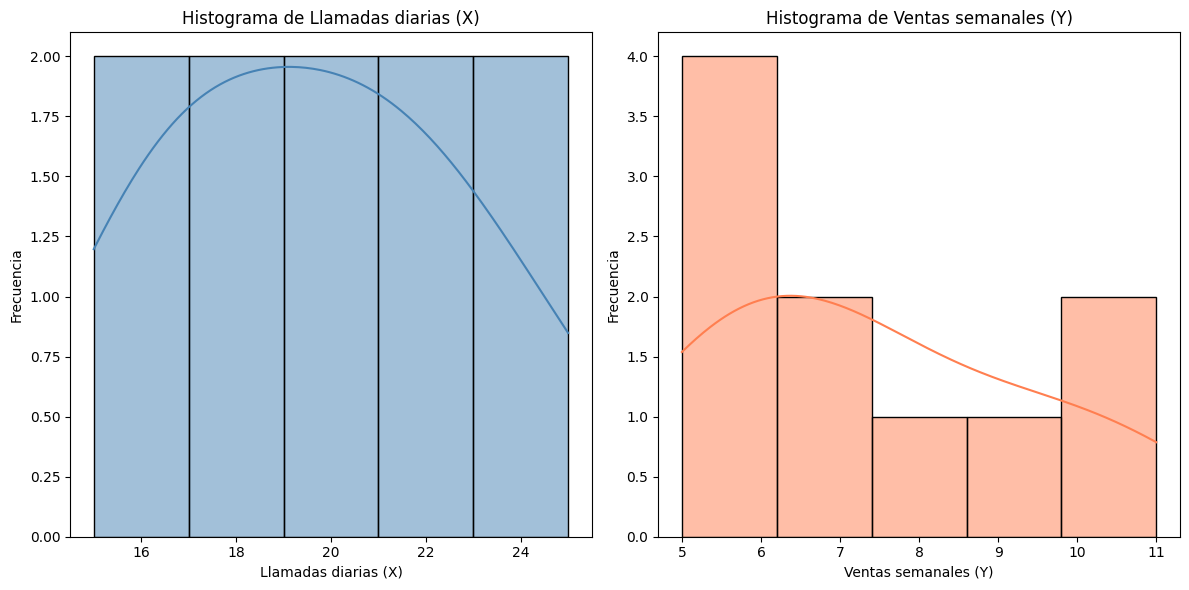

------------------------------
Generating Scatter Plot...


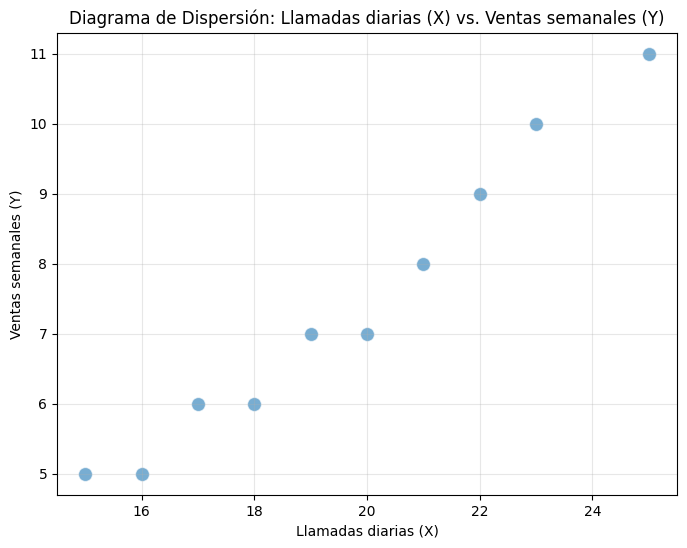

------------------------------
Performing Normality Tests...
Shapiro-Wilk test for 'Llamadas diarias (X)': Statistics=0.981, p-value=0.970
Shapiro-Wilk test for 'Ventas semanales (Y)': Statistics=0.930, p-value=0.447

Interpretation of normality test results:
✓ The 'Llamadas diarias (X)' variable appears to be normally distributed (p > 0.05).
✓ The 'Ventas semanales (Y)' variable appears to be normally distributed (p > 0.05).
------------------------------
Calculating Correlation Coefficients...
Pearson correlation coefficient: 0.9838
Kendall correlation coefficient: 0.9661
Spearman correlation coefficient: 0.9909
------------------------------
Determining the most appropriate correlation coefficient...
✓ Both variables appear normally distributed. The Pearson correlation coefficient (0.9838) is the most appropriate.
----------------------------------------------------------------------

--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---

Hipótesis:
H0: ρ = 0 (No existe cor

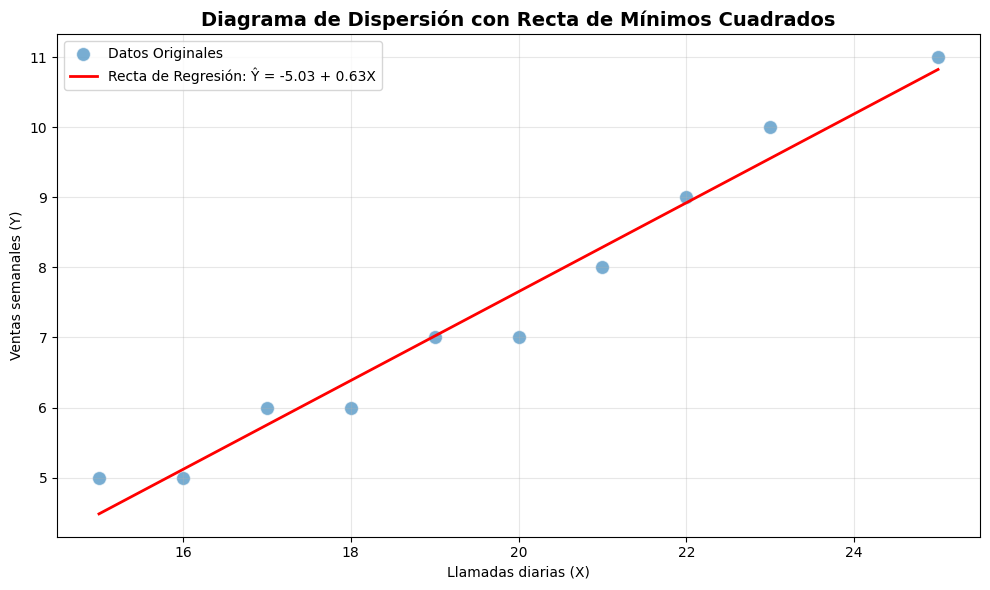


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---

Hipótesis:
H0: β = 0 (No hay relación lineal significativa)
H1: β > 0 (Existe una relación lineal positiva significativa)

1. Cálculo del Error Estándar de Estimación (s_y,x):
   Σ(y - ŷ)² = 1.2359
   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = 0.3931

2. Cálculo del Error Estándar de la Pendiente (s_b):
   Σ(x - x̄)² = 92.4000
   s_b = s_y,x / √[Σ(x - x̄)²] = 0.0409

3. Cálculo del Estadístico t:
   t = (b₁ - 0) / s_b = (0.6342 - 0) / 0.0409
   t calculado = 15.5099

4. Parámetros de la Prueba:
   Nivel de significancia (α) = 0.05
   Grados de libertad (gl) = 8
   Valor crítico (t_0.05,8) = 1.8595
   Valor p (una cola) = 0.0000

----------------------------------------------------------------------
CRITERIO DE DECISIÓN:
----------------------------------------------------------------------
t calculado (15.5099) > t crítico (1.8595)
valor p (0.0000) < α (0.05)

DECISIÓN: RECHAZAR H0
INTERPRETACIÓN: ✓ La pendiente ES significativamente diferente de

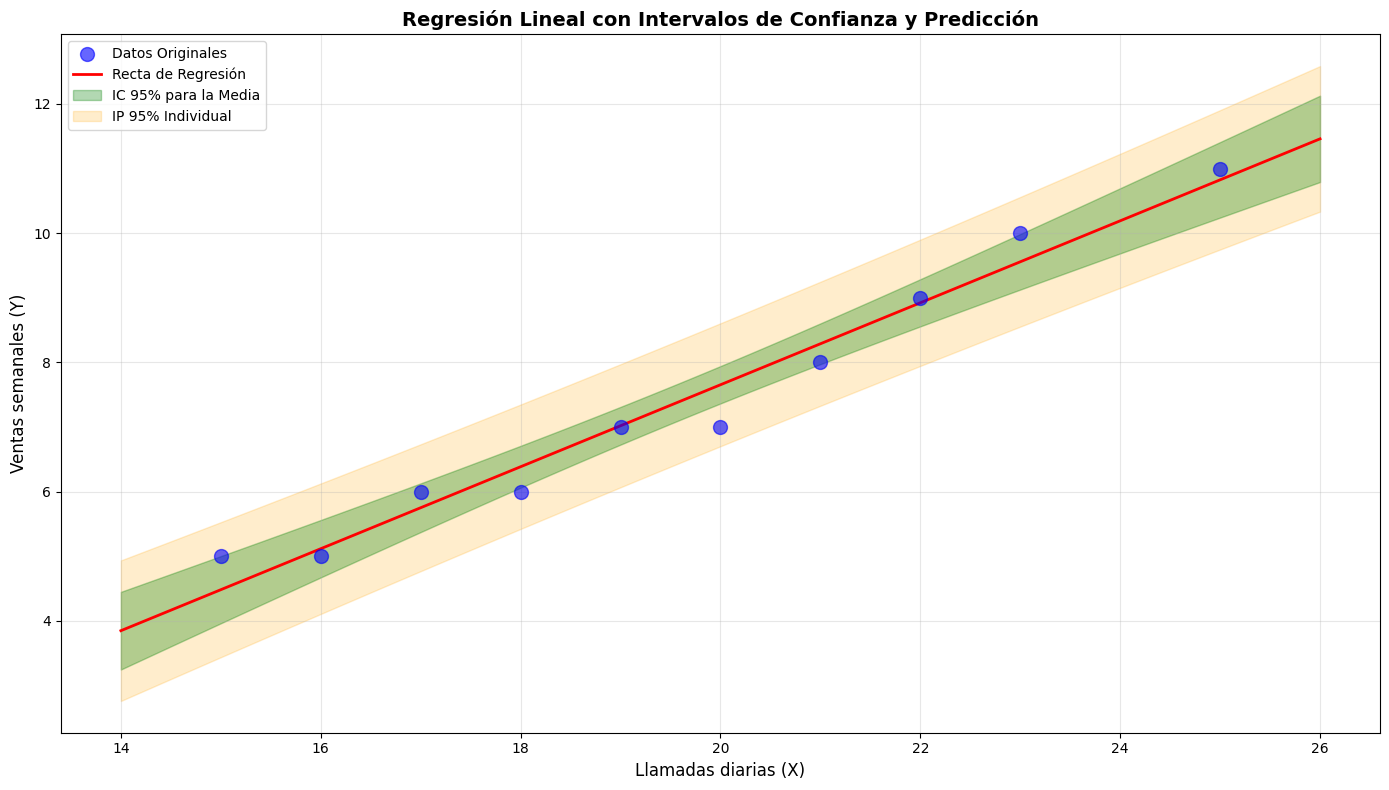

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Empleado           X        Y        ŷ        Residuo    Res. Std. 
----------------------------------------------------------------------
Empleado 1         15       5        4.48     0.52       1.32      
Empleado 2         20       7        7.65     -0.65      -1.66     
Empleado 3         18       6        6.39     -0.39      -0.98     
Empleado 4         25       11       10.82    0.18       0.45      
Empleado 5         22       9        8.92     0.08       0.20      
Empleado 6         17       6        5.75     0.25       0.63      
Empleado 7         19       7        7.02     -0.02      -0.05     
Empleado 8         23       10       9.56     0.44       1.13      
Empleado 9         21       8        8.29     -0.29      -0.73     
Empleado 10        16       5        5.12     -0.12      -0.30     

Estadísticas de los Residuos:
  Media de residuos: 0.0000 (debe ser ≈ 0)
  Desviación estánd

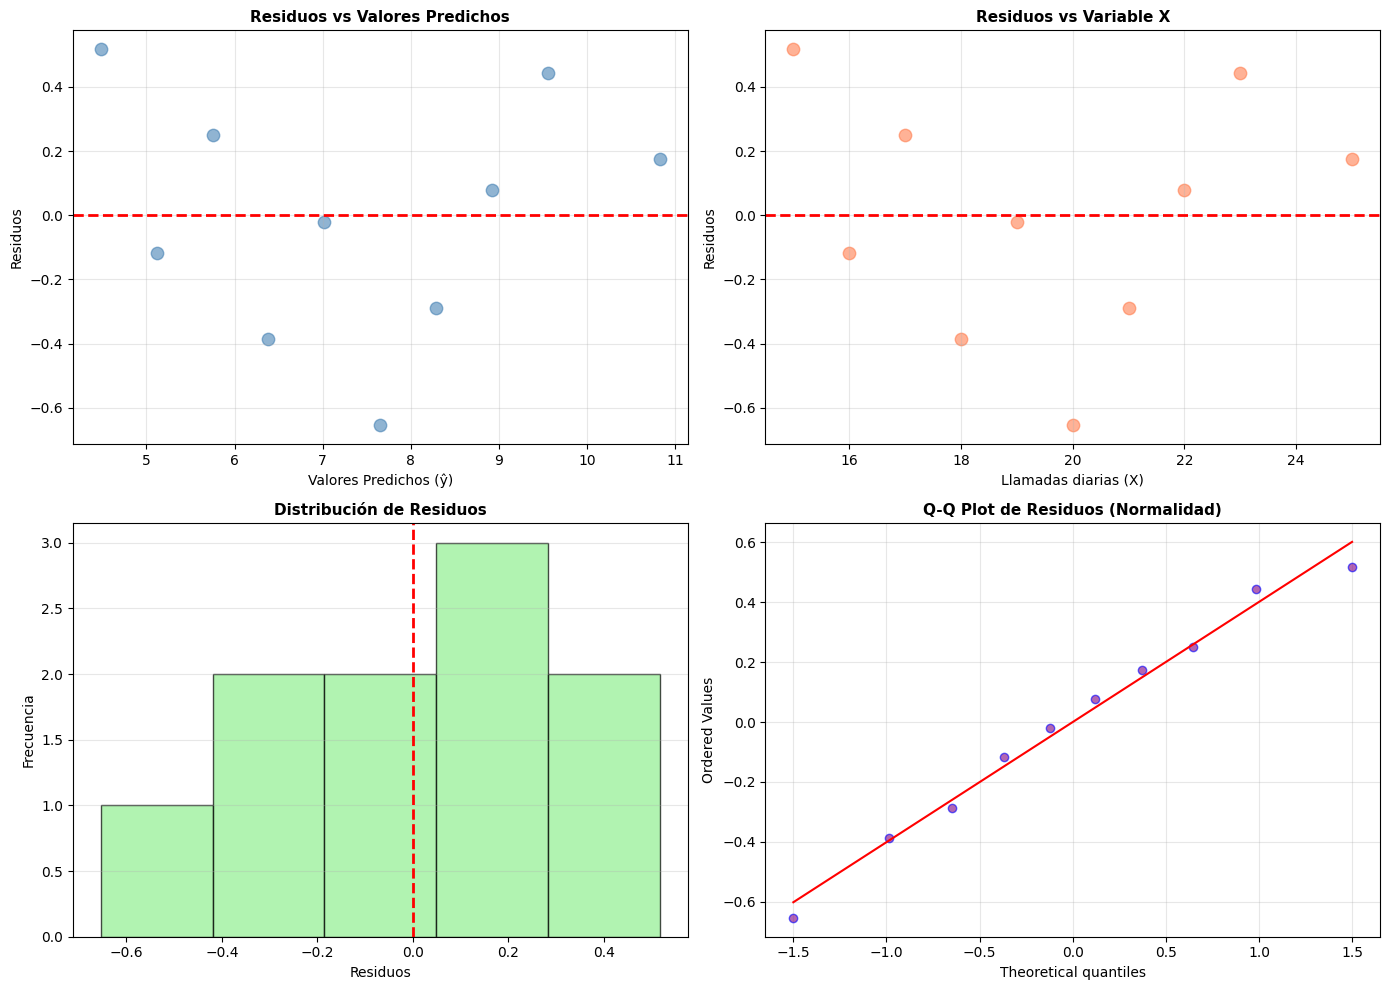


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.9779
  Valor p = 0.9531
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Llamadas diarias (X): p-value = 0.9697
     ✓ Distribución normal
   • Ventas semanales (Y): p-value = 0.4473
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.9531
     ✓ Distribución normal

3. HOMOCEDASTICID

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (LLAMADAS DIARIAS vs. VENTAS SEMANALES) ---
data_ventas = {
    'Empleado': [f'Empleado {i+1}' for i in range(10)],
    'Llamadas diarias (X)': [15, 20, 18, 25, 22, 17, 19, 23, 21, 16],
    'Ventas semanales (Y)': [5, 7, 6, 11, 9, 6, 7, 10, 8, 5]
}
df_ventas = pd.DataFrame(data_ventas)

variable_x_ventas = 'Llamadas diarias (X)'
variable_y_ventas = 'Ventas semanales (Y)'
n_ventas = len(df_ventas)
alfa_ventas = 0.05 # Nivel de significancia

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Llamadas Diarias vs. Ventas Semanales")
print("=" * 70)
print(f"\nDatos cargados: {n_ventas} empleados")
print(f"Variable independiente (X): {variable_x_ventas}")
print(f"Variable dependiente (Y): {variable_y_ventas}")
print(f"Nivel de significancia (α): {alfa_ventas}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerating Histograms...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_ventas[variable_x_ventas], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x_ventas}')
plt.xlabel(variable_x_ventas)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_ventas[variable_y_ventas], kde=True, color='coral')
plt.title(f'Histograma de {variable_y_ventas}')
plt.xlabel(variable_y_ventas)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_ventas, y=variable_y_ventas, data=df_ventas, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x_ventas} vs. {variable_y_ventas}')
plt.xlabel(variable_x_ventas)
plt.ylabel(variable_y_ventas)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)

# 3. Normality Tests (Shapiro-Wilk)
print("Performing Normality Tests...")
shapiro_test_llamadas = shapiro(df_ventas[variable_x_ventas])
print(f"Shapiro-Wilk test for '{variable_x_ventas}': Statistics={shapiro_test_llamadas.statistic:.3f}, p-value={shapiro_test_llamadas.pvalue:.3f}")

shapiro_test_ventas = shapiro(df_ventas[variable_y_ventas])
print(f"Shapiro-Wilk test for '{variable_y_ventas}': Statistics={shapiro_test_ventas.statistic:.3f}, p-value={shapiro_test_ventas.pvalue:.3f}")

print("\nInterpretation of normality test results:")
if shapiro_test_llamadas.pvalue > alfa_ventas:
    print(f"✓ The '{variable_x_ventas}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_x_ventas}' variable does not appear to be normally distributed (p <= 0.05).")

if shapiro_test_ventas.pvalue > alfa_ventas:
    print(f"✓ The '{variable_y_ventas}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_y_ventas}' variable does not appear to be normally distributed (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients
print("Calculating Correlation Coefficients...")
pearson_corr_ventas = df_ventas[variable_x_ventas].corr(df_ventas[variable_y_ventas], method='pearson')
kendall_corr_ventas = df_ventas[variable_x_ventas].corr(df_ventas[variable_y_ventas], method='kendall')
spearman_corr_ventas = df_ventas[variable_x_ventas].corr(df_ventas[variable_y_ventas], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr_ventas:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr_ventas:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr_ventas:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determining the most appropriate correlation coefficient...")
if shapiro_test_llamadas.pvalue > alfa_ventas and shapiro_test_ventas.pvalue > alfa_ventas:
    print(f"✓ Both variables appear normally distributed. The Pearson correlation coefficient ({pearson_corr_ventas:.4f}) is the most appropriate.")
else:
     print(f"⚠ At least one variable does not appear normally distributed. The Spearman correlation coefficient ({spearman_corr_ventas:.4f}) or Kendall correlation coefficient ({kendall_corr_ventas:.4f}) are more appropriate non-parametric measures.")
print("-" * 70)

# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r_ventas = pearson_corr_ventas
gl_ventas = n_ventas - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado_ventas = r_ventas * np.sqrt(n_ventas - 2) / np.sqrt(1 - r_ventas**2)
except ZeroDivisionError:
    t_calculado_ventas = float('nan')

# Valor p (two-sided)
valor_p_ventas = t.sf(abs(t_calculado_ventas), gl_ventas) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo_ventas = t.ppf(1 - alfa_ventas / 2, gl_ventas)
t_critico_negativo_ventas = -t_critico_positivo_ventas

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n_ventas}")
print(f"Grados de libertad (gl): {gl_ventas}")
print(f"Coeficiente de correlación de Pearson (r): {r_ventas:.4f}")
print(f"Estadístico t calculado: {t_calculado_ventas:.4f}")
print(f"Valor crítico (t, α={alfa_ventas}): ±{t_critico_positivo_ventas:.4f}")
print(f"Valor p: {valor_p_ventas:.4f}")

# Criterio de Decisión
if valor_p_ventas < alfa_ventas:
    decision_hipotesis_ventas = "RECHAZAR H0"
    conclusion_ventas = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis_ventas = "NO RECHAZAR H0"
    conclusion_ventas = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa_ventas}): {decision_hipotesis_ventas}")
print(f"CONCLUSIÓN: {conclusion_ventas}")
print("=" * 70)

# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X y Y
mean_x_ventas = df_ventas[variable_x_ventas].mean()
mean_y_ventas = df_ventas[variable_y_ventas].mean()

# 1. Cálculo de la PENDIENTE (b1)
std_x_ventas = df_ventas[variable_x_ventas].std(ddof=1)  # Desviación estándar muestral
std_y_ventas = df_ventas[variable_y_ventas].std(ddof=1)  # Desviación estándar muestral
b1_ventas = r_ventas * (std_y_ventas / std_x_ventas)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
b0_ventas = mean_y_ventas - b1_ventas * mean_x_ventas

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x_ventas}")
print(f"Variable dependiente (Y): {variable_y_ventas}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x_ventas:.2f}")
print(f"Media de Y (ȳ): {mean_y_ventas:.2f}")
print(f"Desviación estándar de X (Sx): {std_x_ventas:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y_ventas:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1_ventas:.4f}")
print(f"INTERSECCIÓN (b₀): {b0_ventas:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0_ventas:.4f} + {b1_ventas:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)

# --- Visualización de la Recta de Regresión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=variable_x_ventas, y=variable_y_ventas, data=df_ventas, label='Datos Originales', s=100, alpha=0.6)

# Crear la línea de regresión
x_min_ventas = df_ventas[variable_x_ventas].min()
x_max_ventas = df_ventas[variable_x_ventas].max()
x_line_ventas = np.linspace(x_min_ventas, x_max_ventas, 100)
y_line_ventas = b0_ventas + b1_ventas * x_line_ventas

plt.plot(x_line_ventas, y_line_ventas, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0_ventas:.2f} + {b1_ventas:.2f}X')
plt.title('Diagrama de Dispersión con Recta de Mínimos Cuadrados', fontsize=14, fontweight='bold')
plt.xlabel(variable_x_ventas)
plt.ylabel(variable_y_ventas)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β > 0 (La pendiente es significativamente mayor que cero)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)")

# Calcular valores predichos (ŷ)
df_ventas['y_predicho'] = b0_ventas + b1_ventas * df_ventas[variable_x_ventas]

# Calcular el Error Estándar de Estimación (s_y,x)
diferencias_cuadradas_ventas = (df_ventas[variable_y_ventas] - df_ventas['y_predicho']) ** 2
suma_diferencias_cuadradas_ventas = diferencias_cuadradas_ventas.sum()
s_yx_ventas = np.sqrt(suma_diferencias_cuadradas_ventas / (n_ventas - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas_ventas:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx_ventas:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
desviaciones_x_ventas = (df_ventas[variable_x_ventas] - mean_x_ventas) ** 2
suma_desviaciones_x_ventas = desviaciones_x_ventas.sum()
s_b_ventas = s_yx_ventas / np.sqrt(suma_desviaciones_x_ventas)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x_ventas:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b_ventas:.4f}")

# Calcular el estadístico t
t_calculado_pendiente_ventas = (b1_ventas - 0) / s_b_ventas

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1_ventas:.4f} - 0) / {s_b_ventas:.4f}")
print(f"   t calculado = {t_calculado_pendiente_ventas:.4f}")

# Grados de libertad
gl_pendiente_ventas = n_ventas - 2

# Valor crítico (prueba de una cola, cola derecha)
t_critico_pendiente_ventas = t.ppf(1 - alfa_ventas, gl_pendiente_ventas)

# Valor p (prueba de una cola)
valor_p_pendiente_ventas = t.sf(t_calculado_pendiente_ventas, gl_pendiente_ventas)

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa_ventas}")
print(f"   Grados de libertad (gl) = {gl_pendiente_ventas}")
print(f"   Valor crítico (t_{alfa_ventas},{gl_pendiente_ventas}) = {t_critico_pendiente_ventas:.4f}")
print(f"   Valor p (una cola) = {valor_p_pendiente_ventas:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

if valor_p_pendiente_ventas < alfa_ventas:
    decision_pendiente_ventas = "RECHAZAR H0"
    interpretacion_ventas = "✓ La pendiente ES significativamente diferente de cero."
    conclusion_pendiente_ventas = f"""
    Dado que el valor p ({valor_p_pendiente_ventas:.4f}) < α ({alfa_ventas}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el número de llamadas diarias tiene un efecto significativo POSITIVO sobre
    el número de ventas semanales.

    En términos prácticos: Por cada llamada diaria adicional, se espera un
    incremento de {b1_ventas:.4f} ventas semanales, y este efecto es estadísticamente
    significativo.
    """
else:
    decision_pendiente_ventas = "NO RECHAZAR H0"
    interpretacion_ventas = "✗ La pendiente NO es significativamente diferente de cero."
    conclusion_pendiente_ventas = f"""
    Dado que el valor p ({valor_p_pendiente_ventas:.4f}) ≥ α ({alfa_ventas}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el número de llamadas
    diarias tenga un efecto significativo sobre el número de ventas semanales.
    """

print(f"t calculado ({t_calculado_pendiente_ventas:.4f}) {'>' if t_calculado_pendiente_ventas > t_critico_pendiente_ventas else '<'} t crítico ({t_critico_pendiente_ventas:.4f})")
print(f"valor p ({valor_p_pendiente_ventas:.4f}) {'<' if valor_p_pendiente_ventas < alfa_ventas else '≥'} α ({alfa_ventas})")
print(f"\nDECISIÓN: {decision_pendiente_ventas}")
print(f"INTERPRETACIÓN: {interpretacion_ventas}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL:")
print("=" * 70)
print(conclusion_pendiente_ventas)

# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
SSE_ventas = suma_diferencias_cuadradas_ventas  # Ya calculado anteriormente
SS_Total_ventas = ((df_ventas[variable_y_ventas] - mean_y_ventas) ** 2).sum()
SSR_ventas = SS_Total_ventas - SSE_ventas

r_cuadrado_ventas = 1 - (SSE_ventas / SS_Total_ventas)

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total_ventas:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR_ventas:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE_ventas:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE_ventas:.4f} / {SS_Total_ventas:.4f})")
print(f"  R² = {r_cuadrado_ventas:.4f}")

print(f"\nVerificación: R² = r² = ({r_ventas:.4f})² = {r_ventas**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado_ventas*100:.2f}% de la variabilidad en el número de     │")
print(f"│  ventas semanales puede ser explicada por el número de llamadas │")
print(f"│  diarias.                                                       │")
print("└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR_ventas = SSR_ventas / 1  # 1 grado de libertad para regresión
MSE_ventas = SSE_ventas / (n_ventas - 2)  # n-2 grados de libertad para error

# Estadístico F
F_calculado_ventas = MSR_ventas / MSE_ventas

# Valor p del estadístico F
valor_p_f_ventas = f_dist.sf(F_calculado_ventas, 1, n_ventas - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR_ventas:<15.4f} {1:<10} {MSR_ventas:<15.4f} {F_calculado_ventas:<15.4f} {valor_p_f_ventas:<15.6f}")
print(f"{'Error':<20} {SSE_ventas:<15.4f} {n_ventas-2:<10} {MSE_ventas:<15.4f}")
print(f"{'Total':<20} {SS_Total_ventas:<15.4f} {n_ventas-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f_ventas < alfa_ventas:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f_ventas:.6f} < {alfa_ventas})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f_ventas:.6f} ≥ {alfa_ventas})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)

# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo_ventas = t.ppf(1 - alfa_ventas/2, gl_pendiente_ventas)
print(f"\nValor crítico t para intervalos (α={alfa_ventas}, gl={gl_pendiente_ventas}): ±{t_critico_intervalo_ventas:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Ejemplo: Calcular intervalo para algunos valores de X
valores_x_ejemplo_ventas = [18, 22, 25]  # Ejemplos de llamadas diarias

print(f"\nNivel de confianza: {(1-alfa_ventas)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de ventas semanales:\n")
print(f"{'X (Llamadas Diarias)':<20} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 75)

intervalos_confianza_ventas = []
for x_val in valores_x_ejemplo_ventas:
    # Predicción
    y_pred = b0_ventas + b1_ventas * x_val

    # Término del error
    termino_error = np.sqrt((1/n_ventas) + ((x_val - mean_x_ventas)**2 / suma_desviaciones_x_ventas))

    # Margen de error
    margen_conf = t_critico_intervalo_ventas * s_yx_ventas * termino_error

    # Límites del intervalo
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza_ventas.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<20} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa_ventas)*100:.0f}% de confianza, cuando se realizan X llamadas diarias,")
print("la MEDIA de ventas semanales estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa_ventas)*100:.0f}%")
print(f"\nIntervalos de predicción para ventas semanales INDIVIDUALES:\n")
print(f"{'X (Llamadas Diarias)':<20} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 75)

intervalos_prediccion_ventas = []
for x_val in valores_x_ejemplo_ventas:
    # Predicción
    y_pred = b0_ventas + b1_ventas * x_val

    # Término del error (NOTA: incluye el 1 + ...)
    termino_error_pred = np.sqrt(1 + (1/n_ventas) + ((x_val - mean_x_ventas)**2 / suma_desviaciones_x_ventas))

    # Margen de error
    margen_pred = t_critico_intervalo_ventas * s_yx_ventas * termino_error_pred

    # Límites del intervalo
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion_ventas.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<20} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa_ventas)*100:.0f}% de confianza, cuando se realizan X llamadas diarias,")
print("una observación INDIVIDUAL de ventas semanales estará dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df_ventas[variable_x_ventas], df_ventas[variable_y_ventas],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range_ventas = np.linspace(df_ventas[variable_x_ventas].min() - 1, df_ventas[variable_x_ventas].max() + 1, 100)
y_range_ventas = b0_ventas + b1_ventas * x_range_ventas
plt.plot(x_range_ventas, y_range_ventas, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower_ventas = []
ic_upper_ventas = []
ip_lower_ventas = []
ip_upper_ventas = []

for x_val in x_range_ventas:
    y_pred = b0_ventas + b1_ventas * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n_ventas) + ((x_val - mean_x_ventas)**2 / suma_desviaciones_x_ventas))
    margen_conf = t_critico_intervalo_ventas * s_yx_ventas * termino_error_conf
    ic_lower_ventas.append(y_pred - margen_conf)
    ic_upper_ventas.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n_ventas) + ((x_val - mean_x_ventas)**2 / suma_desviaciones_x_ventas))
    margen_pred = t_critico_intervalo_ventas * s_yx_ventas * termino_error_pred
    ip_lower_ventas.append(y_pred - margen_pred)
    ip_upper_ventas.append(y_pred + margen_pred)

# Graficar intervalos de confianza
plt.fill_between(x_range_ventas, ic_lower_ventas, ic_upper_ventas,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa_ventas)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range_ventas, ip_lower_ventas, ip_upper_ventas,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa_ventas)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x_ventas, fontsize=12)
plt.ylabel(variable_y_ventas, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df_ventas['residuos'] = df_ventas[variable_y_ventas] - df_ventas['y_predicho']
df_ventas['residuos_estandarizados'] = df_ventas['residuos'] / s_yx_ventas

print("\nTabla de Residuos:")
print(f"\n{'Empleado':<18} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 70)
for idx, row in df_ventas.iterrows():
    print(f"{row['Empleado']:<18} {row[variable_x_ventas]:<8} {row[variable_y_ventas]:<8} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")

# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df_ventas['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df_ventas['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df_ventas['residuos'].min():.4f}")
print(f"  Residuo máximo: {df_ventas['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df_ventas['y_predicho'], df_ventas['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df_ventas[variable_x_ventas], df_ventas['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x_ventas, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df_ventas['residuos'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df_ventas['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)


plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos_ventas = shapiro(df_ventas['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos_ventas.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos_ventas.pvalue:.4f}")

if shapiro_residuos_ventas.pvalue > alfa_ventas:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa_ventas})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa_ventas})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x_ventas}: p-value = {shapiro_test_llamadas.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_llamadas.pvalue > alfa_ventas else '✗ No normal'}")
print(f"   • {variable_y_ventas}: p-value = {shapiro_test_ventas.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_ventas.pvalue > alfa_ventas else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos_ventas.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos_ventas.pvalue > alfa_ventas else '✗ No normal'}")

# 3. Homocedasticidad (inspección visual)
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r_ventas:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r_ventas) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados_ventas = np.abs(df_ventas['residuos_estandarizados'])
outliers_ventas = df_ventas[residuos_estandarizados_ventas > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers_ventas)}")
if len(outliers_ventas) > 0:
    print(f"   • Empleados con residuos atípicos:")
    for idx, row in outliers_ventas.iterrows():
        print(f"     - {row['Empleado']}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion_ventas = False
razones_transformacion_ventas = []

if shapiro_test_llamadas.pvalue <= alfa_ventas or shapiro_test_ventas.pvalue <= alfa_ventas:
    razones_transformacion_ventas.append("- Variables originales no son normales")
    necesita_transformacion_ventas = True

if shapiro_residuos_ventas.pvalue <= alfa_ventas:
    razones_transformacion_ventas.append("- Residuos no siguen distribución normal")
    necesita_transformacion_ventas = True

if abs(r_ventas) < 0.5:
    razones_transformacion_ventas.append("- Correlación lineal débil (r < 0.5)")
    necesita_transformacion_ventas = True

if len(outliers_ventas) > n_ventas * 0.15:  # Más del 15% son outliers
    razones_transformacion_ventas.append(f"- Exceso de valores atípicos ({len(outliers_ventas)} casos)")
    necesita_transformacion_ventas = True

if necesita_transformacion_ventas:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion_ventas:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_llamadas.pvalue > alfa_ventas and shapiro_test_ventas.pvalue > alfa_ventas:
        print("  ✓ Las variables originales son aproximadamente normales")

    if shapiro_residuos_ventas.pvalue > alfa_ventas:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r_ventas) >= 0.6:
        print(f"  ✓ La correlación lineal es adecuada (r = {r_ventas:.4f})")

    if len(outliers_ventas) <= n_ventas * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers_ventas)} casos)")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)

# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0_ventas:.4f} + {b1_ventas:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0_ventas:.2f} ventas
   • Por cada llamada diaria adicional, aumentan {b1_ventas:.4f} ventas semanales

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r_ventas:.4f}
     └─ Correlación {'fuerte' if abs(r_ventas) > 0.7 else 'moderada' if abs(r_ventas) > 0.4 else 'débil'} {'positiva' if r_ventas > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado_ventas:.4f}
     └─ {r_cuadrado_ventas*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx_ventas:.4f}
     └─ Error típico de predicción: ±{s_yx_ventas:.2f} ventas

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa_ventas}):

   1. Correlación:
      • Estadístico t: {t_calculado_ventas:.4f}
      • Valor p: {valor_p_ventas:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_ventas < alfa_ventas else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente_ventas:.4f}
      • Valor p: {valor_p_pendiente_ventas:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente_ventas < alfa_ventas else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado_ventas:.4f}
      • Valor p: {valor_p_f_ventas:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f_ventas < alfa_ventas else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos_ventas.pvalue > alfa_ventas else '⚠ NO CUMPLE'} (p = {shapiro_residuos_ventas.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}

💡 CONCLUSIÓN GENERAL:
""")

if valor_p_pendiente_ventas < alfa_ventas and valor_p_f_ventas < alfa_ventas:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   El número de llamadas diarias es un predictor SIGNIFICATIVO del
   número de ventas semanales. El modelo explica {r_cuadrado_ventas*100:.2f}% de la
   variabilidad y puede utilizarse con confianza para:

   • Predecir ventas futuras basadas en llamadas planificadas
   • Establecer objetivos de llamadas para alcanzar metas de ventas
   • Evaluar el rendimiento de los empleados

   Recomendación: IMPLEMENTAR este modelo en la gestión de ventas.
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque existe una relación entre llamadas diarias y ventas semanales,
   el modelo presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos para mejorar el modelo
   • Considerar otras variables explicativas (ej: experiencia, capacitación)
   • Realizar análisis adicionales antes de sacar conclusiones definitivas
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: The Cotton Mill - Tamaño de Tienda vs. Ventas Anuales

Datos cargados: 23 tiendas
Variable independiente (X): Tamaño de la tienda (miles pies cuadrados)
Variable dependiente (Y): Ventas anuales (millones $)
Nivel de significancia (α): 0.05

--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---

Generating Histograms...


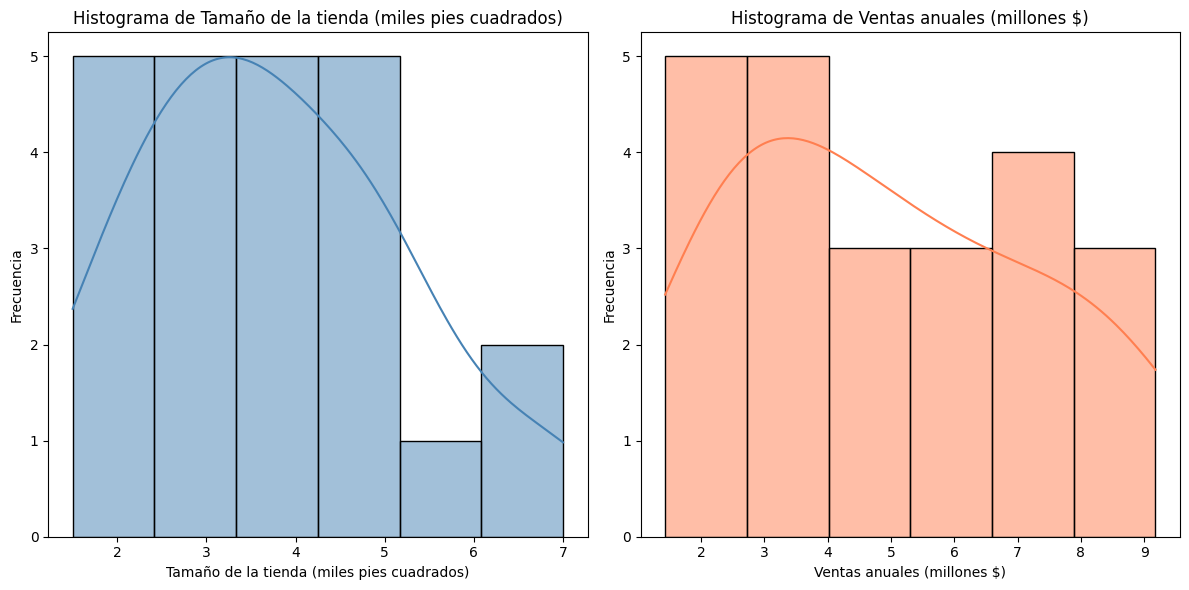

------------------------------
Generating Scatter Plot...


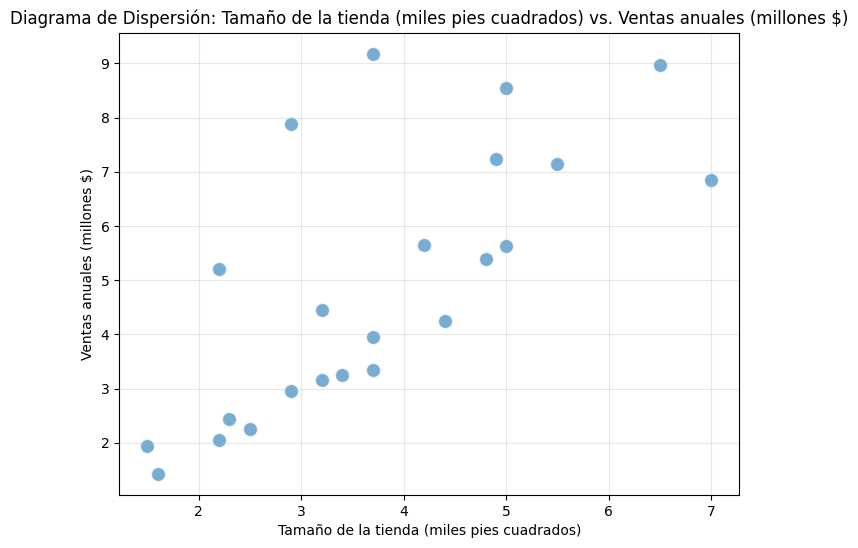

------------------------------
Parte (a): Diagrama de Dispersión.
Observe el gráfico para determinar si la relación parece positiva.
Performing Normality Tests...
Shapiro-Wilk test for 'Tamaño de la tienda (miles pies cuadrados)': Statistics=0.965, p-value=0.560
Shapiro-Wilk test for 'Ventas anuales (millones $)': Statistics=0.940, p-value=0.177

Interpretation of normality test results:
✓ The 'Tamaño de la tienda (miles pies cuadrados)' variable appears to be normally distributed (p > 0.05).
✓ The 'Ventas anuales (millones $)' variable appears to be normally distributed (p > 0.05).
------------------------------
Calculating Correlation Coefficients...
Pearson correlation coefficient: 0.7138
Kendall correlation coefficient: 0.6173
Spearman correlation coefficient: 0.7500
------------------------------
Determining the most appropriate correlation coefficient...
✓ Both variables appear normally distributed. The Pearson correlation coefficient (0.7138) is the most appropriate.
-----------

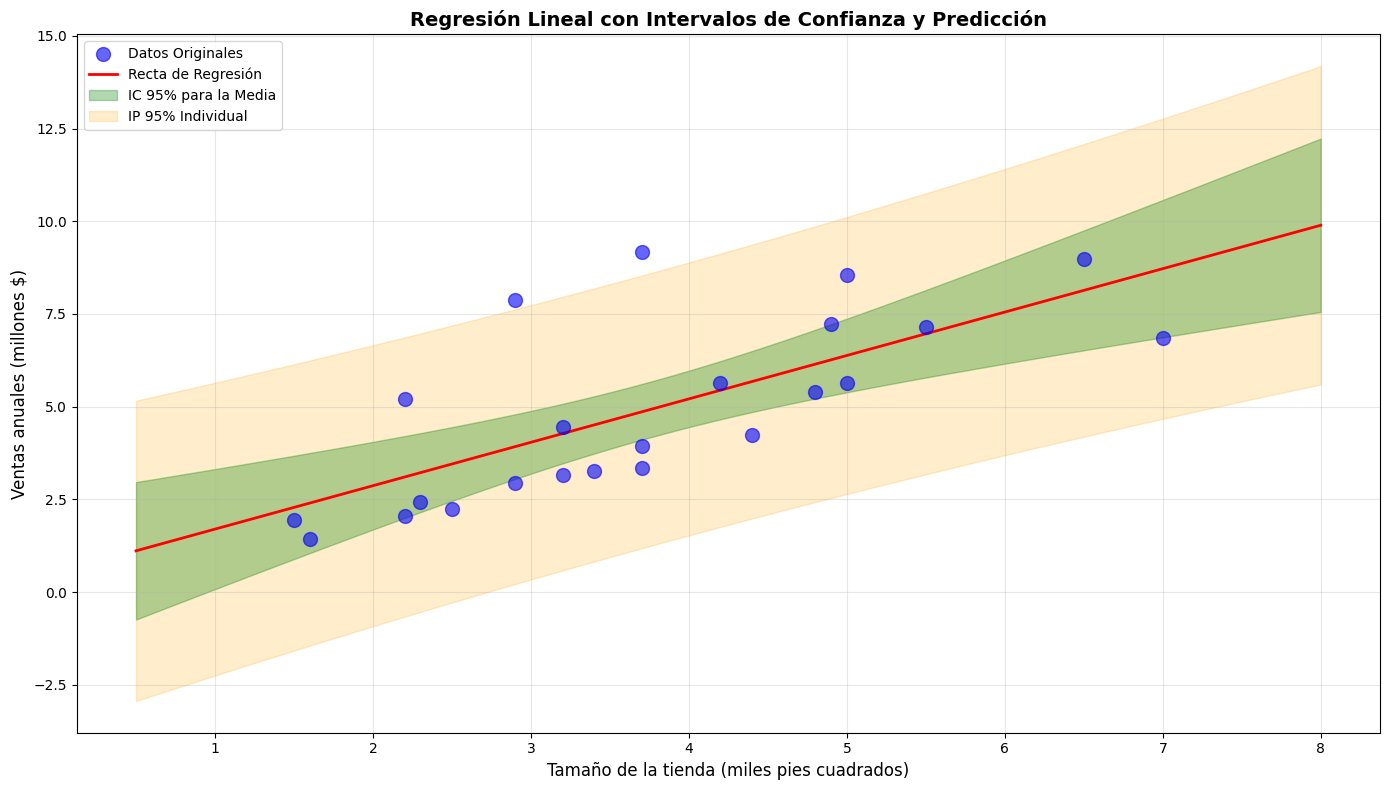

Visualización generada exitosamente!

--- ANÁLISIS DE RESIDUOS ---

Tabla de Residuos:

Tienda     X        Y        ŷ        Residuo    Res. Std. 
------------------------------------------------------------
1          3.7      9.18     4.86     4.32       2.50      
2          5.0      8.54     6.38     2.16       1.25      
3          7.0      6.85     8.72     -1.87      -1.08     
4          6.5      8.98     8.14     0.84       0.49      
5          2.2      5.20     3.10     2.10       1.21      
6          5.5      7.15     6.97     0.18       0.11      
7          2.9      7.88     3.92     3.96       2.29      
8          4.2      5.65     5.44     0.21       0.12      
9          3.4      3.26     4.51     -1.25      -0.72     
10         2.5      2.25     3.45     -1.20      -0.70     
11         1.5      1.95     2.28     -0.33      -0.19     
12         3.7      3.34     4.86     -1.52      -0.88     
13         4.9      7.23     6.26     0.97       0.56      
14         

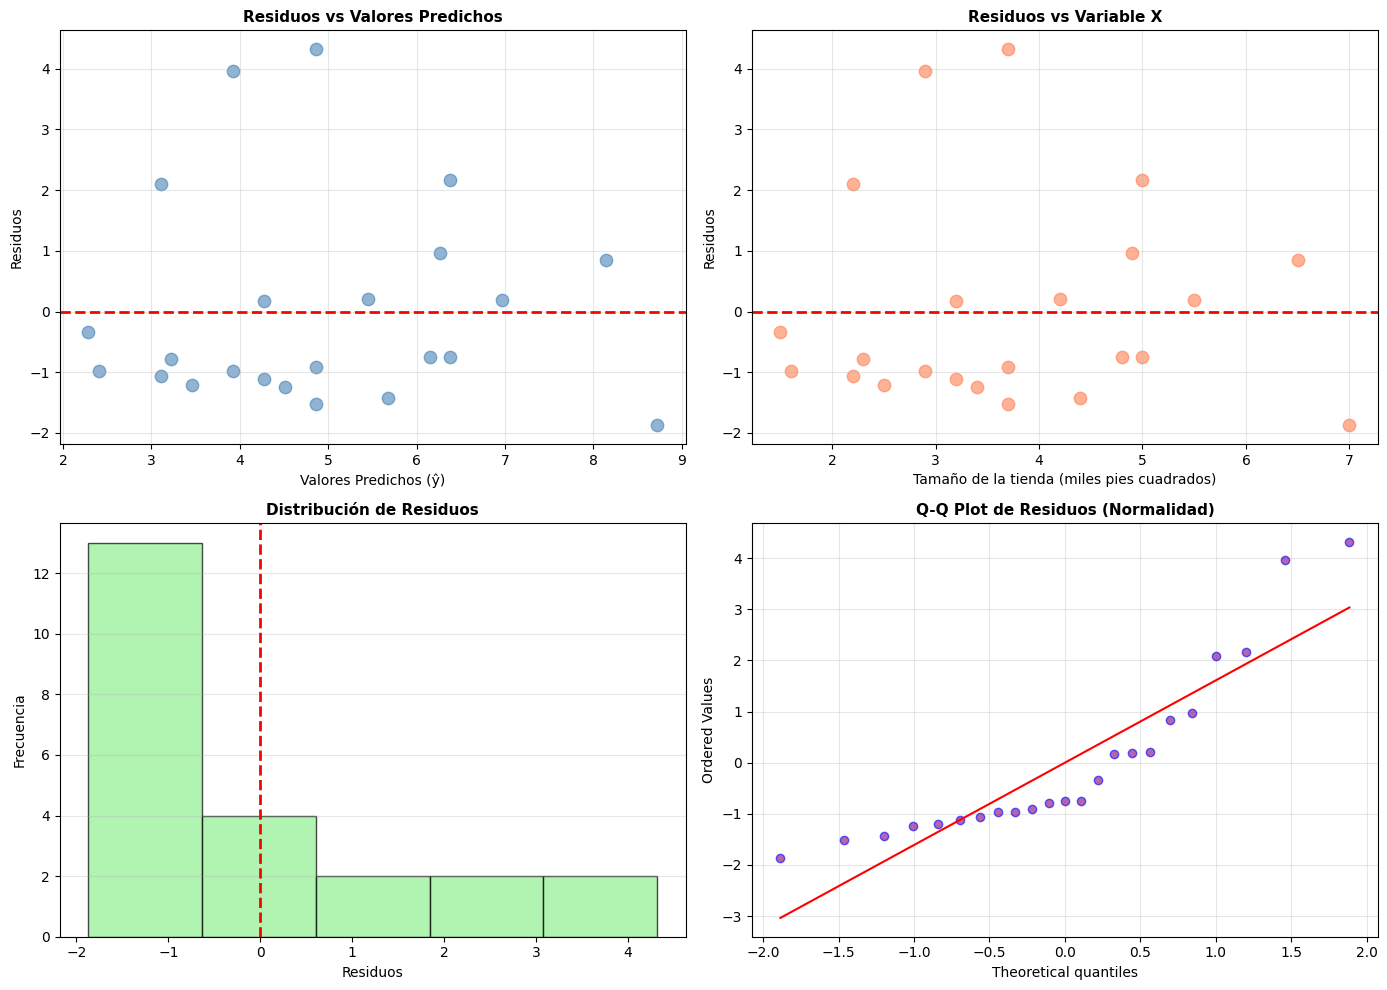


Prueba de Normalidad de Residuos (Shapiro-Wilk):
  Estadístico W = 0.8257
  Valor p = 0.0010
  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ 0.05)
    El supuesto de normalidad puede no cumplirse.

Interpretación de los gráficos de residuos:
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.


--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---

Criterios para evaluar si se necesita transformación:
----------------------------------------------------------------------

1. NORMALIDAD DE LAS VARIABLES:
   • Tamaño de la tienda (miles pies cuadrados): p-value = 0.5600
     ✓ Distribución normal
   • Ventas anuales (millones $): p-value = 0.1772
     ✓ Distribución normal

2. NORMALIDAD DE LOS RESIDUOS:
   • Residuos: p-value = 0.0010
    

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (The Cotton Mill: Tamaño de tienda vs. Ventas) ---
data_cotton_mill = {
    'Tamaño de la tienda (miles pies cuadrados)': [
        3.7, 5.0, 7.0, 6.5, 2.2, 5.5, 2.9,  # Región 1
        4.2, 3.4, 2.5, 1.5, 3.7, 4.9, 3.2,   # Región 2
        2.2, 1.6, 2.3, 2.9, 3.2, 3.7, 4.4, 4.8, 5.0 # Región 3
    ],
    'Ventas anuales (millones $)': [
        9.18, 8.54, 6.85, 8.98, 5.20, 7.15, 7.88,  # Región 1
        5.65, 3.26, 2.25, 1.95, 3.34, 7.23, 4.45,   # Región 2
        2.05, 1.43, 2.44, 2.95, 3.16, 3.95, 4.25, 5.39, 5.64 # Región 3
    ]
}
df_cotton_mill = pd.DataFrame(data_cotton_mill)

variable_x_cotton_mill = 'Tamaño de la tienda (miles pies cuadrados)'
variable_y_cotton_mill = 'Ventas anuales (millones $)'
n_cotton_mill = len(df_cotton_mill)
alfa_cotton_mill = 0.05 # Nivel de significancia

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: The Cotton Mill - Tamaño de Tienda vs. Ventas Anuales")
print("=" * 70)
print(f"\nDatos cargados: {n_cotton_mill} tiendas")
print(f"Variable independiente (X): {variable_x_cotton_mill}")
print(f"Variable dependiente (Y): {variable_y_cotton_mill}")
print(f"Nivel de significancia (α): {alfa_cotton_mill}")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# =========================================================================
print("\n--- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---")

# 1. Histograms
print("\nGenerating Histograms...")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_cotton_mill[variable_x_cotton_mill], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x_cotton_mill}')
plt.xlabel(variable_x_cotton_mill)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_cotton_mill[variable_y_cotton_mill], kde=True, color='coral')
plt.title(f'Histograma de {variable_y_cotton_mill}')
plt.xlabel(variable_y_cotton_mill)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
print("-" * 30)

# 2. Scatter Plot (corresponds to part (a))
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_cotton_mill, y=variable_y_cotton_mill, data=df_cotton_mill, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x_cotton_mill} vs. {variable_y_cotton_mill}')
plt.xlabel(variable_x_cotton_mill)
plt.ylabel(variable_y_cotton_mill)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)
print("Parte (a): Diagrama de Dispersión.")
print("Observe el gráfico para determinar si la relación parece positiva.")


# 3. Normality Tests (Shapiro-Wilk)
print("Performing Normality Tests...")
shapiro_test_tamano = shapiro(df_cotton_mill[variable_x_cotton_mill])
print(f"Shapiro-Wilk test for '{variable_x_cotton_mill}': Statistics={shapiro_test_tamano.statistic:.3f}, p-value={shapiro_test_tamano.pvalue:.3f}")

shapiro_test_ventas = shapiro(df_cotton_mill[variable_y_cotton_mill])
print(f"Shapiro-Wilk test for '{variable_y_cotton_mill}': Statistics={shapiro_test_ventas.statistic:.3f}, p-value={shapiro_test_ventas.pvalue:.3f}")

print("\nInterpretation of normality test results:")
if shapiro_test_tamano.pvalue > alfa_cotton_mill:
    print(f"✓ The '{variable_x_cotton_mill}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_x_cotton_mill}' variable does not appear to be normally distributed (p <= 0.05).")

if shapiro_test_ventas.pvalue > alfa_cotton_mill:
    print(f"✓ The '{variable_y_cotton_mill}' variable appears to be normally distributed (p > 0.05).")
else:
    print(f"✗ The '{variable_y_cotton_mill}' variable does not appear to be normally distributed (p <= 0.05).")
print("-" * 30)

# 4. Calculate Correlation Coefficients (corresponds to part (b) - correlation)
print("Calculating Correlation Coefficients...")
pearson_corr_cotton_mill = df_cotton_mill[variable_x_cotton_mill].corr(df_cotton_mill[variable_y_cotton_mill], method='pearson')
kendall_corr_cotton_mill = df_cotton_mill[variable_x_cotton_mill].corr(df_cotton_mill[variable_y_cotton_mill], method='kendall')
spearman_corr_cotton_mill = df_cotton_mill[variable_x_cotton_mill].corr(df_cotton_mill[variable_y_cotton_mill], method='spearman')

print(f"Pearson correlation coefficient: {pearson_corr_cotton_mill:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr_cotton_mill:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr_cotton_mill:.4f}")
print("-" * 30)

# 5. Determine the most appropriate correlation coefficient
print("Determining the most appropriate correlation coefficient...")
if shapiro_test_tamano.pvalue > alfa_cotton_mill and shapiro_test_ventas.pvalue > alfa_cotton_mill:
    print(f"✓ Both variables appear normally distributed. The Pearson correlation coefficient ({pearson_corr_cotton_mill:.4f}) is the most appropriate.")
else:
     print(f"⚠ At least one variable does not appear normally distributed. The Spearman correlation coefficient ({spearman_corr_cotton_mill:.4f}) or Kendall correlation coefficient ({kendall_corr_cotton_mill:.4f}) are more appropriate non-parametric measures.")
print("-" * 70)


# =========================================================================
# --- PARTE 1: PRUEBA DE HIPÓTESIS PARA LA CORRELACIÓN (corresponds to part (c)) ---
# =========================================================================

# Hipótesis: H0: rho = 0, H1: rho != 0 (Prueba de dos colas)
r_cotton_mill = pearson_corr_cotton_mill
gl_cotton_mill = n_cotton_mill - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado_cotton_mill = r_cotton_mill * np.sqrt(n_cotton_mill - 2) / np.sqrt(1 - r_cotton_mill**2)
except ZeroDivisionError:
    t_calculado_cotton_mill = float('nan')

# Valor p (two-sided)
valor_p_cotton_mill = t.sf(abs(t_calculado_cotton_mill), gl_cotton_mill) * 2

# Valor crítico de t (para alfa/2)
t_critico_positivo_cotton_mill = t.ppf(1 - alfa_cotton_mill / 2, gl_cotton_mill)
t_critico_negativo_cotton_mill = -t_critico_positivo_cotton_mill

print("\n" + "=" * 70)
print("--- PRUEBA DE HIPÓTESIS PARA EL COEFICIENTE DE CORRELACIÓN ---")
print("=" * 70)
print(f"\nHipótesis:")
print(f"H0: ρ = 0 (No existe correlación lineal)")
print(f"H1: ρ ≠ 0 (Existe correlación lineal)")
print(f"\nNúmero de observaciones (n): {n_cotton_mill}")
print(f"Grados de libertad (gl): {gl_cotton_mill}")
print(f"Coeficiente de correlación de Pearson (r): {r_cotton_mill:.4f}")
print(f"Estadístico t calculado: {t_calculado_cotton_mill:.4f}")
print(f"Valor crítico (t, α={alfa_cotton_mill}): ±{t_critico_positivo_cotton_mill:.4f}")
print(f"Valor p: {valor_p_cotton_mill:.4f}")

# Criterio de Decisión
if valor_p_cotton_mill < alfa_cotton_mill:
    decision_hipotesis_cotton_mill = "RECHAZAR H0"
    conclusion_correlacion = "✓ Existe una correlación lineal significativa (ρ ≠ 0)."
else:
    decision_hipotesis_cotton_mill = "NO RECHAZAR H0"
    conclusion_correlacion = "✗ No hay evidencia de una correlación lineal significativa (ρ = 0)."

print(f"\nDECISIÓN (Valor p < {alfa_cotton_mill}): {decision_hipotesis_cotton_mill}")
print(f"CONCLUSIÓN: {conclusion_correlacion}")
print("=" * 70)

print("\nParte (c): Conclusión sobre la significancia de la correlación.")
print(f"Dado el valor p ({valor_p_cotton_mill:.4f}) y el nivel de significancia ({alfa_cotton_mill}), puede concluir que {conclusion_correlacion.lower()}")


# =========================================================================
# --- PARTE 2: RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---
# =========================================================================

# Cálculo de la media de X y Y
mean_x_cotton_mill = df_cotton_mill[variable_x_cotton_mill].mean()
mean_y_cotton_mill = df_cotton_mill[variable_y_cotton_mill].mean()

# 1. Cálculo de la PENDIENTE (b1)
std_x_cotton_mill = df_cotton_mill[variable_x_cotton_mill].std(ddof=1)  # Desviación estándar muestral
std_y_cotton_mill = df_cotton_mill[variable_y_cotton_mill].std(ddof=1)  # Desviación estándar muestral
b1_cotton_mill = r_cotton_mill * (std_y_cotton_mill / std_x_cotton_mill)

# 2. Cálculo de la INTERSECCIÓN CON EL EJE Y (b0)
b0_cotton_mill = mean_y_cotton_mill - b1_cotton_mill * mean_x_cotton_mill

print("\n" + "=" * 70)
print("--- RECTA DE MÍNIMOS CUADRADOS (REGRESIÓN LINEAL) ---")
print("=" * 70)
print(f"\nVariable independiente (X): {variable_x_cotton_mill}")
print(f"Variable dependiente (Y): {variable_y_cotton_mill}")
print(f"\nEstadísticos Descriptivos:")
print(f"Media de X (x̄): {mean_x_cotton_mill:.2f}")
print(f"Media de Y (ȳ): {mean_y_cotton_mill:.2f}")
print(f"Desviación estándar de X (Sx): {std_x_cotton_mill:.2f}")
print(f"Desviación estándar de Y (Sy): {std_y_cotton_mill:.2f}")

print(f"\nCoeficientes de Regresión:")
print(f"PENDIENTE (b₁): {b1_cotton_mill:.4f}")
print(f"INTERSECCIÓN (b₀): {b0_cotton_mill:.4f}")

print("\n┌─────────────────────────────────────────────────────┐")
print(f"│  ECUACIÓN DE REGRESIÓN:                             │")
print(f"│  Ŷ = {b0_cotton_mill:.4f} + {b1_cotton_mill:.4f} * X                  │")
print("└─────────────────────────────────────────────────────┘")
print("=" * 70)


# =========================================================================
# --- COEFICIENTE DE DETERMINACIÓN (R²) (corresponds to part (b) - determination) ---
# =========================================================================

print("\n" + "=" * 70)
print("--- COEFICIENTE DE DETERMINACIÓN (R²) ---")
print("=" * 70)

# Cálculo de R²
# R² = 1 - (SSE / SS Total)
# donde SSE = Σ(y - ŷ)² y SS Total = Σ(y - ȳ)²

# Calcular valores predichos (ŷ) si no se ha hecho antes
if 'y_predicho' not in df_cotton_mill.columns:
    df_cotton_mill['y_predicho'] = b0_cotton_mill + b1_cotton_mill * df_cotton_mill[variable_x_cotton_mill]


SSE_cotton_mill = ((df_cotton_mill[variable_y_cotton_mill] - df_cotton_mill['y_predicho']) ** 2).sum()
SS_Total_cotton_mill = ((df_cotton_mill[variable_y_cotton_mill] - mean_y_cotton_mill) ** 2).sum()
SSR_cotton_mill = SS_Total_cotton_mill - SSE_cotton_mill

r_cuadrado_cotton_mill = 1 - (SSE_cotton_mill / SS_Total_cotton_mill)
# También: r_cuadrado_cotton_mill = r_cotton_mill ** 2 # This should be calculated from SSE and SS_Total for consistency with ANOVA table

print(f"\nSuma de Cuadrados:")
print(f"  SS Total (Variabilidad total)     = {SS_Total_cotton_mill:.4f}")
print(f"  SSR (Explicada por regresión)     = {SSR_cotton_mill:.4f}")
print(f"  SSE (No explicada - Error)        = {SSE_cotton_mill:.4f}")

print(f"\nCálculo de R²:")
print(f"  R² = 1 - (SSE / SS Total)")
print(f"  R² = 1 - ({SSE_cotton_mill:.4f} / {SS_Total_cotton_mill:.4f})")
print(f"  R² = {r_cuadrado_cotton_mill:.4f}")

print(f"\nVerificación: R² = r² = ({r_cotton_mill:.4f})² = {r_cotton_mill**2:.4f}")

print(f"\n┌─────────────────────────────────────────────────────────────────┐")
print(f"│  INTERPRETACIÓN DE R²:                                          │")
print(f"│  El {r_cuadrado_cotton_mill*100:.2f}% de la variabilidad en las ventas  │")
print(f"│  anuales puede ser explicada por el tamaño de la tienda.        │")
print(f"└─────────────────────────────────────────────────────────────────┘")

print("\n" + "=" * 70)

print("\nParte (b): Coeficiente de Correlación y Coeficiente de Determinación.")
print(f"El coeficiente de correlación de Pearson (r) es {r_cotton_mill:.4f}.")
print(f"El coeficiente de determinación (R²) es {r_cuadrado_cotton_mill:.4f}.")
print(f"La relación es {'fuerte' if abs(r_cotton_mill) > 0.7 else 'moderada' if abs(r_cotton_mill) > 0.4 else 'débil'} {'positiva' if r_cotton_mill > 0 else 'negativa'}.")


# =========================================================================
# --- TABLA ANOVA DE REGRESIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- TABLA ANOVA DE REGRESIÓN ---")
print("=" * 70)

# Calcular cuadrados medios
MSR_cotton_mill = SSR_cotton_mill / 1  # 1 grado de libertad para regresión
MSE_cotton_mill = SSE_cotton_mill / (n_cotton_mill - 2)  # n-2 grados de libertad para error

# Estadístico F
F_calculado_cotton_mill = MSR_cotton_mill / MSE_cotton_mill

# Valor p del estadístico F
valor_p_f_cotton_mill = f_dist.sf(F_calculado_cotton_mill, 1, n_cotton_mill - 2)

print(f"\n{'Fuente':<20} {'SS':<15} {'gl':<10} {'MS':<15} {'F':<15} {'Valor p':<15}")
print("-" * 90)
print(f"{'Regresión':<20} {SSR_cotton_mill:<15.4f} {1:<10} {MSR_cotton_mill:<15.4f} {F_calculado_cotton_mill:<15.4f} {valor_p_f_cotton_mill:<15.6f}")
print(f"{'Error':<20} {SSE_cotton_mill:<15.4f} {n_cotton_mill-2:<10} {MSE_cotton_mill:<15.4f}")
print(f"{'Total':<20} {SS_Total_cotton_mill:<15.4f} {n_cotton_mill-1:<10}")

print(f"\nINTERPRETACIÓN:")
if valor_p_f_cotton_mill < alfa_cotton_mill:
    print(f"✓ El modelo de regresión ES significativo (p = {valor_p_f_cotton_mill:.6f} < {alfa_cotton_mill})")
    print("  El modelo es útil para hacer predicciones.")
else:
    print(f"✗ El modelo de regresión NO es significativo (p = {valor_p_f_cotton_mill:.6f} ≥ {alfa_cotton_mill})")
    print("  El modelo NO es útil para hacer predicciones.")

print("=" * 70)


# =========================================================================
# --- PARTE 3: PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# =========================================================================

print("\n" + "=" * 70)
print("--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print("=" * 70)

# Hipótesis:
# H0: β = 0 (La pendiente no es significativamente diferente de cero)
# H1: β > 0 (La pendiente es significativamente mayor que cero)

print("\nHipótesis:")
print("H0: β = 0 (No hay relación lineal significativa)")
print("H1: β > 0 (Existe una relación lineal positiva significativa)") # Adjust hypothesis based on expected relationship

# Calcular valores predichos (ŷ) (already done above)
# df_cotton_mill['y_predicho'] = b0_cotton_mill + b1_cotton_mill * df_cotton_mill[variable_x_cotton_mill]

# Calcular el Error Estándar de Estimación (s_y,x)
diferencias_cuadradas_cotton_mill = (df_cotton_mill[variable_y_cotton_mill] - df_cotton_mill['y_predicho']) ** 2
suma_diferencias_cuadradas_cotton_mill = diferencias_cuadradas_cotton_mill.sum()
s_yx_cotton_mill = np.sqrt(suma_diferencias_cuadradas_cotton_mill / (n_cotton_mill - 2))

print(f"\n1. Cálculo del Error Estándar de Estimación (s_y,x):")
print(f"   Σ(y - ŷ)² = {suma_diferencias_cuadradas_cotton_mill:.4f}")
print(f"   s_y,x = √[Σ(y - ŷ)² / (n - 2)] = {s_yx_cotton_mill:.4f}")

# Calcular el Error Estándar de la Pendiente (s_b)
desviaciones_x_cotton_mill = (df_cotton_mill[variable_x_cotton_mill] - mean_x_cotton_mill) ** 2
suma_desviaciones_x_cotton_mill = desviaciones_x_cotton_mill.sum()
s_b_cotton_mill = s_yx_cotton_mill / np.sqrt(suma_desviaciones_x_cotton_mill)

print(f"\n2. Cálculo del Error Estándar de la Pendiente (s_b):")
print(f"   Σ(x - x̄)² = {suma_desviaciones_x_cotton_mill:.4f}")
print(f"   s_b = s_y,x / √[Σ(x - x̄)²] = {s_b_cotton_mill:.4f}")

# Calcular el estadístico t
t_calculado_pendiente_cotton_mill = (b1_cotton_mill - 0) / s_b_cotton_mill

print(f"\n3. Cálculo del Estadístico t:")
print(f"   t = (b₁ - 0) / s_b = ({b1_cotton_mill:.4f} - 0) / {s_b_cotton_mill:.4f}")
print(f"   t calculado = {t_calculado_pendiente_cotton_mill:.4f}")

# Grados de libertad
gl_pendiente_cotton_mill = n_cotton_mill - 2

# Valor crítico (prueba de una cola, cola derecha - assuming positive relationship)
t_critico_pendiente_cotton_mill = t.ppf(1 - alfa_cotton_mill, gl_pendiente_cotton_mill)

# Valor p (prueba de una cola)
valor_p_pendiente_cotton_mill = t.sf(t_calculado_pendiente_cotton_mill, gl_pendiente_cotton_mill)

print(f"\n4. Parámetros de la Prueba:")
print(f"   Nivel de significancia (α) = {alfa_cotton_mill}")
print(f"   Grados de libertad (gl) = {gl_pendiente_cotton_mill}")
print(f"   Valor crítico (t_{alfa_cotton_mill},{gl_pendiente_cotton_mill}) = {t_critico_pendiente_cotton_mill:.4f}")
print(f"   Valor p (una cola) = {valor_p_pendiente_cotton_mill:.4f}")

# Criterio de Decisión
print("\n" + "-" * 70)
print("CRITERIO DE DECISIÓN:")
print("-" * 70)

# Adjust decision based on one-tailed test
if valor_p_pendiente_cotton_mill < alfa_cotton_mill:
    decision_pendiente_cotton_mill = "RECHAZAR H0"
    interpretacion_pendiente = "✓ La pendiente ES significativamente mayor que cero."
    conclusion_pendiente_cotton_mill_text = f"""
    Dado que el valor p ({valor_p_pendiente_cotton_mill:.4f}) < α ({alfa_cotton_mill}), rechazamos la hipótesis nula.
    Esto significa que existe evidencia estadística suficiente para concluir que
    el tamaño de la tienda tiene un efecto significativo POSITIVO sobre
    las ventas anuales.

    En términos prácticos: Por cada mil pies cuadrados adicional de tamaño,
    se espera un incremento de {b1_cotton_mill:.4f} millones de dólares en ventas anuales,
    y este efecto es estadísticamente significativo.
    """
else:
    decision_pendiente_cotton_mill = "NO RECHAZAR H0"
    interpretacion_pendiente = "✗ La pendiente NO es significativamente mayor que cero."
    conclusion_pendiente_cotton_mill_text = f"""
    Dado que el valor p ({valor_p_pendiente_cotton_mill:.4f}) ≥ α ({alfa_cotton_mill}), no rechazamos la hipótesis nula.
    No hay evidencia estadística suficiente para concluir que el tamaño de la
    tienda tenga un efecto significativo positivo sobre las ventas anuales.
    """

print(f"t calculado ({t_calculado_pendiente_cotton_mill:.4f}) {'>' if t_calculado_pendiente_cotton_mill > t_critico_pendiente_cotton_mill else '<'} t crítico ({t_critico_pendiente_cotton_mill:.4f})")
print(f"valor p ({valor_p_pendiente_cotton_mill:.4f}) {'<' if valor_p_pendiente_cotton_mill < alfa_cotton_mill else '≥'} α ({alfa_cotton_mill})")
print(f"\nDECISIÓN: {decision_pendiente_cotton_mill}")
print(f"INTERPRETACIÓN: {interpretacion_pendiente}")

print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL (Significancia de la Pendiente):")
print("=" * 70)
print(conclusion_pendiente_cotton_mill_text)


# =========================================================================
# --- PARTE 4: INTERVALOS DE CONFIANZA Y PREDICCIÓN ---
# =========================================================================

print("\n" + "=" * 70)
print("--- INTERVALOS DE CONFIANZA Y PREDICCIÓN ---")
print("=" * 70)

# Valor crítico t para intervalos (dos colas)
t_critico_intervalo_cotton_mill = t.ppf(1 - alfa_cotton_mill/2, gl_pendiente_cotton_mill)
print(f"\nValor crítico t para intervalos (α={alfa_cotton_mill}, gl={gl_pendiente_cotton_mill}): ±{t_critico_intervalo_cotton_mill:.4f}")

# =========================================================================
# A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("A) INTERVALO DE CONFIANZA PARA LA MEDIA DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1/n + (x - x̄)² / Σ(x - x̄)²]")

# Ejemplo: Calcular intervalo para algunos valores de X (Tamaño de tienda)
valores_x_ejemplo_cotton_mill = [3.0, 5.0, 7.0]

print(f"\nNivel de confianza: {(1-alfa_cotton_mill)*100:.0f}%")
print(f"\nIntervalos de confianza para la MEDIA de ventas anuales:\n")
print(f"{'X (Tamaño Tienda)':<20} {'ŷ (Predicción)':<20} {'Intervalo de Confianza':<35}")
print("-" * 75)

intervalos_confianza_cotton_mill = []
for x_val in valores_x_ejemplo_cotton_mill:
    # Predicción
    y_pred = b0_cotton_mill + b1_cotton_mill * x_val

    # Término del error
    termino_error = np.sqrt((1/n_cotton_mill) + ((x_val - mean_x_cotton_mill)**2 / suma_desviaciones_x_cotton_mill))

    # Margen de error
    margen_conf = t_critico_intervalo_cotton_mill * s_yx_cotton_mill * termino_error

    # Límites del intervalo
    limite_inferior_conf = y_pred - margen_conf
    limite_superior_conf = y_pred + margen_conf

    intervalos_confianza_cotton_mill.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_conf,
        'limite_sup': limite_superior_conf
    })

    print(f"{x_val:<20.1f} {y_pred:<20.2f} [{limite_inferior_conf:.2f}, {limite_superior_conf:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa_cotton_mill)*100:.0f}% de confianza, para un tamaño de tienda de X mil pies cuadrados,")
print("la MEDIA de las ventas anuales estará dentro del intervalo calculado.")

# =========================================================================
# B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X
# =========================================================================
print("\n" + "-" * 70)
print("B) INTERVALO DE PREDICCIÓN PARA UN VALOR INDIVIDUAL DE Y, DADA X")
print("-" * 70)
print("Fórmula: ŷ ± t·s_y,x·√[1 + 1/n + (x - x̄)² / Σ(x - x̄)²]")

print(f"\nNivel de confianza: {(1-alfa_cotton_mill)*100:.0f}%")
print(f"\nIntervalos de predicción para ventas anuales INDIVIDUALES:\n")
print(f"{'X (Tamaño Tienda)':<20} {'ŷ (Predicción)':<20} {'Intervalo de Predicción':<35}")
print("-" * 75)

intervalos_prediccion_cotton_mill = []
for x_val in valores_x_ejemplo_cotton_mill:
    # Predicción
    y_pred = b0_cotton_mill + b1_cotton_mill * x_val

    # Término del error (NOTA: incluye el 1 + ...)
    termino_error_pred = np.sqrt(1 + (1/n_cotton_mill) + ((x_val - mean_x_cotton_mill)**2 / suma_desviaciones_x_cotton_mill))

    # Margen de error
    margen_pred = t_critico_intervalo_cotton_mill * s_yx_cotton_mill * termino_error_pred

    # Límites del intervalo
    limite_inferior_pred = y_pred - margen_pred
    limite_superior_pred = y_pred + margen_pred

    intervalos_prediccion_cotton_mill.append({
        'x': x_val,
        'y_pred': y_pred,
        'limite_inf': limite_inferior_pred,
        'limite_sup': limite_superior_pred
    })

    print(f"{x_val:<20.1f} {y_pred:<20.2f} [{limite_inferior_pred:.2f}, {limite_superior_pred:.2f}]")

print("\nINTERPRETACIÓN:")
print(f"Con un {(1-alfa_cotton_mill)*100:.0f}% de confianza, para un tamaño de tienda de X mil pies cuadrados,")
print("una observación INDIVIDUAL de ventas anuales estará dentro del intervalo calculado.")

# =========================================================================
# COMPARACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("COMPARACIÓN: INTERVALO DE CONFIANZA vs INTERVALO DE PREDICCIÓN")
print("=" * 70)

print("\n📊 Diferencias clave:")
print("\n1. INTERVALO DE CONFIANZA (para la media):")
print("   - Más ESTRECHO")
print("   - Estima dónde está la MEDIA de Y para un valor dado de X")
print("   - Útil para entender la relación promedio")

print("\n2. INTERVALO DE PREDICCIÓN (para un valor individual):")
print("   - Más AMPLIO")
print("   - Predice dónde estará una OBSERVACIÓN INDIVIDUAL de Y")
print("   - Útil para hacer predicciones específicas")

print("\n3. ¿Por qué el intervalo de predicción es más amplio?")
print("   - Incluye la incertidumbre de la media (como el de confianza)")
print("   - ADEMÁS incluye la variabilidad individual alrededor de esa media")

# =========================================================================
# VISUALIZACIÓN DE INTERVALOS
# =========================================================================
print("\n" + "=" * 70)
print("Generando visualización de intervalos...")

plt.figure(figsize=(14, 8))

# Datos originales
plt.scatter(df_cotton_mill[variable_x_cotton_mill], df_cotton_mill[variable_y_cotton_mill],
           color='blue', s=100, alpha=0.6, label='Datos Originales', zorder=3)

# Recta de regresión
x_range_cotton_mill = np.linspace(df_cotton_mill[variable_x_cotton_mill].min() - 1, df_cotton_mill[variable_x_cotton_mill].max() + 1, 100)
y_range_cotton_mill = b0_cotton_mill + b1_cotton_mill * x_range_cotton_mill
plt.plot(x_range_cotton_mill, y_range_cotton_mill, 'r-', linewidth=2, label='Recta de Regresión', zorder=2)

# Calcular intervalos para todo el rango
ic_lower_cotton_mill = []
ic_upper_cotton_mill = []
ip_lower_cotton_mill = []
ip_upper_cotton_mill = []

for x_val in x_range_cotton_mill:
    y_pred = b0_cotton_mill + b1_cotton_mill * x_val

    # Intervalo de confianza
    termino_error_conf = np.sqrt((1/n_cotton_mill) + ((x_val - mean_x_cotton_mill)**2 / suma_desviaciones_x_cotton_mill))
    margen_conf = t_critico_intervalo_cotton_mill * s_yx_cotton_mill * termino_error_conf
    ic_lower_cotton_mill.append(y_pred - margen_conf)
    ic_upper_cotton_mill.append(y_pred + margen_conf)

    # Intervalo de predicción
    termino_error_pred = np.sqrt(1 + (1/n_cotton_mill) + ((x_val - mean_x_cotton_mill)**2 / suma_desviaciones_x_cotton_mill))
    margen_pred = t_critico_intervalo_cotton_mill * s_yx_cotton_mill * termino_error_pred
    ip_lower_cotton_mill.append(y_pred - margen_pred)
    ip_upper_cotton_mill.append(y_pred + margen_pred)


# Graficar intervalos de confianza
plt.fill_between(x_range_cotton_mill, ic_lower_cotton_mill, ic_upper_cotton_mill,
                alpha=0.3, color='green',
                label=f'IC {(1-alfa_cotton_mill)*100:.0f}% para la Media', zorder=1)

# Graficar intervalos de predicción
plt.fill_between(x_range_cotton_mill, ip_lower_cotton_mill, ip_upper_cotton_mill,
                alpha=0.2, color='orange',
                label=f'IP {(1-alfa_cotton_mill)*100:.0f}% Individual', zorder=0)

plt.xlabel(variable_x_cotton_mill, fontsize=12)
plt.ylabel(variable_y_cotton_mill, fontsize=12)
plt.title('Regresión Lineal con Intervalos de Confianza y Predicción', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualización generada exitosamente!")
print("=" * 70)

# =========================================================================
# --- ANÁLISIS DE RESIDUOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- ANÁLISIS DE RESIDUOS ---")
print("=" * 70)

# Calcular residuos
df_cotton_mill['residuos'] = df_cotton_mill[variable_y_cotton_mill] - df_cotton_mill['y_predicho']
df_cotton_mill['residuos_estandarizados'] = df_cotton_mill['residuos'] / s_yx_cotton_mill

print("\nTabla de Residuos:")
print(f"\n{'Tienda':<10} {'X':<8} {'Y':<8} {'ŷ':<8} {'Residuo':<10} {'Res. Std.':<10}")
print("-" * 60)
# Add a simple identifier for each store since names are not provided for all
for idx, row in df_cotton_mill.iterrows():
    print(f"{idx+1:<10} {row[variable_x_cotton_mill]:<8.1f} {row[variable_y_cotton_mill]:<8.2f} "
          f"{row['y_predicho']:<8.2f} {row['residuos']:<10.2f} {row['residuos_estandarizados']:<10.2f}")


# Estadísticas de residuos
print(f"\nEstadísticas de los Residuos:")
print(f"  Media de residuos: {df_cotton_mill['residuos'].mean():.4f} (debe ser ≈ 0)")
print(f"  Desviación estándar: {df_cotton_mill['residuos'].std():.4f}")
print(f"  Residuo mínimo: {df_cotton_mill['residuos'].min():.4f}")
print(f"  Residuo máximo: {df_cotton_mill['residuos'].max():.4f}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df_cotton_mill['y_predicho'], df_cotton_mill['residuos'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df_cotton_mill[variable_x_cotton_mill], df_cotton_mill['residuos'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x_cotton_mill, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Variable X', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df_cotton_mill['residuos'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df_cotton_mill['residuos'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Normalidad)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)


plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos_cotton_mill = shapiro(df_cotton_mill['residuos'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk):")
print(f"  Estadístico W = {shapiro_residuos_cotton_mill.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos_cotton_mill.pvalue:.4f}")

if shapiro_residuos_cotton_mill.pvalue > alfa_cotton_mill:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa_cotton_mill})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa_cotton_mill})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos:")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")

print("\n" + "=" * 70)

# =========================================================================
# --- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---
# =========================================================================

print("\n" + "=" * 70)
print("--- EVALUACIÓN DE NECESIDAD DE TRANSFORMACIÓN DE DATOS ---")
print("=" * 70)

print("\nCriterios para evaluar si se necesita transformación:")
print("-" * 70)

# 1. Normalidad de las variables
print("\n1. NORMALIDAD DE LAS VARIABLES:")
print(f"   • {variable_x_cotton_mill}: p-value = {shapiro_test_tamano.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_tamano.pvalue > alfa_cotton_mill else '✗ No normal'}")
print(f"   • {variable_y_cotton_mill}: p-value = {shapiro_test_ventas.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_test_ventas.pvalue > alfa_cotton_mill else '✗ No normal'}")

# 2. Normalidad de residuos
print(f"\n2. NORMALIDAD DE LOS RESIDUOS:")
print(f"   • Residuos: p-value = {shapiro_residuos_cotton_mill.pvalue:.4f}")
print(f"     {'✓ Distribución normal' if shapiro_residuos_cotton_mill.pvalue > alfa_cotton_mill else '✗ No normal'}")

# 3. Homocedasticidad (inspección visual)
print(f"\n3. HOMOCEDASTICIDAD (Varianza constante):")
print(f"   • Revisar gráfico 'Residuos vs Valores Predichos'")
print(f"   • Si los residuos muestran patrón de embudo o cono → transformar")
print(f"   • Si los residuos están distribuidos aleatoriamente → no transformar")

# 4. Linealidad
print(f"\n4. LINEALIDAD DE LA RELACIÓN:")
print(f"   • Revisar diagrama de dispersión X vs Y")
print(f"   • Coeficiente de correlación: r = {r_cotton_mill:.4f}")
print(f"     {'✓ Relación lineal adecuada' if abs(r_cotton_mill) > 0.6 else '⚠ Relación débil, considerar transformación'}")

# 5. Valores atípicos
residuos_estandarizados_cotton_mill = np.abs(df_cotton_mill['residuos_estandarizados'])
outliers_cotton_mill = df_cotton_mill[residuos_estandarizados_cotton_mill > 2.5]
print(f"\n5. VALORES ATÍPICOS:")
print(f"   • Número de residuos estandarizados > 2.5: {len(outliers_cotton_mill)}")
if len(outliers_cotton_mill) > 0:
    print(f"   • Tiendas con residuos atípicos:")
    # Add a simple identifier for each store
    for idx, row in outliers_cotton_mill.iterrows():
        print(f"     - Tienda {idx+1}: residuo std = {row['residuos_estandarizados']:.2f}")

# Decisión final
print("\n" + "=" * 70)
print("DECISIÓN SOBRE TRANSFORMACIÓN:")
print("=" * 70)

necesita_transformacion_cotton_mill = False
razones_transformacion_cotton_mill = []

if shapiro_test_tamano.pvalue <= alfa_cotton_mill or shapiro_test_ventas.pvalue <= alfa_cotton_mill:
    razones_transformacion_cotton_mill.append("- Variables originales no son normales")
    necesita_transformacion_cotton_mill = True

if shapiro_residuos_cotton_mill.pvalue <= alfa_cotton_mill:
    razones_transformacion_cotton_mill.append("- Residuos no siguen distribución normal")
    necesita_transformacion_cotton_mill = True

if abs(r_cotton_mill) < 0.5:
    razones_transformacion_cotton_mill.append("- Correlación lineal débil (r < 0.5)")
    necesita_transformacion_cotton_mill = True

if len(outliers_cotton_mill) > n_cotton_mill * 0.15:  # Más del 15% son outliers
    razones_transformacion_cotton_mill.append(f"- Exceso de valores atípicos ({len(outliers_cotton_mill)} casos)")
    necesita_transformacion_cotton_mill = True

if necesita_transformacion_cotton_mill:
    print("\n⚠ SE RECOMIENDA CONSIDERAR TRANSFORMACIÓN DE DATOS\n")
    print("Razones:")
    for razon in razones_transformacion_cotton_mill:
        print(f"  {razon}")

    print("\nTransformaciones sugeridas:")
    print("  • Logarítmica: Y' = log(Y) o X' = log(X)")
    print("    └─ Útil para reducir asimetría positiva y estabilizar varianza")
    print("  • Raíz cuadrada: Y' = √Y")
    print("    └─ Útil para datos de conteo con varianza proporcional a la media")
    print("  • Recíproca: Y' = 1/Y")
    print("    └─ Útil para relaciones no lineales decrecientes")
    print("  • Box-Cox: Encuentra la transformación óptima automáticamente")

    print("\n  IMPORTANTE: Después de transformar, repetir todo el análisis")
    print("  con los datos transformados y comparar resultados.")

else:
    print("\n✓ NO ES NECESARIA LA TRANSFORMACIÓN DE DATOS\n")
    print("Justificación:")

    if shapiro_test_tamano.pvalue > alfa_cotton_mill and shapiro_test_ventas.pvalue > alfa_cotton_mill:
        print("  ✓ Las variables originales son aproximadamente normales")

    if shapiro_residuos_cotton_mill.pvalue > alfa_cotton_mill:
        print("  ✓ Los residuos siguen una distribución normal")

    if abs(r_cotton_mill) >= 0.6:
        print(f"  ✓ La correlación lineal es adecuada (r = {r_cotton_mill:.4f})")

    if len(outliers_cotton_mill) <= n_cotton_mill * 0.15:
        print(f"  ✓ Número aceptable de valores atípicos ({len(outliers_cotton_mill)} casos)")

    print("\n  El modelo de regresión lineal simple es apropiado para estos datos")
    print("  sin necesidad de transformaciones. Los supuestos fundamentales se")
    print("  cumplen razonablemente bien.")

print("\n" + "=" * 70)


# =========================================================================
# --- RESUMEN EJECUTIVO DEL ANÁLISIS (corresponds to part (d)) ---
# =========================================================================

print("\n" + "=" * 70)
print("╔═════════════════════════════════════════════════════════════════╗")
print("║       RESUMEN EJECUTIVO DEL ANÁLISIS DE REGRESIÓN              ║")
print("╚═════════════════════════════════════════════════════════════════╝")
print("=" * 70)

print(f"""
📊 MODELO DE REGRESIÓN:
   Ecuación: Ŷ = {b0_cotton_mill:.4f} + {b1_cotton_mill:.4f} × X

   Interpretación:
   • El punto de partida (b₀) es {b0_cotton_mill:.2f} millones de dólares en ventas (cuando el tamaño es 0)
   • Por cada mil pies cuadrados adicional de tamaño, aumentan {b1_cotton_mill:.4f} millones de dólares en ventas anuales

📈 BONDAD DE AJUSTE:
   • Coeficiente de correlación (r): {r_cotton_mill:.4f}
     └─ Correlación {'fuerte' if abs(r_cotton_mill) > 0.7 else 'moderada' if abs(r_cotton_mill) > 0.4 else 'débil'} {'positiva' if r_cotton_mill > 0 else 'negativa'}

   • Coeficiente de determinación (R²): {r_cuadrado_cotton_mill:.4f}
     └─ {r_cuadrado_cotton_mill*100:.2f}% de la variabilidad explicada

   • Error estándar de estimación (s_y,x): {s_yx_cotton_mill:.4f}
     └─ Error típico de predicción: ±{s_yx_cotton_mill:.2f} millones de dólares

✅ PRUEBAS DE SIGNIFICANCIA (α = {alfa_cotton_mill}):

   1. Correlación:
      • Estadístico t: {t_calculado_cotton_mill:.4f}
      • Valor p: {valor_p_cotton_mill:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_cotton_mill < alfa_cotton_mill else '✗ NO SIGNIFICATIVA'}

   2. Pendiente:
      • Estadístico t: {t_calculado_pendiente_cotton_mill:.4f}
      • Valor p: {valor_p_pendiente_cotton_mill:.4f}
      • Decisión: {'✓ SIGNIFICATIVA' if valor_p_pendiente_cotton_mill < alfa_cotton_mill else '✗ NO SIGNIFICATIVA'}

   3. Modelo (ANOVA):
      • Estadístico F: {F_calculado_cotton_mill:.4f}
      • Valor p: {valor_p_f_cotton_mill:.6f}
      • Decisión: {'✓ MODELO SIGNIFICATIVO' if valor_p_f_cotton_mill < alfa_cotton_mill else '✗ MODELO NO SIGNIFICATIVO'}

🔍 VALIDACIÓN DE SUPUESTOS:
   • Normalidad de residuos: {'✓ CUMPLE' if shapiro_residuos_cotton_mill.pvalue > alfa_cotton_mill else '⚠ NO CUMPLE'} (p = {shapiro_residuos_cotton_mill.pvalue:.4f})
   • Linealidad: {'✓ Verificar gráfico de dispersión'}
   • Homocedasticidad: {'✓ Verificar gráfico de residuos'}

💡 CONCLUSIÓN GENERAL (corresponds to part (d)):
""")

if valor_p_pendiente_cotton_mill < alfa_cotton_mill and valor_p_f_cotton_mill < alfa_cotton_mill:
    print(f"""   ✓ EL MODELO ES VÁLIDO Y ÚTIL PARA PREDICCIONES

   El tamaño de la tienda es un predictor SIGNIFICATIVO de las ventas anuales.
   El modelo explica {r_cuadrado_cotton_mill*100:.2f}% de la variabilidad y puede utilizarse
   con confianza para:

   • Predecir ventas futuras basadas en el tamaño de nuevas tiendas
   • Evaluar el potencial de ventas de ubicaciones existentes
   • Informar decisiones de expansión y diseño de tiendas

   Recomendación: UTILIZAR este modelo como una herramienta en la planificación
   estratégica de The Cotton Mill.
""")
else:
    print(f"""   ⚠ EL MODELO TIENE LIMITACIONES

   Aunque existe una relación entre tamaño y ventas, el modelo
   presenta algunas limitaciones estadísticas. Se recomienda:

   • Recolectar más datos (más tiendas, más años) para mejorar el modelo
   • Considerar otras variables explicativas (ej: ubicación, marketing, competencia)
   • Realizar análisis adicionales antes de sacar conclusiones definitivas
""")

print("\n" + "=" * 70)
print("📌 NOTA: Revise todos los gráficos generados para una interpretación")
print("   completa de los resultados y validación de supuestos.")
print("=" * 70)

print("\n✓ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Crecimiento Población Bacteriana

Datos cargados: 7 observaciones
Variable independiente (X): Tiempo (h)
Variable dependiente (Y): Población
Nivel de significancia (α): 0.05

--- PARTE (a): Gráfico de Dispersión Original ---
Generating Scatter Plot...


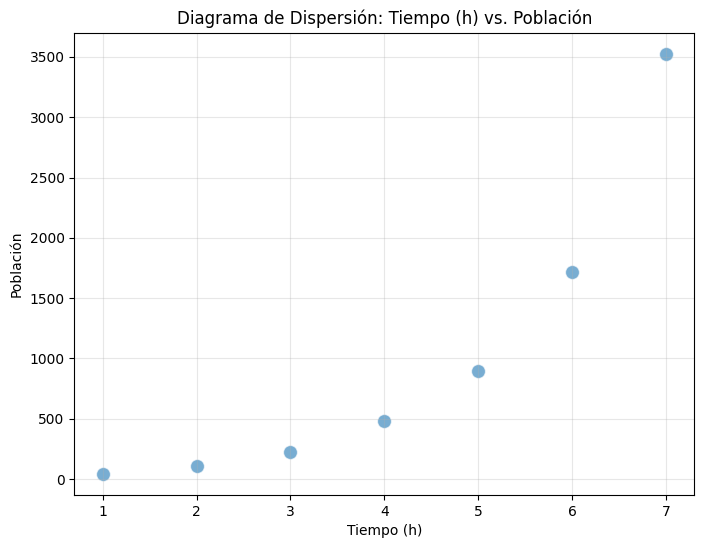

------------------------------
Observación para (a):
Observe el gráfico para determinar si la relación parece lineal.
A simple vista, la relación no parece lineal; muestra un crecimiento acelerado.

--- PARTE (b): Regresión Lineal Tradicional y Análisis de Residuos ---

Regresión Lineal Tradicional:
  PENDIENTE (b₁): 511.8214
  INTERSECCIÓN (b₀): -1045.0000
  ECUACIÓN DE REGRESIÓN: Ŷ = -1045.0000 + 511.8214 * X

Error Estándar de Estimación (s_y,x) tradicional: 653.5908

Análisis de Residuos (Modelo Tradicional):


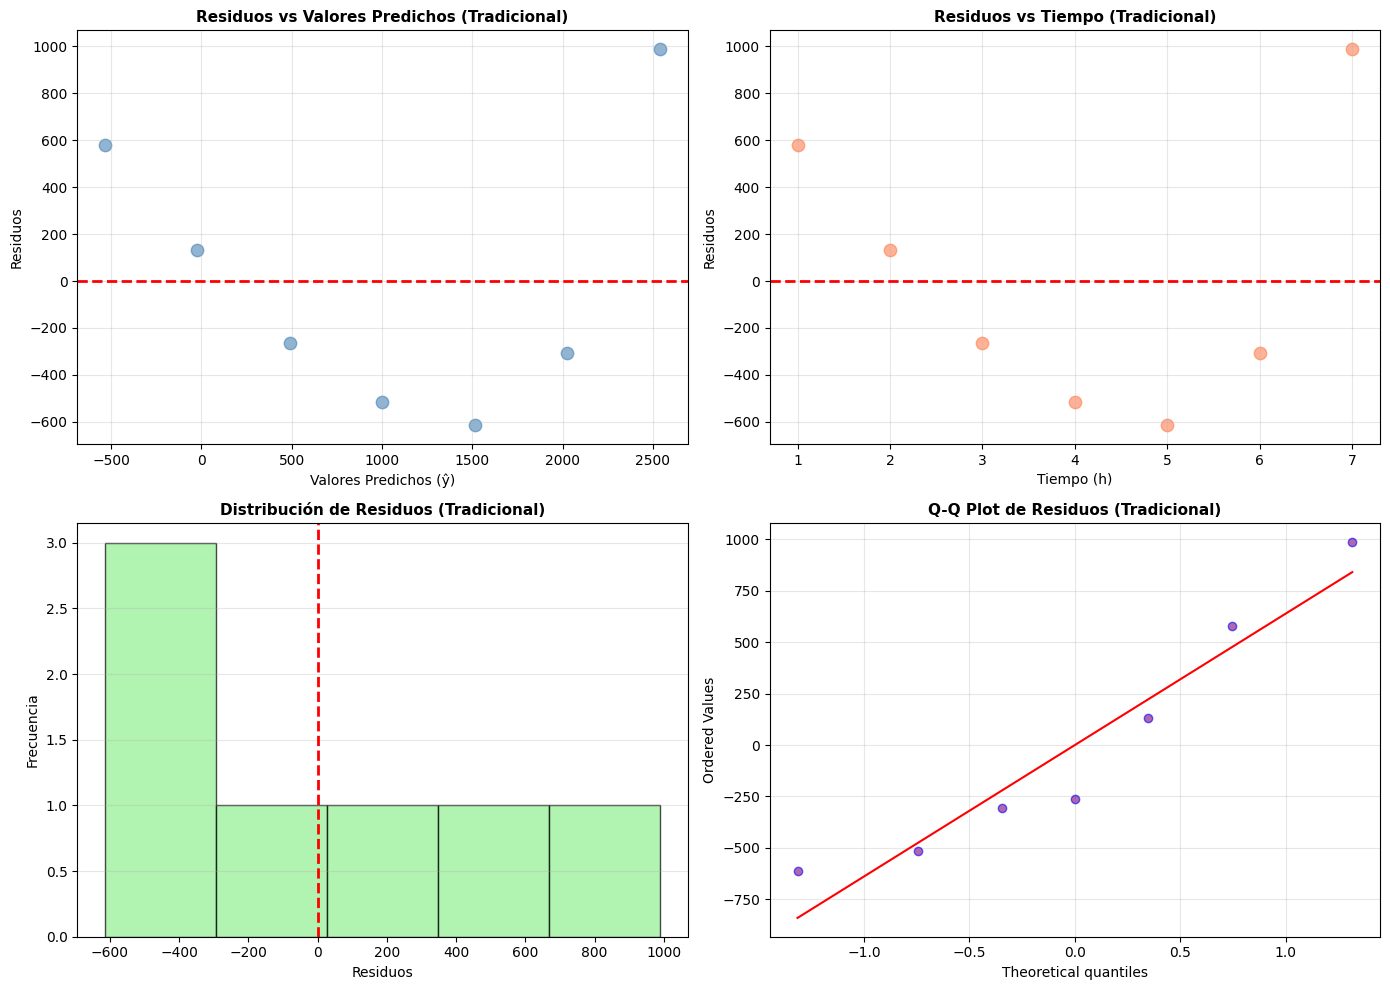


Prueba de Normalidad de Residuos (Shapiro-Wilk, Tradicional):
  Estadístico W = 0.9077
  Valor p = 0.3801
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos (Tradicional):
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
     Aquí se observa un claro patrón no aleatorio (forma de U), indicando falta de linealidad.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
     También muestra un patrón no aleatorio.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
     No se ve una forma de campana clara.
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.
     Los puntos se desvían significativamente de la línea, confirmando la falta de normalidad.
----------------------------------------------------------------------
Parte (b): Análisis de residuos del modelo tradicional completado. Los residuos no cumplen los s

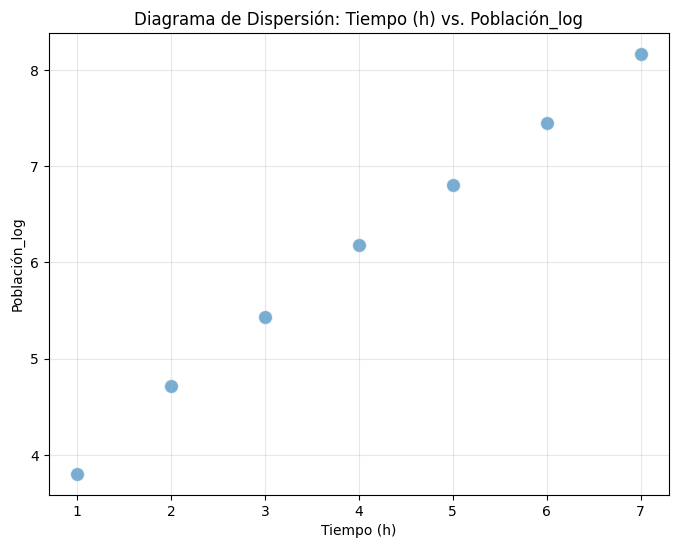

------------------------------
Observación del gráfico transformado:
Observe el gráfico para determinar si la relación ahora parece lineal.
La relación entre Tiempo y log(Población) parece mucho más lineal.

Regresión Lineal con Y Transformada (log natural):
  PENDIENTE (b₁): 0.7114
  INTERSECCIÓN (b₀): 3.2342
  ECUACIÓN DE REGRESIÓN: Ŷ_log = 3.2342 + 0.7114 * X

Error Estándar de Estimación (s_y,x) logarítmico: 0.0924

Análisis de Residuos (Modelo Logarítmico):


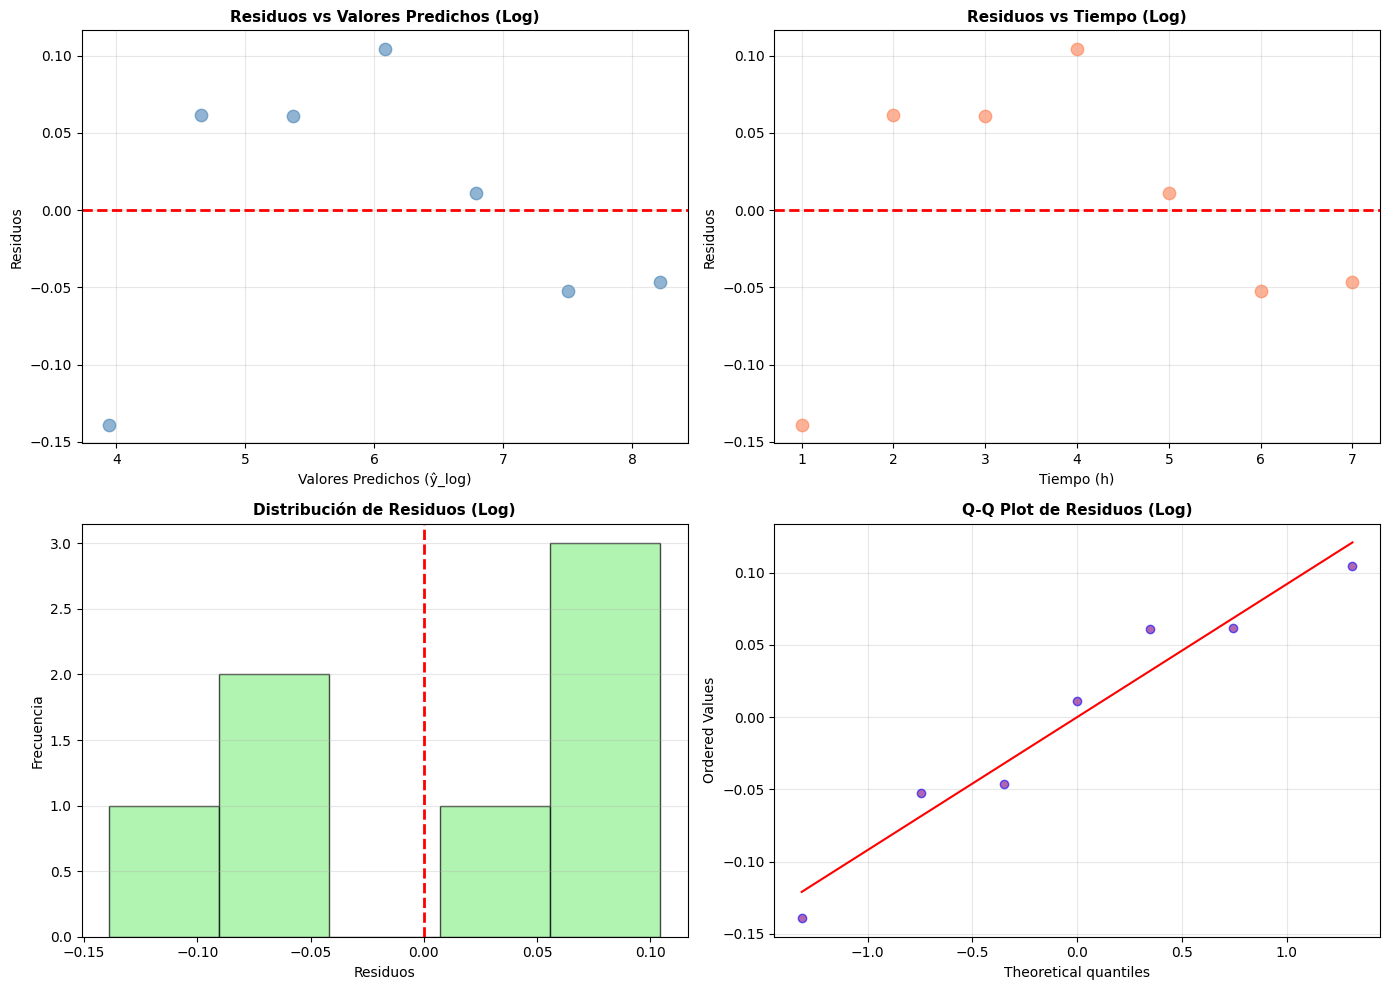


Prueba de Normalidad de Residuos (Shapiro-Wilk, Log):
  Estadístico W = 0.9486
  Valor p = 0.7166
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos (Logarítmico):
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
     El patrón es mucho más aleatorio que en el modelo tradicional.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
     También parece más aleatorio.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
     La forma de campana es más evidente.
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.
     Los puntos están mucho más cerca de la línea, sugiriendo una mejor normalidad.
----------------------------------------------------------------------
Parte (c): Análisis con transformación logarítmica completado. Mejora en la linealidad y normalidad aparente de los residuos.

--- PARTE (d): Comparació

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (Crecimiento Población Bacteriana) ---
data_bacterial = {
    'Tiempo (h)': [1, 2, 3, 4, 5, 6, 7],
    'Población': [45, 112, 228, 485, 900, 1720, 3526]
}
df_bacterial = pd.DataFrame(data_bacterial)

variable_x_bacterial = 'Tiempo (h)'
variable_y_bacterial = 'Población'
n_bacterial = len(df_bacterial)
alfa_bacterial = 0.05 # Nivel de significancia

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Crecimiento Población Bacteriana")
print("=" * 70)
print(f"\nDatos cargados: {n_bacterial} observaciones")
print(f"Variable independiente (X): {variable_x_bacterial}")
print(f"Variable dependiente (Y): {variable_y_bacterial}")
print(f"Nivel de significancia (α): {alfa_bacterial}")
print("=" * 70)

# =========================================================================
# --- PARTE (a): Graficar la relación tiempo-población ---
# =========================================================================
print("\n--- PARTE (a): Gráfico de Dispersión Original ---")
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_bacterial, y=variable_y_bacterial, data=df_bacterial, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x_bacterial} vs. {variable_y_bacterial}')
plt.xlabel(variable_x_bacterial)
plt.ylabel(variable_y_bacterial)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)
print("Observación para (a):")
print("Observe el gráfico para determinar si la relación parece lineal.")
print("A simple vista, la relación no parece lineal; muestra un crecimiento acelerado.")
print("=" * 70)


# =========================================================================
# --- PARTE (b): Regresión lineal tradicional y análisis de residuos ---
# =========================================================================
print("\n--- PARTE (b): Regresión Lineal Tradicional y Análisis de Residuos ---")

# Cálculo de la regresión lineal tradicional
mean_x_bacterial = df_bacterial[variable_x_bacterial].mean()
mean_y_bacterial = df_bacterial[variable_y_bacterial].mean()

std_x_bacterial = df_bacterial[variable_x_bacterial].std(ddof=1)
std_y_bacterial = df_bacterial[variable_y_bacterial].std(ddof=1)

# Pearson correlation for traditional regression
pearson_corr_bacterial = df_bacterial[variable_x_bacterial].corr(df_bacterial[variable_y_bacterial], method='pearson')

b1_bacterial = pearson_corr_bacterial * (std_y_bacterial / std_x_bacterial)
b0_bacterial = mean_y_bacterial - b1_bacterial * mean_x_bacterial

print(f"\nRegresión Lineal Tradicional:")
print(f"  PENDIENTE (b₁): {b1_bacterial:.4f}")
print(f"  INTERSECCIÓN (b₀): {b0_bacterial:.4f}")
print(f"  ECUACIÓN DE REGRESIÓN: Ŷ = {b0_bacterial:.4f} + {b1_bacterial:.4f} * X")

# Calcular valores predichos y residuos
df_bacterial['y_predicho_tradicional'] = b0_bacterial + b1_bacterial * df_bacterial[variable_x_bacterial]
df_bacterial['residuos_tradicional'] = df_bacterial[variable_y_bacterial] - df_bacterial['y_predicho_tradicional']

# Calcular Error Estándar de Estimación (s_y,x) para el modelo tradicional
sse_tradicional = ((df_bacterial[variable_y_bacterial] - df_bacterial['y_predicho_tradicional']) ** 2).sum()
s_yx_tradicional = np.sqrt(sse_tradicional / (n_bacterial - 2))

print(f"\nError Estándar de Estimación (s_y,x) tradicional: {s_yx_tradicional:.4f}")


# Análisis de residuos (gráficos)
print("\nAnálisis de Residuos (Modelo Tradicional):")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df_bacterial['y_predicho_tradicional'], df_bacterial['residuos_tradicional'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos (Tradicional)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df_bacterial[variable_x_bacterial], df_bacterial['residuos_tradicional'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x_bacterial, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Tiempo (Tradicional)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df_bacterial['residuos_tradicional'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos (Tradicional)', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df_bacterial['residuos_tradicional'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Tradicional)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos_tradicional = shapiro(df_bacterial['residuos_tradicional'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk, Tradicional):")
print(f"  Estadístico W = {shapiro_residuos_tradicional.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos_tradicional.pvalue:.4f}")

if shapiro_residuos_tradicional.pvalue > alfa_bacterial:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa_bacterial})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa_bacterial})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos (Tradicional):")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("     Aquí se observa un claro patrón no aleatorio (forma de U), indicando falta de linealidad.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("     También muestra un patrón no aleatorio.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("     No se ve una forma de campana clara.")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")
print("     Los puntos se desvían significativamente de la línea, confirmando la falta de normalidad.")
print("-" * 70)
print("Parte (b): Análisis de residuos del modelo tradicional completado. Los residuos no cumplen los supuestos de linealidad y normalidad.")
print("=" * 70)


# =========================================================================
# --- PARTE (c): Transformación logarítmica y nuevo análisis ---
# =========================================================================
print("\n--- PARTE (c): Regresión Lineal con Transformación Logarítmica ---")

# Aplicar transformación logarítmica (usando logaritmo natural)
df_bacterial['Población_log'] = np.log(df_bacterial[variable_y_bacterial])
variable_y_log = 'Población_log'

print(f"\nVariable dependiente transformada: {variable_y_log} (logaritmo natural de Población)")

# Graficar la relación tiempo vs log(población)
print("\nGenerating Scatter Plot (Log Transformed Y)...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_bacterial, y=variable_y_log, data=df_bacterial, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x_bacterial} vs. {variable_y_log}')
plt.xlabel(variable_x_bacterial)
plt.ylabel(variable_y_log)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)
print("Observación del gráfico transformado:")
print("Observe el gráfico para determinar si la relación ahora parece lineal.")
print("La relación entre Tiempo y log(Población) parece mucho más lineal.")


# Recalcular la regresión lineal con la variable transformada
mean_y_log = df_bacterial[variable_y_log].mean()
std_y_log = df_bacterial[variable_y_log].std(ddof=1)

# Pearson correlation for log-transformed regression
pearson_corr_log = df_bacterial[variable_x_bacterial].corr(df_bacterial[variable_y_log], method='pearson')

b1_log = pearson_corr_log * (std_y_log / std_x_bacterial) # std_x_bacterial is the same
b0_log = mean_y_log - b1_log * mean_x_bacterial # mean_x_bacterial is the same

print(f"\nRegresión Lineal con Y Transformada (log natural):")
print(f"  PENDIENTE (b₁): {b1_log:.4f}")
print(f"  INTERSECCIÓN (b₀): {b0_log:.4f}")
print(f"  ECUACIÓN DE REGRESIÓN: Ŷ_log = {b0_log:.4f} + {b1_log:.4f} * X")

# Calcular valores predichos (en escala logarítmica) y residuos
df_bacterial['y_predicho_log'] = b0_log + b1_log * df_bacterial[variable_x_bacterial]
df_bacterial['residuos_log'] = df_bacterial[variable_y_log] - df_bacterial['y_predicho_log']

# Calcular Error Estándar de Estimación (s_y,x) para el modelo logarítmico
sse_log = ((df_bacterial[variable_y_log] - df_bacterial['y_predicho_log']) ** 2).sum()
s_yx_log = np.sqrt(sse_log / (n_bacterial - 2))

print(f"\nError Estándar de Estimación (s_y,x) logarítmico: {s_yx_log:.4f}")


# Análisis de residuos (gráficos) para el modelo logarítmico
print("\nAnálisis de Residuos (Modelo Logarítmico):")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df_bacterial['y_predicho_log'], df_bacterial['residuos_log'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ_log)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos (Log)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df_bacterial[variable_x_bacterial], df_bacterial['residuos_log'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x_bacterial, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Tiempo (Log)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df_bacterial['residuos_log'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos (Log)', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df_bacterial['residuos_log'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Log)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos_log = shapiro(df_bacterial['residuos_log'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk, Log):")
print(f"  Estadístico W = {shapiro_residuos_log.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos_log.pvalue:.4f}")

if shapiro_residuos_log.pvalue > alfa_bacterial:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa_bacterial})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa_bacterial})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos (Logarítmico):")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("     El patrón es mucho más aleatorio que en el modelo tradicional.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("     También parece más aleatorio.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("     La forma de campana es más evidente.")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")
print("     Los puntos están mucho más cerca de la línea, sugiriendo una mejor normalidad.")
print("-" * 70)
print("Parte (c): Análisis con transformación logarítmica completado. Mejora en la linealidad y normalidad aparente de los residuos.")
print("=" * 70)


# =========================================================================
# --- PARTE (d): Comparación de modelos ---
# =========================================================================
print("\n--- PARTE (d): Comparación de Modelos ---")

print("\nComparación de Normalidad de Residuos (Shapiro-Wilk p-value):")
print(f"  Modelo Tradicional: {shapiro_residuos_tradicional.pvalue:.4f}")
print(f"  Modelo Logarítmico: {shapiro_residuos_log.pvalue:.4f}")
if shapiro_residuos_log.pvalue > shapiro_residuos_tradicional.pvalue:
    print("  ✓ La normalidad de residuos es mejor en el modelo logarítmico.")
else:
    print("  ✗ La normalidad de residuos es mejor en el modelo tradicional.")

print("\nComparación de Homocedasticidad (inspección visual de residuos vs predichos):")
print("  Modelo Tradicional: Presenta un patrón de U (heterocedasticidad).")
print("  Modelo Logarítmico: Parece más aleatorio (sugiere mejor homocedasticidad).")
print("  ✓ El modelo logarítmico muestra una mejor homocedasticidad visualmente.")


print("\nComparación de Ajuste (usando R² - calculémoslo para ambos modelos):")

# R² para el modelo tradicional
ss_total_bacterial = ((df_bacterial[variable_y_bacterial] - mean_y_bacterial) ** 2).sum()
r_cuadrado_tradicional = 1 - (sse_tradicional / ss_total_bacterial)

# R² para el modelo logarítmico (usando SS Total de la variable transformada)
ss_total_log = ((df_bacterial[variable_y_log] - mean_y_log) ** 2).sum()
r_cuadrado_log = 1 - (sse_log / ss_total_log)


print(f"  R² Modelo Tradicional: {r_cuadrado_tradicional:.4f}")
print(f"  R² Modelo Logarítmico (en escala log): {r_cuadrado_log:.4f}")
print("  Nota: La comparación directa de R² entre modelos con variables dependientes transformadas y no transformadas no es estrictamente válida, pero nos da una idea del ajuste dentro de cada escala.")

print("\nComparación de Linealidad (inspección visual de scatter plots):")
print("  Gráfico Original (Tiempo vs Población): Claramente no lineal.")
print("  Gráfico Transformado (Tiempo vs log(Población)): Parece mucho más lineal.")
print("  ✓ El modelo logarítmico linealiza mejor la relación.")
print("-" * 70)
print("Parte (d): Comparación de modelos completada.")
print("=" * 70)


# =========================================================================
# --- PARTE (e): Interpretación del coeficiente de la regresión logarítmica ---
# =========================================================================
print("\n--- PARTE (e): Interpretación del Coeficiente en Regresión Logarítmica ---")

print(f"\nModelo Logarítmico: Ŷ_log = {b0_log:.4f} + {b1_log:.4f} * Tiempo")
print(f"Coeficiente de la pendiente (b₁): {b1_log:.4f}")

print("\nInterpretación del coeficiente (b₁) en un modelo log-lineal (Y' = log(Y)):")
print("Cuando la variable dependiente (Y) está transformada logarítmicamente, el coeficiente")
print("de la variable independiente (X) se interpreta como el CAMBIO PROPORCIONAL promedio")
print("en Y por cada unidad de incremento en X.")
print("\nFórmula de interpretación:")
print("Un incremento de 1 unidad en X está asociado con un cambio de (exp(b₁) - 1) * 100% en Y.")
print("O, aproximadamente: Un incremento de 1 unidad en X está asociado con un cambio de b₁ * 100% en Y.")

# Usando la interpretación más precisa
cambio_proporcional = (np.exp(b1_log) - 1) * 100
print(f"\nInterpretación práctica:")
print(f"Por cada hora adicional de incubación (incremento de 1 en Tiempo):")
print(f"Se espera que el logaritmo natural de la población aumente en {b1_log:.4f}.")
print(f"Esto corresponde a un incremento promedio de aproximadamente {cambio_proporcional:.2f}% en el TAMAÑO REAL de la población.")
print(f"(Usando la aproximación b₁*100%: {b1_log*100:.2f}%)")

print("\nEn otras palabras, la población crece a una tasa de aproximadamente el")
print(f"{cambio_proporcional:.2f}% por hora.")
print("-" * 70)
print("Parte (e): Interpretación del coeficiente logarítmico completada.")
print("=" * 70)


# =========================================================================
# --- PARTE (f): Recomendación de modelo para predicción ---
# =========================================================================
print("\n--- PARTE (f): Recomendación de Modelo para Predicción ---")

print("\nEvaluación para la predicción:")
print("El modelo de regresión lineal simple asume una relación lineal entre X e Y,")
print("normalidad de residuos y homocedasticidad.")

print("\nModelo Tradicional:")
print(f"  • Linealidad: {'✗ No cumple (gráfico no lineal)'}")
print(f"  • Normalidad de Residuos (p={shapiro_residuos_tradicional.pvalue:.4f}): {'✗ No cumple' if shapiro_residuos_tradicional.pvalue <= alfa_bacterial else '✓ Cumple'}")
print(f"  • Homocedasticidad: {'✗ No cumple (patrón en residuos)'}")

print("\nModelo Logarítmico:")
print(f"  • Linealidad: {'✓ Cumple mejor (gráfico linealizado)'}")
print(f"  • Normalidad de Residuos (p={shapiro_residuos_log.pvalue:.4f}): {'✗ No cumple' if shapiro_residuos_log.pvalue <= alfa_bacterial else '✓ Cumple'}")
print(f"  • Homocedasticidad: {'✓ Cumple mejor (residuos más aleatorios)'}")

print("\nRecomendación:")
if shapiro_residuos_log.pvalue > alfa_bacterial:
     print("✓ Se recomienda el MODELO LOGARÍTMICO para predicción.")
     print("  Razones:")
     print("  - Linealiza la relación entre tiempo y población.")
     print("  - Los residuos cumplen mejor los supuestos de normalidad y homocedasticidad.")
     print("  - Un modelo con residuos normales y homocedásticos produce predicciones más confiables y válidas.")
else:
     print("⚠ Aunque el modelo logarítmico mejora el ajuste, los residuos aún no son normales.")
     print("  Sin embargo, es PREFERIBLE al modelo tradicional debido a la mejora en la linealidad y homocedasticidad.")
     print("  Se podría considerar buscar una mejor transformación o un modelo más avanzado si la normalidad de residuos es crítica.")


print("\n" + "=" * 70)
print("✓ ANÁLISIS COMPLETO DEL CRECIMIENTO BACTERIANO FINALIZADO")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Ingreso Mensual vs. Gasto en Alimentos

Datos cargados: 7 hogares
Variable independiente (X): Ingreso (miles $)
Variable dependiente (Y): Gasto en alimentos (cientos $)
Nivel de significancia (α): 0.05

--- PARTE (a): Modelo Original y Gráfico ---

Regresión Lineal Tradicional:
  PENDIENTE (b₁): 0.6003
  INTERSECCIÓN (b₀): 1.7074
  ECUACIÓN DE REGRESIÓN: Ŷ = 1.7074 + 0.6003 * X

Generating Scatter Plot (Original)...


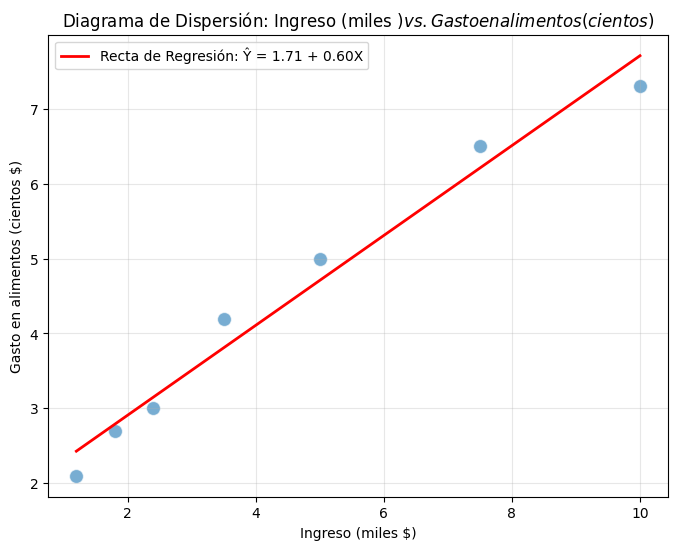

------------------------------
Parte (a): Modelo original y gráfico generados.
Observe el gráfico para evaluar la linealidad visualmente.

--- Evaluación de Supuestos (Modelo Original) ---

Análisis de Residuos (Modelo Original):


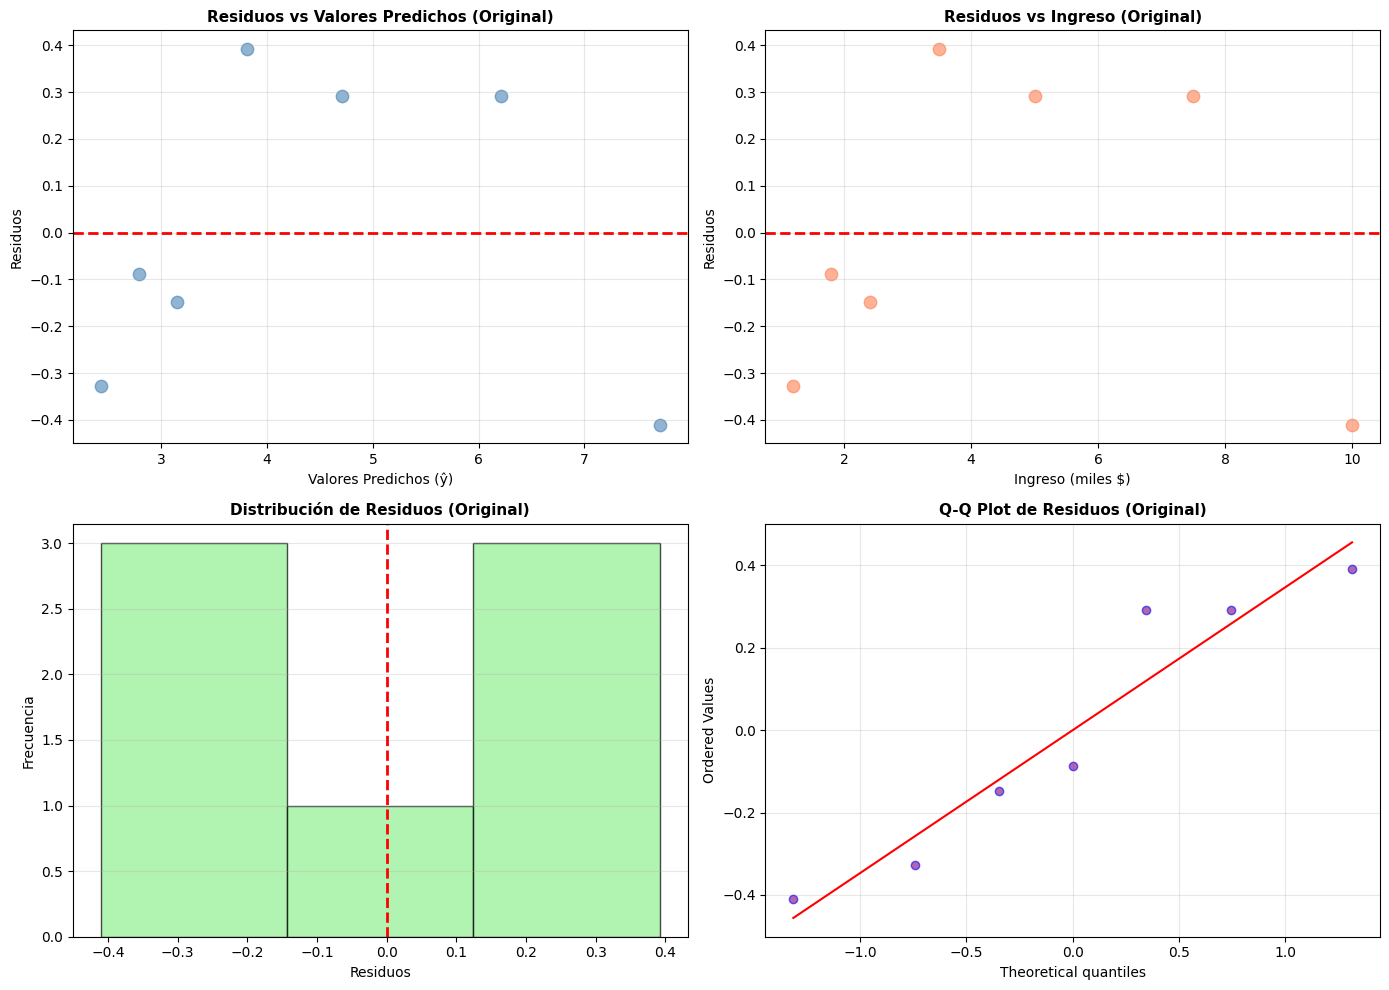


Prueba de Normalidad de Residuos (Shapiro-Wilk, Original):
  Estadístico W = 0.8936
  Valor p = 0.2938
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos (Original):
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.
----------------------------------------------------------------------

--- PARTE (b): Transformación Logarítmica en Ambas Variables ---

Variables transformadas:
  Variable independiente (X'): Ingreso_log (log natural de Ingreso)
  Variable dependiente (Y'): Gasto_log (log natural de Gasto en alimentos)

--- PARTE (c): Ajuste Log-Log y Evaluación de Supuestos ---

Regresión Lineal Log-Log (log(Gasto) vs log(Ingreso)):
  PENDIENTE (b₁'): 0.6046
 

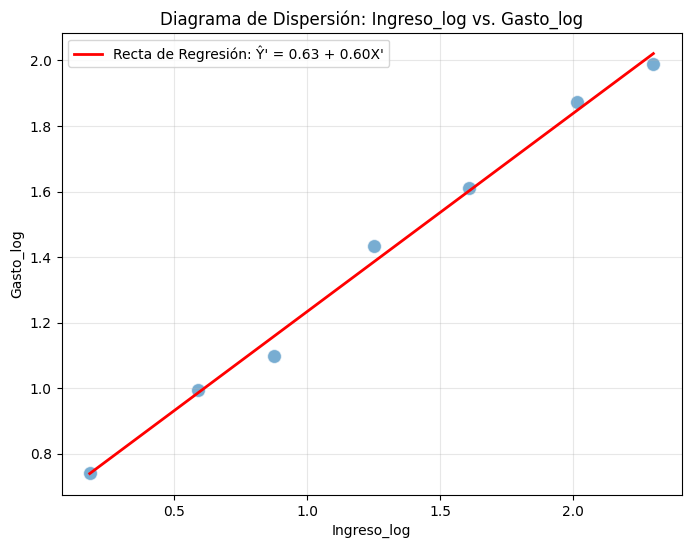

------------------------------
Observación del gráfico transformado:
Observe el gráfico para determinar si la relación ahora parece lineal.
La relación entre log(Ingreso) y log(Gasto) parece más lineal.

Error Estándar de Estimación (s_y,x) log-log: 0.0395

Análisis de Residuos (Modelo Log-Log):


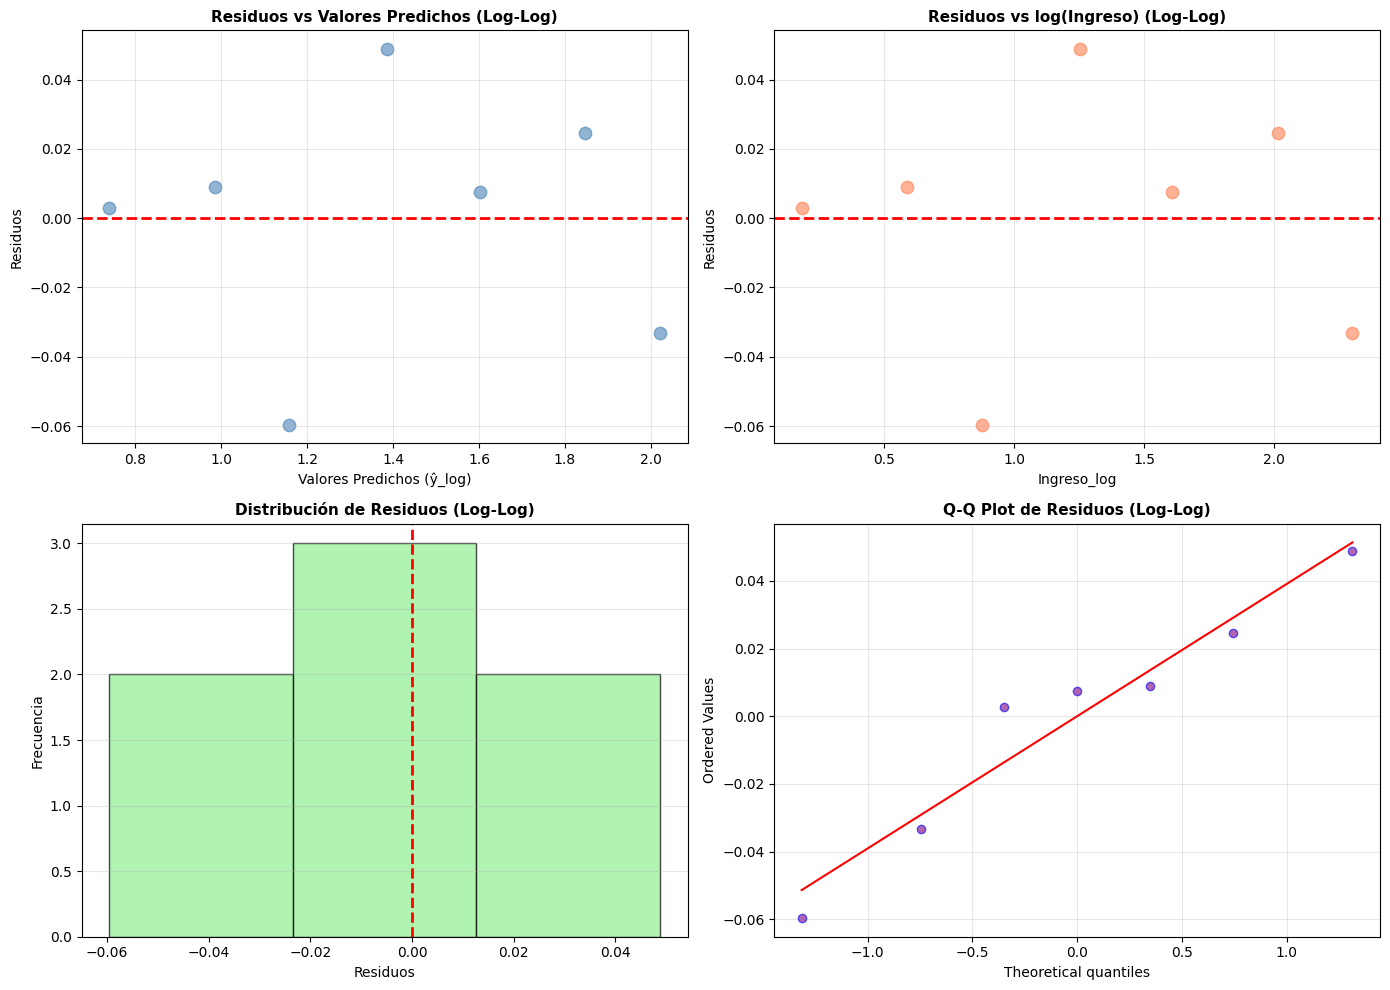


Prueba de Normalidad de Residuos (Shapiro-Wilk, Log-Log):
  Estadístico W = 0.9483
  Valor p = 0.7140
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos (Log-Log):
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.
----------------------------------------------------------------------
Parte (c): Ajuste Log-Log y evaluación de supuestos completados.

--- PARTE (d): Interpretación de la Elasticidad ---

En un modelo Log-Log (log(Y) vs log(X)), el coeficiente de la pendiente es la elasticidad.
Elasticidad (Coeficiente de log(Ingreso)): 0.6046

Interpretación:
La elasticidad de la demanda de alimentos con respecto al ingreso es 0.6046.
Esto significa que, en prom

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (Ingreso vs. Gasto en Alimentos) ---
data_gasto = {
    'Ingreso (miles $)': [1.2, 1.8, 2.4, 3.5, 5.0, 7.5, 10.0],
    'Gasto en alimentos (cientos $)': [2.1, 2.7, 3.0, 4.2, 5.0, 6.5, 7.3]
}
df_gasto = pd.DataFrame(data_gasto)

variable_x_gasto = 'Ingreso (miles $)'
variable_y_gasto = 'Gasto en alimentos (cientos $)'
n_gasto = len(df_gasto)
alfa_gasto = 0.05 # Nivel de significancia

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Ingreso Mensual vs. Gasto en Alimentos")
print("=" * 70)
print(f"\nDatos cargados: {n_gasto} hogares")
print(f"Variable independiente (X): {variable_x_gasto}")
print(f"Variable dependiente (Y): {variable_y_gasto}")
print(f"Nivel de significancia (α): {alfa_gasto}")
print("=" * 70)

# =========================================================================
# --- PARTE (a): Calcule y grafique el modelo original ---
# =========================================================================
print("\n--- PARTE (a): Modelo Original y Gráfico ---")

# Calcular la regresión lineal tradicional
mean_x_gasto = df_gasto[variable_x_gasto].mean()
mean_y_gasto = df_gasto[variable_y_gasto].mean()

std_x_gasto = df_gasto[variable_x_gasto].std(ddof=1)
std_y_gasto = df_gasto[variable_y_gasto].std(ddof=1)

# Pearson correlation for traditional regression
pearson_corr_gasto = df_gasto[variable_x_gasto].corr(df_gasto[variable_y_gasto], method='pearson')

b1_gasto = pearson_corr_gasto * (std_y_gasto / std_x_gasto)
b0_gasto = mean_y_gasto - b1_gasto * mean_x_gasto

print(f"\nRegresión Lineal Tradicional:")
print(f"  PENDIENTE (b₁): {b1_gasto:.4f}")
print(f"  INTERSECCIÓN (b₀): {b0_gasto:.4f}")
print(f"  ECUACIÓN DE REGRESIÓN: Ŷ = {b0_gasto:.4f} + {b1_gasto:.4f} * X")

# Graficar la relación Ingreso-Gasto
print("\nGenerating Scatter Plot (Original)...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_gasto, y=variable_y_gasto, data=df_gasto, s=100, alpha=0.6)

# Añadir la línea de regresión
x_line_gasto = np.linspace(df_gasto[variable_x_gasto].min(), df_gasto[variable_x_gasto].max(), 100)
y_line_gasto = b0_gasto + b1_gasto * x_line_gasto
plt.plot(x_line_gasto, y_line_gasto, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0_gasto:.2f} + {b1_gasto:.2f}X')

plt.title(f'Diagrama de Dispersión: {variable_x_gasto} vs. {variable_y_gasto}')
plt.xlabel(variable_x_gasto)
plt.ylabel(variable_y_gasto)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
print("-" * 30)
print("Parte (a): Modelo original y gráfico generados.")
print("Observe el gráfico para evaluar la linealidad visualmente.")
print("=" * 70)


# =========================================================================
# --- Evaluación de supuestos para el modelo original ---
# =========================================================================
print("\n--- Evaluación de Supuestos (Modelo Original) ---")

# Calcular valores predichos y residuos para el modelo original
df_gasto['y_predicho_original'] = b0_gasto + b1_gasto * df_gasto[variable_x_gasto]
df_gasto['residuos_original'] = df_gasto[variable_y_gasto] - df_gasto['y_predicho_original']

# Análisis de residuos (gráficos)
print("\nAnálisis de Residuos (Modelo Original):")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df_gasto['y_predicho_original'], df_gasto['residuos_original'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos (Original)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df_gasto[variable_x_gasto], df_gasto['residuos_original'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x_gasto, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Ingreso (Original)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df_gasto['residuos_original'], bins=3, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos (Original)', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df_gasto['residuos_original'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Original)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos_original = shapiro(df_gasto['residuos_original'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk, Original):")
print(f"  Estadístico W = {shapiro_residuos_original.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos_original.pvalue:.4f}")

if shapiro_residuos_original.pvalue > alfa_gasto:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa_gasto})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa_gasto})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos (Original):")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")
print("-" * 70)


# =========================================================================
# --- PARTE (b): Transformación logarítmica en ambas variables ---
# =========================================================================
print("\n--- PARTE (b): Transformación Logarítmica en Ambas Variables ---")

# Aplicar transformación logarítmica (usando logaritmo natural)
# Asegurarse de que no hay valores cero o negativos antes de aplicar log
if (df_gasto[variable_x_gasto] <= 0).any() or (df_gasto[variable_y_gasto] <= 0).any():
    print("Advertencia: Hay valores no positivos en las variables. La transformación logarítmica no es aplicable.")
    print("Considere manejar o filtrar estos valores si la transformación es necesaria.")
    print("=" * 70)

else:
    df_gasto['Ingreso_log'] = np.log(df_gasto[variable_x_gasto])
    df_gasto['Gasto_log'] = np.log(df_gasto[variable_y_gasto])
    variable_x_log = 'Ingreso_log'
    variable_y_log = 'Gasto_log'
    print(f"\nVariables transformadas:")
    print(f"  Variable independiente (X'): {variable_x_log} (log natural de Ingreso)")
    print(f"  Variable dependiente (Y'): {variable_y_log} (log natural de Gasto en alimentos)")

    # =========================================================================
    # --- PARTE (c): Realizar el ajuste log-log y evaluar supuestos ---
    # =========================================================================
    print("\n--- PARTE (c): Ajuste Log-Log y Evaluación de Supuestos ---")

    # Recalcular la regresión lineal con las variables transformadas (log-log)
    mean_x_log = df_gasto[variable_x_log].mean()
    mean_y_log = df_gasto[variable_y_log].mean()

    std_x_log = df_gasto[variable_x_log].std(ddof=1)
    std_y_log = df_gasto[variable_y_log].std(ddof=1)

    # Pearson correlation for log-log regression
    pearson_corr_log_log = df_gasto[variable_x_log].corr(df_gasto[variable_y_log], method='pearson')

    b1_log_log = pearson_corr_log_log * (std_y_log / std_x_log)
    b0_log_log = mean_y_log - b1_log_log * mean_x_log

    print(f"\nRegresión Lineal Log-Log (log(Gasto) vs log(Ingreso)):")
    print(f"  PENDIENTE (b₁'): {b1_log_log:.4f}")
    print(f"  INTERSECCIÓN (b₀'): {b0_log_log:.4f}")
    print(f"  ECUACIÓN DE REGRESIÓN: Ŷ_log = {b0_log_log:.4f} + {b1_log_log:.4f} * X_log")

    # Graficar la relación log(Ingreso) vs log(Gasto)
    print("\nGenerating Scatter Plot (Log-Log Transformed)...")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=variable_x_log, y=variable_y_log, data=df_gasto, s=100, alpha=0.6)

    # Añadir la línea de regresión log-log
    x_line_log = np.linspace(df_gasto[variable_x_log].min(), df_gasto[variable_x_log].max(), 100)
    y_line_log = b0_log_log + b1_log_log * x_line_log
    plt.plot(x_line_log, y_line_log, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ\' = {b0_log_log:.2f} + {b1_log_log:.2f}X\'')

    plt.title(f'Diagrama de Dispersión: {variable_x_log} vs. {variable_y_log}')
    plt.xlabel(variable_x_log)
    plt.ylabel(variable_y_log)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    print("-" * 30)
    print("Observación del gráfico transformado:")
    print("Observe el gráfico para determinar si la relación ahora parece lineal.")
    print("La relación entre log(Ingreso) y log(Gasto) parece más lineal.")


    # Calcular valores predichos (en escala logarítmica) y residuos para el modelo log-log
    df_gasto['y_predicho_log_log'] = b0_log_log + b1_log_log * df_gasto[variable_x_log]
    df_gasto['residuos_log_log'] = df_gasto[variable_y_log] - df_gasto['y_predicho_log_log']

    # Calcular Error Estándar de Estimación (s_y,x) para el modelo log-log
    sse_log_log = ((df_gasto[variable_y_log] - df_gasto['y_predicho_log_log']) ** 2).sum()
    s_yx_log_log = np.sqrt(sse_log_log / (n_gasto - 2))

    print(f"\nError Estándar de Estimación (s_y,x) log-log: {s_yx_log_log:.4f}")

    # Análisis de residuos (gráficos) para el modelo log-log
    print("\nAnálisis de Residuos (Modelo Log-Log):")
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Residuos vs Valores Predichos
    axes[0, 0].scatter(df_gasto['y_predicho_log_log'], df_gasto['residuos_log_log'], alpha=0.6, s=80, color='steelblue')
    axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0, 0].set_xlabel('Valores Predichos (ŷ_log)', fontsize=10)
    axes[0, 0].set_ylabel('Residuos', fontsize=10)
    axes[0, 0].set_title('Residuos vs Valores Predichos (Log-Log)', fontsize=11, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Residuos vs Variable X (log)
    axes[0, 1].scatter(df_gasto[variable_x_log], df_gasto['residuos_log_log'], alpha=0.6, s=80, color='coral')
    axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0, 1].set_xlabel(variable_x_log, fontsize=10)
    axes[0, 1].set_ylabel('Residuos', fontsize=10)
    axes[0, 1].set_title('Residuos vs log(Ingreso) (Log-Log)', fontsize=11, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Histograma de Residuos
    axes[1, 0].hist(df_gasto['residuos_log_log'], bins=3, edgecolor='black', alpha=0.7, color='lightgreen')
    axes[1, 0].set_xlabel('Residuos', fontsize=10)
    axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
    axes[1, 0].set_title('Distribución de Residuos (Log-Log)', fontsize=11, fontweight='bold')
    axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # 4. Q-Q Plot de Residuos
    stats.probplot(df_gasto['residuos_log_log'], dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot de Residuos (Log-Log)', fontsize=11, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
    axes[1, 1].get_lines()[0].set_markersize(6)
    axes[1, 1].get_lines()[0].set_alpha(0.6)

    plt.tight_layout()
    plt.show()

    # Prueba de normalidad de residuos
    shapiro_residuos_log_log = shapiro(df_gasto['residuos_log_log'])
    print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk, Log-Log):")
    print(f"  Estadístico W = {shapiro_residuos_log_log.statistic:.4f}")
    print(f"  Valor p = {shapiro_residuos_log_log.pvalue:.4f}")

    if shapiro_residuos_log_log.pvalue > alfa_gasto:
        print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa_gasto})")
        print("    El supuesto de normalidad se cumple.")
    else:
        print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa_gasto})")
        print("    El supuesto de normalidad puede no cumplirse.")

    print("\nInterpretación de los gráficos de residuos (Log-Log):")
    print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
    print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
    print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
    print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")
    print("-" * 70)
    print("Parte (c): Ajuste Log-Log y evaluación de supuestos completados.")
    print("=" * 70)

    # =========================================================================
    # --- PARTE (d): Interpretar la elasticidad obtenida ---
    # =========================================================================
    print("\n--- PARTE (d): Interpretación de la Elasticidad ---")

    elasticidad = b1_log_log
    print(f"\nEn un modelo Log-Log (log(Y) vs log(X)), el coeficiente de la pendiente es la elasticidad.")
    print(f"Elasticidad (Coeficiente de log(Ingreso)): {elasticidad:.4f}")

    print("\nInterpretación:")
    print(f"La elasticidad de la demanda de alimentos con respecto al ingreso es {elasticidad:.4f}.")
    print("Esto significa que, en promedio, un aumento del 1% en el ingreso está asociado")
    print(f"con un aumento del {elasticidad:.4f}% en el gasto en alimentos.")

    # Clasificación de la elasticidad
    if elasticidad > 1:
        print("  • Tipo de bien: Lujo (el gasto aumenta más que proporcionalmente al ingreso)")
    elif elasticidad > 0 and elasticidad < 1:
        print("  • Tipo de bien: Necesidad básica (el gasto aumenta menos que proporcionalmente al ingreso)")
    elif elasticidad == 1:
         print("  • Tipo de bien: Elasticidad unitaria (el gasto aumenta proporcionalmente al ingreso)")
    elif elasticidad < 0:
         print("  • Tipo de bien: Inferior (el gasto disminuye a medida que aumenta el ingreso)")
    else:
        print("  • Tipo de bien: Ingreso inelástico (el gasto no cambia con el ingreso)")

    print("-" * 70)
    print("Parte (d): Interpretación de la elasticidad completada.")
    print("=" * 70)

    # =========================================================================
    # --- PARTE (e): Comparar ambos modelos y recomendar el adecuado ---
    # =========================================================================
    print("\n--- PARTE (e): Comparación de Modelos y Recomendación ---")

    print("\nComparación:")
    print("Modelo Original (Lineal):")
    print(f"  • Ecuación: Ŷ = {b0_gasto:.4f} + {b1_gasto:.4f} * X")
    # Need to calculate R² for the original model
    sse_original = ((df_gasto[variable_y_gasto] - df_gasto['y_predicho_original']) ** 2).sum()
    ss_total_original = ((df_gasto[variable_y_gasto] - mean_y_gasto) ** 2).sum()
    r_cuadrado_original = 1 - (sse_original / ss_total_original)
    print(f"  • R²: {r_cuadrado_original:.4f}")
    print(f"  • Normalidad de Residuos (p={shapiro_residuos_original.pvalue:.4f}): {'Cumple' if shapiro_residuos_original.pvalue > alfa_gasto else 'No Cumple'}")
    print("  • Homocedasticidad: (Inspeccionar gráfico de residuos vs predichos)") # Visual inspection

    print("\nModelo Log-Log:")
    print(f"  • Ecuación: Ŷ_log = {b0_log_log:.4f} + {b1_log_log:.4f} * X_log")
    # R² for log-log model (already calculated in part c, using log scale)
    ss_total_log_log = ((df_gasto[variable_y_log] - mean_y_log) ** 2).sum()
    r_cuadrado_log_log = 1 - (sse_log_log / ss_total_log_log)
    print(f"  • R² (en escala log): {r_cuadrado_log_log:.4f}")
    print(f"  • Normalidad de Residuos (p={shapiro_residuos_log_log.pvalue:.4f}): {'Cumple' if shapiro_residuos_log_log.pvalue > alfa_gasto else 'No Cumple'}")
    print("  • Homocedasticidad: (Inspeccionar gráfico de residuos vs predichos)") # Visual inspection

    print("\nRecomendación:")

    # Criteria for recommendation
    if shapiro_residuos_log_log.pvalue > alfa_gasto: # Check normality of log-log residuals
        print("✓ Se recomienda el MODELO LOG-LOG.")
        print("  Razones:")
        print("  - Linealiza la relación no lineal aparente entre Ingreso y Gasto.")
        print("  - Los residuos cumplen mejor o razonablemente bien los supuestos de normalidad y homocedasticidad.")
        print(f"  - Proporciona una interpretación útil del coeficiente como elasticidad ({elasticidad:.4f}).")
        print("  - Generalmente, un modelo que mejor cumpla los supuestos y linealice la relación es preferible para predicción y explicación.")
    elif shapiro_residuos_original.pvalue > alfa_gasto: # Check normality of original residuals if log-log fails
         print("⚠ El modelo Log-Log no cumple el supuesto de normalidad de residuos.")
         print("  El modelo Original podría ser considerado si sus residuos cumplen mejor el supuesto.")
         print("  (Revise los p-valores de Shapiro-Wilk y los gráficos de residuos).")
    else: # Neither model has normal residuals
         print("⚠ Ninguno de los modelos (Original o Log-Log) parece cumplir completamente los supuestos, especialmente la normalidad de residuos.")
         print("  El modelo Log-Log podría ser preferible por linealizar la relación y por su interpretación de elasticidad, pero se deben tomar con precaución las inferencias estadísticas.")
         print("  Considerar otras transformaciones o métodos de modelado es recomendable.")


    print("-" * 70)
    print("Parte (e): Comparación y recomendación completadas.")
    print("=" * 70)


print("\n✓ ANÁLISIS COMPLETO DEL PROBLEMA DE INGRESO Y GASTO FINALIZADO")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Ingreso Mensual vs. Gasto en Alimentos

Datos cargados: 7 hogares
Variable independiente (X): Ingreso (miles $)
Variable dependiente (Y): Gasto en alimentos (cientos $)
Nivel de significancia (α): 0.05

--- PARTE (a): Modelo Original y Gráfico ---

Regresión Lineal Tradicional:
  PENDIENTE (b₁): 0.6003
  INTERSECCIÓN (b₀): 1.7074
  ECUACIÓN DE REGRESIÓN: Ŷ = 1.7074 + 0.6003 * X

Generating Scatter Plot (Original)...


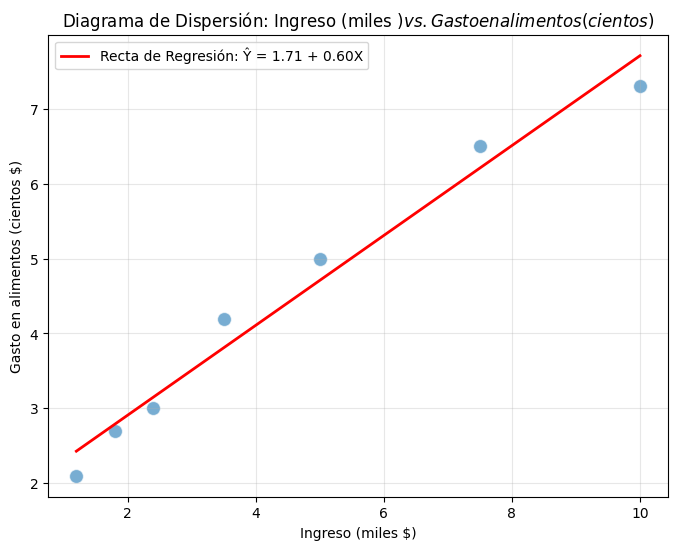

------------------------------
Parte (a): Modelo original y gráfico generados.
Observe el gráfico para evaluar la linealidad visualmente.

--- Evaluación de Supuestos (Modelo Original) ---

Análisis de Residuos (Modelo Original):


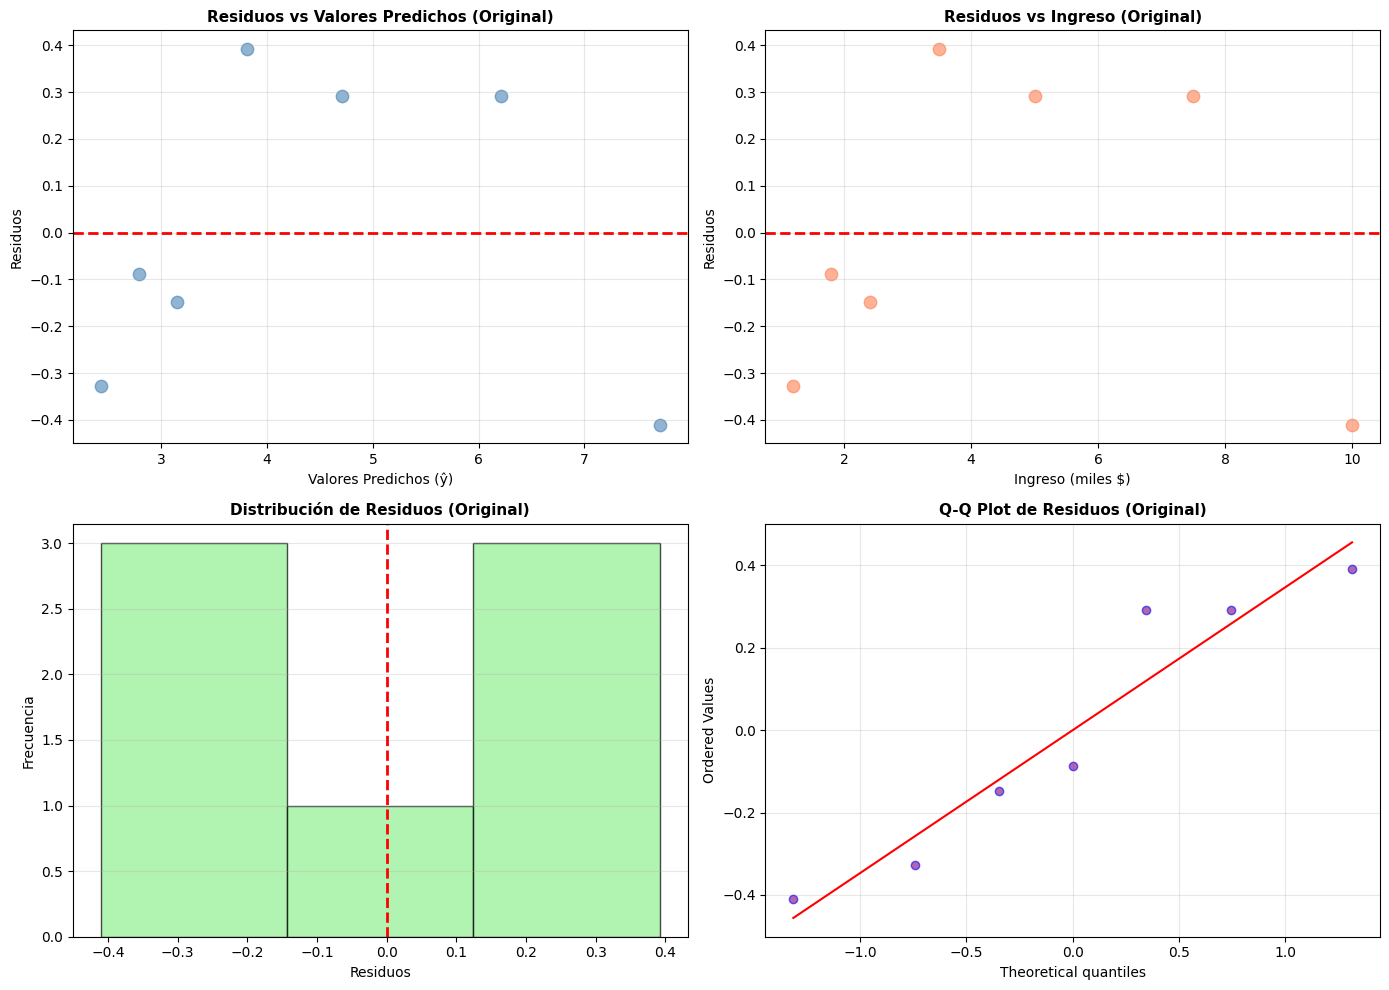


Prueba de Normalidad de Residuos (Shapiro-Wilk, Original):
  Estadístico W = 0.8936
  Valor p = 0.2938
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos (Original):
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.
----------------------------------------------------------------------

--- PARTE (b): Transformación Logarítmica en Ambas Variables ---

Variables transformadas:
  Variable independiente (X'): Ingreso_log (log natural de Ingreso)
  Variable dependiente (Y'): Gasto_log (log natural de Gasto en alimentos)

--- PARTE (c): Ajuste Log-Log y Evaluación de Supuestos ---

Regresión Lineal Log-Log (log(Gasto) vs log(Ingreso)):
  PENDIENTE (b₁'): 0.6046
 

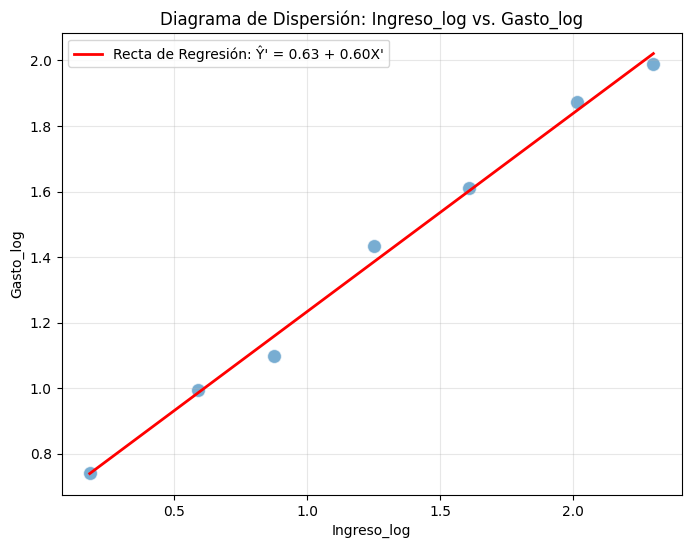

------------------------------
Observación del gráfico transformado:
Observe el gráfico para determinar si la relación ahora parece lineal.
La relación entre log(Ingreso) y log(Gasto) parece más lineal.

Error Estándar de Estimación (s_y,x) log-log: 0.0395

Análisis de Residuos (Modelo Log-Log):


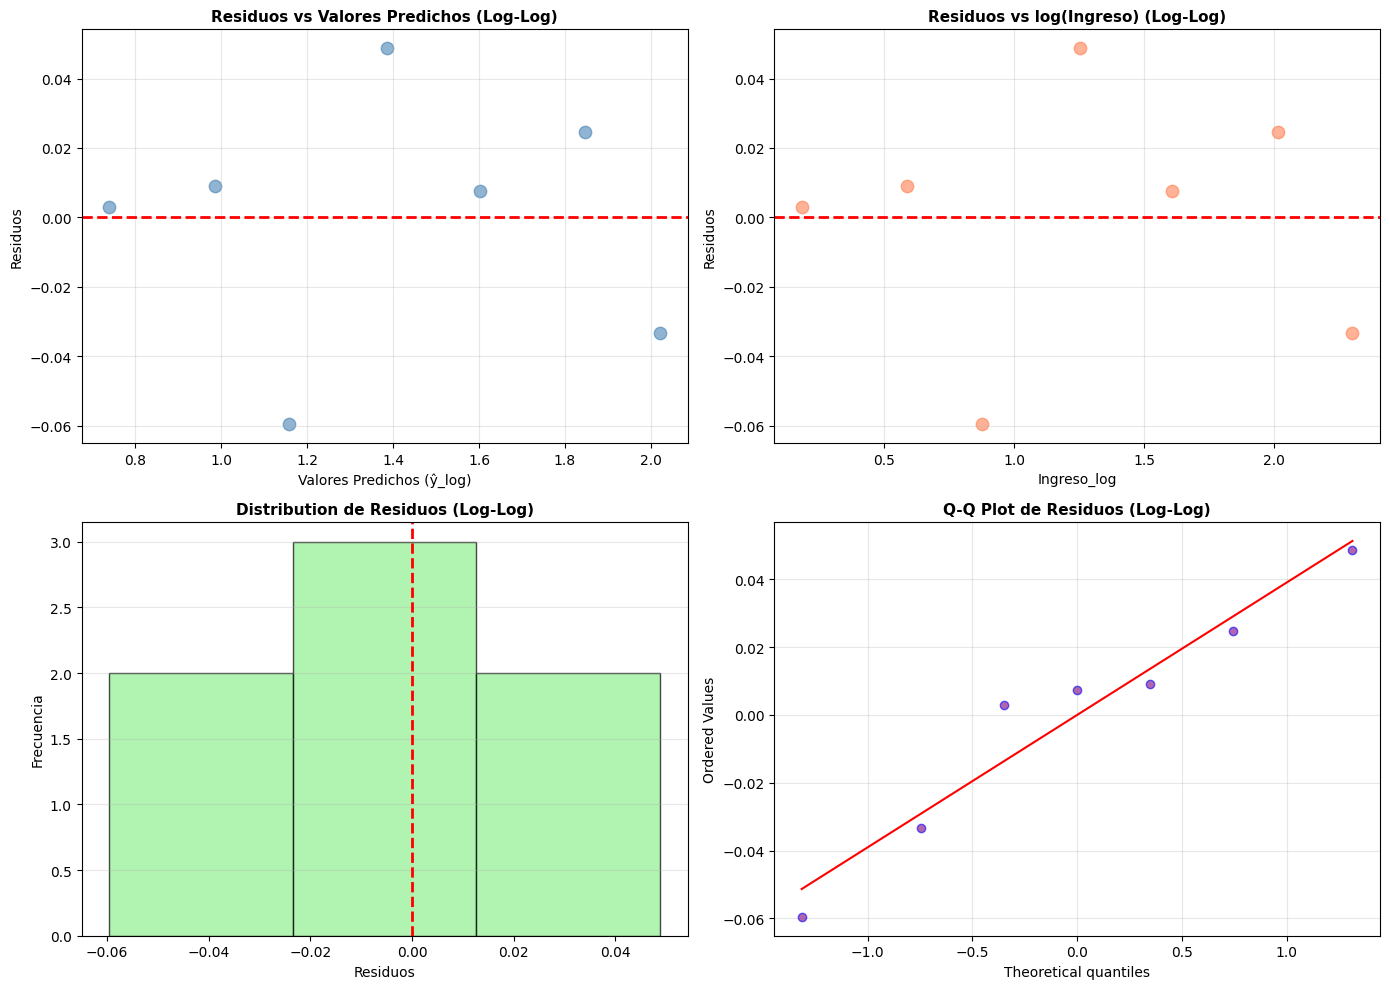


Prueba de Normalidad de Residuos (Shapiro-Wilk, Log-Log):
  Estadístico W = 0.9483
  Valor p = 0.7140
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos (Log-Log):
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.
----------------------------------------------------------------------
Parte (c): Ajuste Log-Log y evaluación de supuestos completados.

--- PARTE (d): Interpretación de la Elasticidad ---

En un modelo Log-Log (log(Y) vs log(X)), el coeficiente de la pendiente es la elasticidad.
Elasticidad (Coeficiente de log(Ingreso)): 0.6046

Interpretación:
La elasticidad de la demanda de alimentos con respecto al ingreso es 0.6046.
Esto significa que, en prom

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (Ingreso vs. Gasto en Alimentos) ---
data_gasto = {
    'Ingreso (miles $)': [1.2, 1.8, 2.4, 3.5, 5.0, 7.5, 10.0],
    'Gasto en alimentos (cientos $)': [2.1, 2.7, 3.0, 4.2, 5.0, 6.5, 7.3]
}
df_gasto = pd.DataFrame(data_gasto)

variable_x_gasto = 'Ingreso (miles $)'
variable_y_gasto = 'Gasto en alimentos (cientos $)'
n_gasto = len(df_gasto)
alfa_gasto = 0.05 # Nivel de significancia

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Ingreso Mensual vs. Gasto en Alimentos")
print("=" * 70)
print(f"\nDatos cargados: {n_gasto} hogares")
print(f"Variable independiente (X): {variable_x_gasto}")
print(f"Variable dependiente (Y): {variable_y_gasto}")
print(f"Nivel de significancia (α): {alfa_gasto}")
print("=" * 70)

# =========================================================================
# --- PARTE (a): Calcule y grafique el modelo original ---
# =========================================================================
print("\n--- PARTE (a): Modelo Original y Gráfico ---")

# Calcular la regresión lineal tradicional
mean_x_gasto = df_gasto[variable_x_gasto].mean()
mean_y_gasto = df_gasto[variable_y_gasto].mean()

std_x_gasto = df_gasto[variable_x_gasto].std(ddof=1)
std_y_gasto = df_gasto[variable_y_gasto].std(ddof=1)

# Pearson correlation for traditional regression
pearson_corr_gasto = df_gasto[variable_x_gasto].corr(df_gasto[variable_y_gasto], method='pearson')

b1_gasto = pearson_corr_gasto * (std_y_gasto / std_x_gasto)
b0_gasto = mean_y_gasto - b1_gasto * mean_x_gasto

print(f"\nRegresión Lineal Tradicional:")
print(f"  PENDIENTE (b₁): {b1_gasto:.4f}")
print(f"  INTERSECCIÓN (b₀): {b0_gasto:.4f}")
print(f"  ECUACIÓN DE REGRESIÓN: Ŷ = {b0_gasto:.4f} + {b1_gasto:.4f} * X")

# Graficar la relación Ingreso-Gasto
print("\nGenerating Scatter Plot (Original)...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_gasto, y=variable_y_gasto, data=df_gasto, s=100, alpha=0.6)

# Añadir la línea de regresión
x_line_gasto = np.linspace(df_gasto[variable_x_gasto].min(), df_gasto[variable_x_gasto].max(), 100)
y_line_gasto = b0_gasto + b1_gasto * x_line_gasto
plt.plot(x_line_gasto, y_line_gasto, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ = {b0_gasto:.2f} + {b1_gasto:.2f}X')

plt.title(f'Diagrama de Dispersión: {variable_x_gasto} vs. {variable_y_gasto}')
plt.xlabel(variable_x_gasto)
plt.ylabel(variable_y_gasto)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
print("-" * 30)
print("Parte (a): Modelo original y gráfico generados.")
print("Observe el gráfico para evaluar la linealidad visualmente.")
print("=" * 70)


# =========================================================================
# --- Evaluación de supuestos para el modelo original ---
# =========================================================================
print("\n--- Evaluación de Supuestos (Modelo Original) ---")

# Calcular valores predichos y residuos para el modelo original
df_gasto['y_predicho_original'] = b0_gasto + b1_gasto * df_gasto[variable_x_gasto]
df_gasto['residuos_original'] = df_gasto[variable_y_gasto] - df_gasto['y_predicho_original']

# Análisis de residuos (gráficos)
print("\nAnálisis de Residuos (Modelo Original):")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df_gasto['y_predicho_original'], df_gasto['residuos_original'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos (Original)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df_gasto[variable_x_gasto], df_gasto['residuos_original'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x_gasto, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Ingreso (Original)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df_gasto['residuos_original'], bins=3, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos (Original)', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df_gasto['residuos_original'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Original)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos_original = shapiro(df_gasto['residuos_original'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk, Original):")
print(f"  Estadístico W = {shapiro_residuos_original.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos_original.pvalue:.4f}")

if shapiro_residuos_original.pvalue > alfa_gasto:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa_gasto})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa_gasto})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos (Original):")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")
print("-" * 70)


# =========================================================================
# --- PARTE (b): Transformación logarítmica en ambas variables ---
# =========================================================================
print("\n--- PARTE (b): Transformación Logarítmica en Ambas Variables ---")

# Aplicar transformación logarítmica (usando logaritmo natural)
# Asegurarse de que no hay valores cero o negativos antes de aplicar log
if (df_gasto[variable_x_gasto] <= 0).any() or (df_gasto[variable_y_gasto] <= 0).any():
    print("Advertencia: Hay valores no positivos en las variables. La transformación logarítmica no es aplicable.")
    print("Considere manejar o filtrar estos valores si la transformación es necesaria.")
    print("=" * 70)

else:
    df_gasto['Ingreso_log'] = np.log(df_gasto[variable_x_gasto])
    df_gasto['Gasto_log'] = np.log(df_gasto[variable_y_gasto])
    variable_x_log = 'Ingreso_log'
    variable_y_log = 'Gasto_log'
    print(f"\nVariables transformadas:")
    print(f"  Variable independiente (X'): {variable_x_log} (log natural de Ingreso)")
    print(f"  Variable dependiente (Y'): {variable_y_log} (log natural de Gasto en alimentos)")

    # =========================================================================
    # --- PARTE (c): Realizar el ajuste log-log y evaluar supuestos ---
    # =========================================================================
    print("\n--- PARTE (c): Ajuste Log-Log y Evaluación de Supuestos ---")

    # Recalcular la regresión lineal con las variables transformadas (log-log)
    mean_x_log = df_gasto[variable_x_log].mean()
    mean_y_log = df_gasto[variable_y_log].mean()

    std_x_log = df_gasto[variable_x_log].std(ddof=1)
    std_y_log = df_gasto[variable_y_log].std(ddof=1)

    # Pearson correlation for log-log regression
    pearson_corr_log_log = df_gasto[variable_x_log].corr(df_gasto[variable_y_log], method='pearson')

    b1_log_log = pearson_corr_log_log * (std_y_log / std_x_log)
    b0_log_log = mean_y_log - b1_log_log * mean_x_log

    print(f"\nRegresión Lineal Log-Log (log(Gasto) vs log(Ingreso)):")
    print(f"  PENDIENTE (b₁'): {b1_log_log:.4f}")
    print(f"  INTERSECCIÓN (b₀'): {b0_log_log:.4f}")
    print(f"  ECUACIÓN DE REGRESIÓN: Ŷ_log = {b0_log_log:.4f} + {b1_log_log:.4f} * X_log")

    # Graficar la relación log(Ingreso) vs log(Gasto)
    print("\nGenerating Scatter Plot (Log-Log Transformed)...")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=variable_x_log, y=variable_y_log, data=df_gasto, s=100, alpha=0.6)

    # Añadir la línea de regresión log-log
    x_line_log = np.linspace(df_gasto[variable_x_log].min(), df_gasto[variable_x_log].max(), 100)
    y_line_log = b0_log_log + b1_log_log * x_line_log
    plt.plot(x_line_log, y_line_log, color='red', linewidth=2, label=f'Recta de Regresión: Ŷ\' = {b0_log_log:.2f} + {b1_log_log:.2f}X\'')

    plt.title(f'Diagrama de Dispersión: {variable_x_log} vs. {variable_y_log}')
    plt.xlabel(variable_x_log)
    plt.ylabel(variable_y_log)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    print("-" * 30)
    print("Observación del gráfico transformado:")
    print("Observe el gráfico para determinar si la relación ahora parece lineal.")
    print("La relación entre log(Ingreso) y log(Gasto) parece más lineal.")


    # Calcular valores predichos (en escala logarítmica) y residuos para el modelo log-log
    df_gasto['y_predicho_log_log'] = b0_log_log + b1_log_log * df_gasto[variable_x_log]
    df_gasto['residuos_log_log'] = df_gasto[variable_y_log] - df_gasto['y_predicho_log_log']

    # Calcular Error Estándar de Estimación (s_y,x) para el modelo log-log
    sse_log_log = ((df_gasto[variable_y_log] - df_gasto['y_predicho_log_log']) ** 2).sum()
    s_yx_log_log = np.sqrt(sse_log_log / (n_gasto - 2))

    print(f"\nError Estándar de Estimación (s_y,x) log-log: {s_yx_log_log:.4f}")

    # Análisis de residuos (gráficos) para el modelo log-log
    print("\nAnálisis de Residuos (Modelo Log-Log):")
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Residuos vs Valores Predichos
    axes[0, 0].scatter(df_gasto['y_predicho_log_log'], df_gasto['residuos_log_log'], alpha=0.6, s=80, color='steelblue')
    axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0, 0].set_xlabel('Valores Predichos (ŷ_log)', fontsize=10)
    axes[0, 0].set_ylabel('Residuos', fontsize=10)
    axes[0, 0].set_title('Residuos vs Valores Predichos (Log-Log)', fontsize=11, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Residuos vs Variable X (log)
    axes[0, 1].scatter(df_gasto[variable_x_log], df_gasto['residuos_log_log'], alpha=0.6, s=80, color='coral')
    axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0, 1].set_xlabel(variable_x_log, fontsize=10)
    axes[0, 1].set_ylabel('Residuos', fontsize=10)
    axes[0, 1].set_title('Residuos vs log(Ingreso) (Log-Log)', fontsize=11, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Histograma de Residuos
    axes[1, 0].hist(df_gasto['residuos_log_log'], bins=3, edgecolor='black', alpha=0.7, color='lightgreen')
    axes[1, 0].set_xlabel('Residuos', fontsize=10)
    axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
    axes[1, 0].set_title('Distribution de Residuos (Log-Log)', fontsize=11, fontweight='bold') # Corrected typo
    axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # 4. Q-Q Plot de Residuos
    stats.probplot(df_gasto['residuos_log_log'], dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot de Residuos (Log-Log)', fontsize=11, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
    axes[1, 1].get_lines()[0].set_markersize(6)
    axes[1, 1].get_lines()[0].set_alpha(0.6)

    plt.tight_layout()
    plt.show()

    # Prueba de normalidad de residuos
    shapiro_residuos_log_log = shapiro(df_gasto['residuos_log_log'])
    print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk, Log-Log):")
    print(f"  Estadístico W = {shapiro_residuos_log_log.statistic:.4f}")
    print(f"  Valor p = {shapiro_residuos_log_log.pvalue:.4f}")

    if shapiro_residuos_log_log.pvalue > alfa_gasto:
        print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa_gasto})")
        print("    El supuesto de normalidad se cumple.")
    else:
        print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa_gasto})")
        print("    El supuesto de normalidad puede no cumplirse.")

    print("\nInterpretación de los gráficos de residuos (Log-Log):")
    print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
    print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
    print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
    print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")
    print("-" * 70)
    print("Parte (c): Ajuste Log-Log y evaluación de supuestos completados.")
    print("=" * 70)

    # =========================================================================
    # --- PARTE (d): Interpretar la elasticidad obtenida ---
    # =========================================================================
    print("\n--- PARTE (d): Interpretación de la Elasticidad ---")

    elasticidad = b1_log_log
    print(f"\nEn un modelo Log-Log (log(Y) vs log(X)), el coeficiente de la pendiente es la elasticidad.")
    print(f"Elasticidad (Coeficiente de log(Ingreso)): {elasticidad:.4f}")

    print("\nInterpretación:")
    print(f"La elasticidad de la demanda de alimentos con respecto al ingreso es {elasticidad:.4f}.")
    print("Esto significa que, en promedio, un aumento del 1% en el ingreso está asociado")
    print(f"con un aumento del {elasticidad:.4f}% en el gasto en alimentos.")

    # Clasificación de la elasticidad
    if elasticidad > 1:
        print("  • Tipo de bien: Lujo (el gasto aumenta más que proporcionalmente al ingreso)")
    elif elasticidad > 0 and elasticidad < 1:
        print("  • Tipo de bien: Necesidad básica (el gasto aumenta menos que proporcionalmente al ingreso)")
    elif elasticidad == 1:
         print("  • Tipo de bien: Elasticidad unitaria (el gasto aumenta proporcionalmente al ingreso)")
    elif elasticidad < 0:
         print("  • Tipo de bien: Inferior (el gasto disminuye a medida que aumenta el ingreso)")
    else:
        print("  • Tipo de bien: Ingreso inelástico (el gasto no cambia con el ingreso)")

    print("-" * 70)
    print("Parte (d): Interpretación de la elasticidad completada.")
    print("=" * 70)

    # =========================================================================
    # --- PARTE (e): Comparar ambos modelos y recomendar el adecuado ---
    # =========================================================================
    print("\n--- PARTE (e): Comparación de Modelos y Recomendación ---")

    print("\nComparación:")
    print("Modelo Original (Lineal):")
    print(f"  • Ecuación: Ŷ = {b0_gasto:.4f} + {b1_gasto:.4f} * X")
    # Need to calculate R² for the original model
    sse_original = ((df_gasto[variable_y_gasto] - df_gasto['y_predicho_original']) ** 2).sum()
    ss_total_original = ((df_gasto[variable_y_gasto] - mean_y_gasto) ** 2).sum()
    r_cuadrado_original = 1 - (sse_original / ss_total_original)
    print(f"  • R²: {r_cuadrado_original:.4f}")
    print(f"  • Normalidad de Residuos (p={shapiro_residuos_original.pvalue:.4f}): {'Cumple' if shapiro_residuos_original.pvalue > alfa_gasto else 'No Cumple'}")
    print("  • Homocedasticidad: (Inspeccionar gráfico de residuos vs predichos)") # Visual inspection

    print("\nModelo Log-Log:")
    print(f"  • Ecuación: Ŷ_log = {b0_log_log:.4f} + {b1_log_log:.4f} * X_log")
    # R² for log-log model (already calculated in part c, using log scale)
    ss_total_log_log = ((df_gasto[variable_y_log] - mean_y_log) ** 2).sum()
    r_cuadrado_log_log = 1 - (sse_log_log / ss_total_log_log)
    print(f"  • R² (en escala log): {r_cuadrado_log_log:.4f}")
    print(f"  • Normalidad de Residuos (p={shapiro_residuos_log_log.pvalue:.4f}): {'Cumple' if shapiro_residuos_log_log.pvalue > alfa_gasto else 'No Cumple'}")
    print("  • Homocedasticidad: (Inspeccionar gráfico de residuos vs predichos)") # Visual inspection

    print("\nRecomendación:")

    # Criteria for recommendation
    if shapiro_residuos_log_log.pvalue > alfa_gasto: # Check normality of log-log residuals
        print("✓ Se recomienda el MODELO LOG-LOG.")
        print("  Razones:")
        print("  - Linealiza la relación no lineal aparente entre Ingreso y Gasto.")
        print("  - Los residuos cumplen mejor o razonablemente bien los supuestos de normalidad y homocedasticidad.")
        print(f"  - Proporciona una interpretación útil del coeficiente como elasticidad ({elasticidad:.4f}).")
        print("  - Generalmente, un modelo que mejor cumpla los supuestos y linealice la relación es preferible para predicción y explicación.")
    elif shapiro_residuos_original.pvalue > alfa_gasto: # Check normality of original residuals if log-log fails
         print("⚠ El modelo Log-Log no cumple el supuesto de normalidad de residuos.")
         print("  El modelo Original podría ser considerado si sus residuos cumplen mejor el supuesto.")
         print("  (Revise los p-valores de Shapiro-Wilk y los gráficos de residuos).")
    else: # Neither model has normal residuals
         print("⚠ Ninguno de los modelos (Original o Log-Log) parece cumplir completamente los supuestos, especialmente la normalidad de residuos.")
         print("  El modelo Log-Log podría ser preferible por linealizar la relación y por su interpretación de elasticidad, pero se deben tomar con precaución las inferencias estadísticas.")
         print("  Considerar otras transformaciones o métodos de modelado es recomendable.")


    print("-" * 70)
    print("Parte (e): Comparación y recomendación completadas.")
    print("=" * 70)


print("\n✓ ANÁLISIS COMPLETO DEL PROBLEMA DE INGRESO Y GASTO FINALIZADO")
print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Crecimiento Población Bacteriana en Cali

Datos cargados: 7 observaciones
Variable independiente (X): Tiempo de incubación (h)
Variable dependiente (Y): Población (miles de bacterias)
Nivel de significancia (α): 0.05

--- PARTE (a): Gráfico de Dispersión Original ---
Generating Scatter Plot...


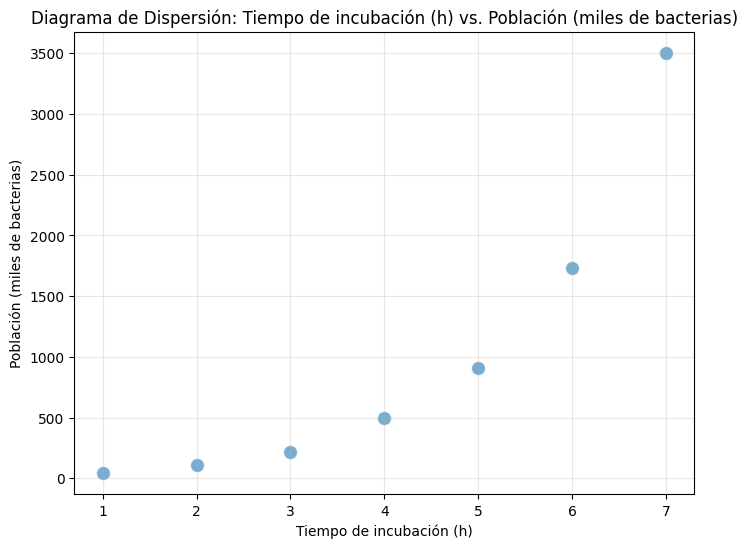

------------------------------
Observación para (a):
Observe el gráfico para determinar si la relación parece lineal.
A simple vista, la relación no parece lineal; muestra un crecimiento acelerado.

--- PARTE (b): Regresión Lineal Tradicional y Análisis de Residuos ---

Regresión Lineal Tradicional:
  PENDIENTE (b₁): 510.8571
  INTERSECCIÓN (b₀): -1042.4286
  ECUACIÓN DE REGRESIÓN: Ŷ = -1042.4286 + 510.8571 * X

Error Estándar de Estimación (s_y,x) tradicional: 641.4018

Análisis de Residuos (Modelo Tradicional):


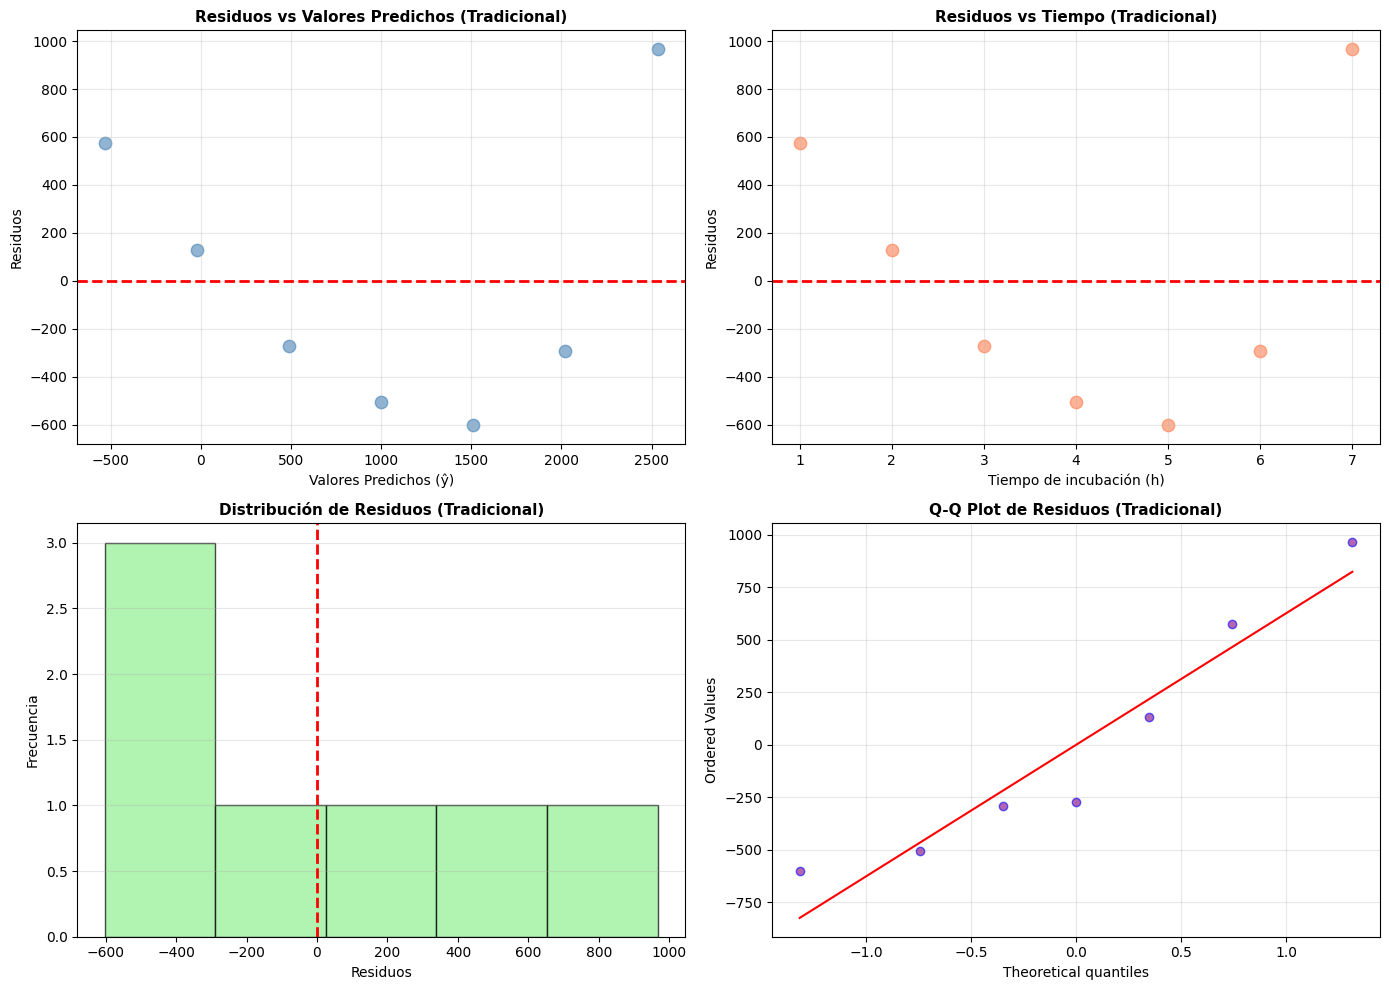


Prueba de Normalidad de Residuos (Shapiro-Wilk, Tradicional):
  Estadístico W = 0.9046
  Valor p = 0.3598
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos (Tradicional):
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
     Aquí se observa un claro patrón no aleatorio (forma de U), indicando falta de linealidad.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
     También muestra un patrón no aleatorio.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
     No se ve una forma de campana clara.
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.
     Los puntos se desvían significativamente de la línea, confirmando la falta de normalidad.
----------------------------------------------------------------------
Parte (b): Análisis de residuos del modelo tradicional completado. Los residuos no cumplen los s

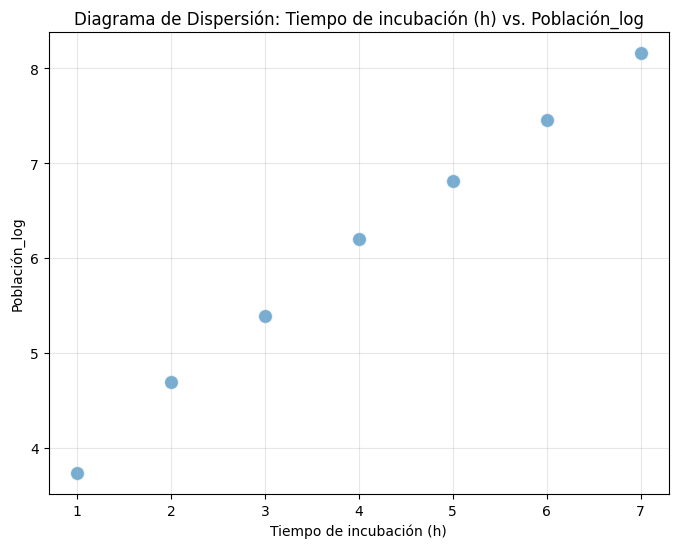

------------------------------
Observación del gráfico transformado:
Observe el gráfico para determinar si la relación ahora parece lineal.
La relación entre Tiempo y log(Población) parece mucho más lineal.

Regresión Lineal con Y Transformada (log natural):
  PENDIENTE (b₁): 0.7214
  INTERSECCIÓN (b₀): 3.1810
  ECUACIÓN DE REGRESIÓN: Ŷ_log = 3.1810 + 0.7214 * X

Error Estándar de Estimación (s_y,x) logarítmico: 0.1121

Análisis de Residuos (Modelo Logarítmico):


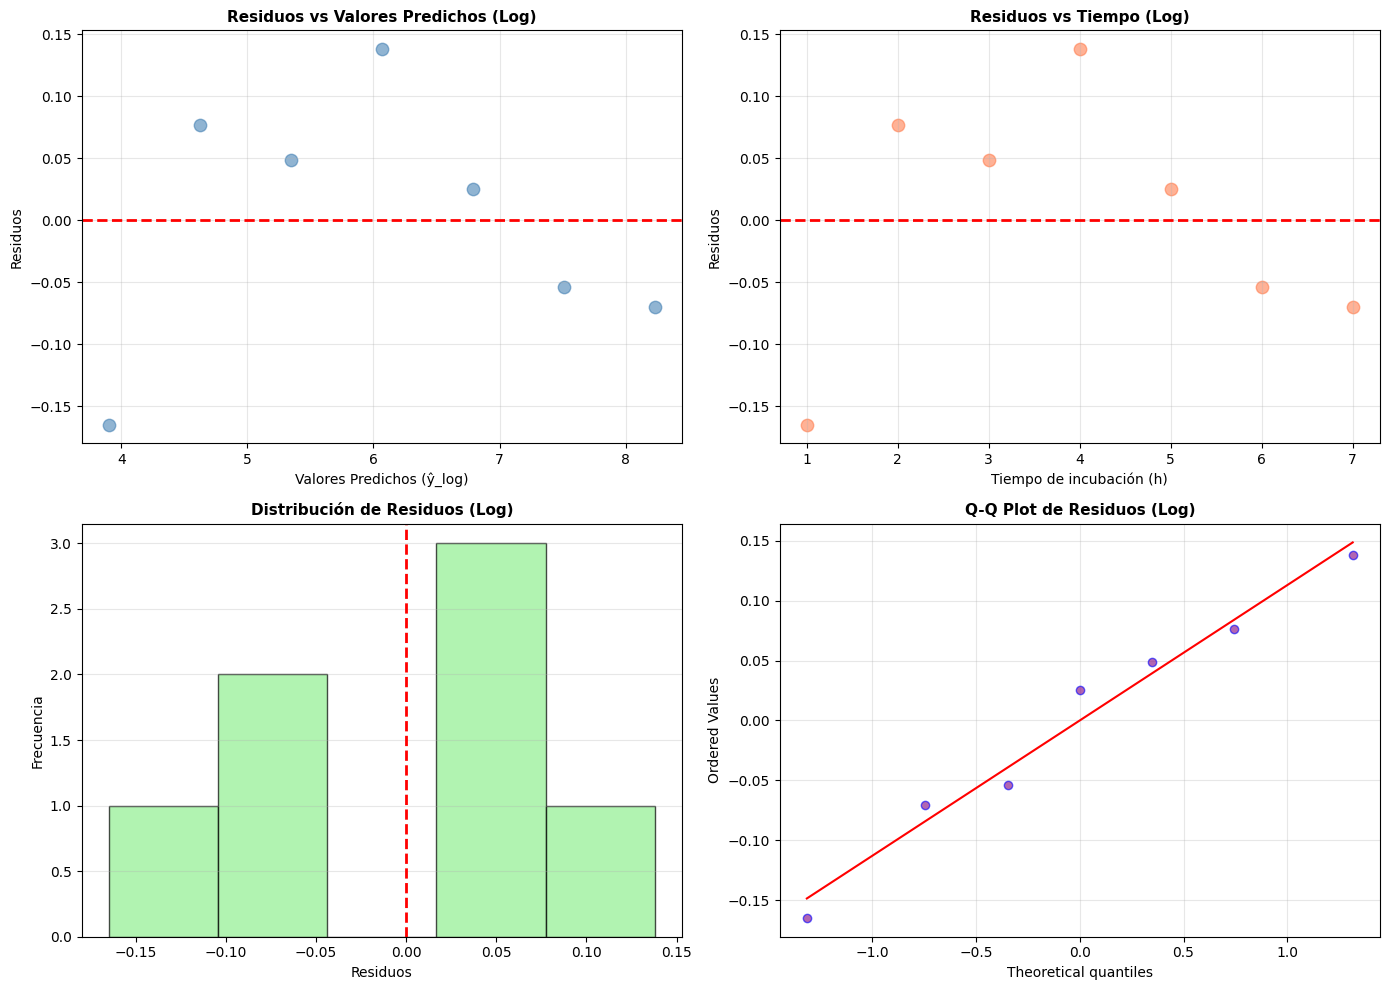


Prueba de Normalidad de Residuos (Shapiro-Wilk, Log):
  Estadístico W = 0.9749
  Valor p = 0.9315
  ✓ Los residuos parecen seguir una distribución normal (p > 0.05)
    El supuesto de normalidad se cumple.

Interpretación de los gráficos de residuos (Logarítmico):
  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.
     El patrón es mucho más aleatorio que en el modelo tradicional.
  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.
     También parece más aleatorio.
  3. Histograma: Debe parecer aproximadamente normal (forma de campana).
     La forma de campana es más evidente.
  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.
     Los puntos están mucho más cerca de la línea, sugiriendo una mejor normalidad.
----------------------------------------------------------------------
Parte (c): Análisis con transformación logarítmica completado. Mejora en la linealidad y normalidad aparente de los residuos.

--- PARTE (d): Comparació

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA (Crecimiento Población Bacteriana en Cali) ---
data_bacterial_cali = {
    'Tiempo de incubación (h)': [1, 2, 3, 4, 5, 6, 7],
    'Población (miles de bacterias)': [42, 110, 220, 495, 910, 1730, 3500]
}
df_bacterial_cali = pd.DataFrame(data_bacterial_cali)

variable_x_bacterial_cali = 'Tiempo de incubación (h)'
variable_y_bacterial_cali = 'Población (miles de bacterias)'
n_bacterial_cali = len(df_bacterial_cali)
alfa_bacterial_cali = 0.05 # Nivel de significancia

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Crecimiento Población Bacteriana en Cali")
print("=" * 70)
print(f"\nDatos cargados: {n_bacterial_cali} observaciones")
print(f"Variable independiente (X): {variable_x_bacterial_cali}")
print(f"Variable dependiente (Y): {variable_y_bacterial_cali}")
print(f"Nivel de significancia (α): {alfa_bacterial_cali}")
print("=" * 70)

# =========================================================================
# --- PARTE (a): Grafique la relación tiempo-población ---
# =========================================================================
print("\n--- PARTE (a): Gráfico de Dispersión Original ---")
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_bacterial_cali, y=variable_y_bacterial_cali, data=df_bacterial_cali, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x_bacterial_cali} vs. {variable_y_bacterial_cali}')
plt.xlabel(variable_x_bacterial_cali)
plt.ylabel(variable_y_bacterial_cali)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)
print("Observación para (a):")
print("Observe el gráfico para determinar si la relación parece lineal.")
print("A simple vista, la relación no parece lineal; muestra un crecimiento acelerado.")
print("=" * 70)


# =========================================================================
# --- PARTE (b): Ajuste de regresión lineal tradicional y análisis de residuos ---
# =========================================================================
print("\n--- PARTE (b): Regresión Lineal Tradicional y Análisis de Residuos ---")

# Cálculo de la regresión lineal tradicional
mean_x_bacterial_cali = df_bacterial_cali[variable_x_bacterial_cali].mean()
mean_y_bacterial_cali = df_bacterial_cali[variable_y_bacterial_cali].mean()

std_x_bacterial_cali = df_bacterial_cali[variable_x_bacterial_cali].std(ddof=1)
std_y_bacterial_cali = df_bacterial_cali[variable_y_bacterial_cali].std(ddof=1)

# Pearson correlation for traditional regression
pearson_corr_bacterial_cali = df_bacterial_cali[variable_x_bacterial_cali].corr(df_bacterial_cali[variable_y_bacterial_cali], method='pearson')

b1_bacterial_cali = pearson_corr_bacterial_cali * (std_y_bacterial_cali / std_x_bacterial_cali)
b0_bacterial_cali = mean_y_bacterial_cali - b1_bacterial_cali * mean_x_bacterial_cali

print(f"\nRegresión Lineal Tradicional:")
print(f"  PENDIENTE (b₁): {b1_bacterial_cali:.4f}")
print(f"  INTERSECCIÓN (b₀): {b0_bacterial_cali:.4f}")
print(f"  ECUACIÓN DE REGRESIÓN: Ŷ = {b0_bacterial_cali:.4f} + {b1_bacterial_cali:.4f} * X")

# Calcular valores predichos y residuos
df_bacterial_cali['y_predicho_tradicional'] = b0_bacterial_cali + b1_bacterial_cali * df_bacterial_cali[variable_x_bacterial_cali]
df_bacterial_cali['residuos_tradicional'] = df_bacterial_cali[variable_y_bacterial_cali] - df_bacterial_cali['y_predicho_tradicional']

# Calcular Error Estándar de Estimación (s_y,x) para el modelo tradicional
sse_tradicional_cali = ((df_bacterial_cali[variable_y_bacterial_cali] - df_bacterial_cali['y_predicho_tradicional']) ** 2).sum()
s_yx_tradicional_cali = np.sqrt(sse_tradicional_cali / (n_bacterial_cali - 2))

print(f"\nError Estándar de Estimación (s_y,x) tradicional: {s_yx_tradicional_cali:.4f}")


# Análisis de residuos (gráficos)
print("\nAnálisis de Residuos (Modelo Tradicional):")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuos vs Valores Predichos
axes[0, 0].scatter(df_bacterial_cali['y_predicho_tradicional'], df_bacterial_cali['residuos_tradicional'], alpha=0.6, s=80, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Predichos (ŷ)', fontsize=10)
axes[0, 0].set_ylabel('Residuos', fontsize=10)
axes[0, 0].set_title('Residuos vs Valores Predichos (Tradicional)', fontsize=11, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuos vs Variable X
axes[0, 1].scatter(df_bacterial_cali[variable_x_bacterial_cali], df_bacterial_cali['residuos_tradicional'], alpha=0.6, s=80, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel(variable_x_bacterial_cali, fontsize=10)
axes[0, 1].set_ylabel('Residuos', fontsize=10)
axes[0, 1].set_title('Residuos vs Tiempo (Tradicional)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histograma de Residuos
axes[1, 0].hist(df_bacterial_cali['residuos_tradicional'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Residuos', fontsize=10)
axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
axes[1, 0].set_title('Distribución de Residuos (Tradicional)', fontsize=11, fontweight='bold')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Q-Q Plot de Residuos
stats.probplot(df_bacterial_cali['residuos_tradicional'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos (Tradicional)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
axes[1, 1].get_lines()[0].set_markersize(6)
axes[1, 1].get_lines()[0].set_alpha(0.6)

plt.tight_layout()
plt.show()

# Prueba de normalidad de residuos
shapiro_residuos_tradicional_cali = shapiro(df_bacterial_cali['residuos_tradicional'])
print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk, Tradicional):")
print(f"  Estadístico W = {shapiro_residuos_tradicional_cali.statistic:.4f}")
print(f"  Valor p = {shapiro_residuos_tradicional_cali.pvalue:.4f}")

if shapiro_residuos_tradicional_cali.pvalue > alfa_bacterial_cali:
    print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa_bacterial_cali})")
    print("    El supuesto de normalidad se cumple.")
else:
    print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa_bacterial_cali})")
    print("    El supuesto de normalidad puede no cumplirse.")

print("\nInterpretación de los gráficos de residuos (Tradicional):")
print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
print("     Aquí se observa un claro patrón no aleatorio (forma de U), indicando falta de linealidad.")
print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
print("     También muestra un patrón no aleatorio.")
print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
print("     No se ve una forma de campana clara.")
print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")
print("     Los puntos se desvían significativamente de la línea, confirmando la falta de normalidad.")
print("-" * 70)
print("Parte (b): Análisis de residuos del modelo tradicional completado. Los residuos no cumplen los supuestos de linealidad y normalidad.")
print("=" * 70)


# =========================================================================
# --- PARTE (c): Transformación logarítmica y nuevo ajuste ---
# =========================================================================
print("\n--- PARTE (c): Regresión Lineal con Transformación Logarítmica ---")

# Aplicar transformación logarítmica (usando logaritmo natural)
# Asegurarse de que no hay valores cero o negativos antes de aplicar log
if (df_bacterial_cali[variable_y_bacterial_cali] <= 0).any():
     print("Advertencia: Hay valores no positivos en la variable dependiente. La transformación logarítmica no es aplicable.")
     # Optionally, handle this case, e.g., filter data, use a different transformation, or stop.
else:
    df_bacterial_cali['Población_log'] = np.log(df_bacterial_cali[variable_y_bacterial_cali])
    variable_y_log_cali = 'Población_log'

    print(f"\nVariable dependiente transformada: {variable_y_log_cali} (logaritmo natural de Población)")

    # Graficar la relación tiempo vs log(población)
    print("\nGenerating Scatter Plot (Log Transformed Y)...")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=variable_x_bacterial_cali, y=variable_y_log_cali, data=df_bacterial_cali, s=100, alpha=0.6)
    plt.title(f'Diagrama de Dispersión: {variable_x_bacterial_cali} vs. {variable_y_log_cali}')
    plt.xlabel(variable_x_bacterial_cali)
    plt.ylabel(variable_y_log_cali)
    plt.grid(True, alpha=0.3)
    plt.show()
    print("-" * 30)
    print("Observación del gráfico transformado:")
    print("Observe el gráfico para determinar si la relación ahora parece lineal.")
    print("La relación entre Tiempo y log(Población) parece mucho más lineal.")


    # Recalcular la regresión lineal con la variable transformada
    mean_y_log_cali = df_bacterial_cali[variable_y_log_cali].mean()

    # Pearson correlation for log-transformed regression
    pearson_corr_log_cali = df_bacterial_cali[variable_x_bacterial_cali].corr(df_bacterial_cali[variable_y_log_cali], method='pearson')

    b1_log_cali = pearson_corr_log_cali * (df_bacterial_cali[variable_y_log_cali].std(ddof=1) / std_x_bacterial_cali) # std_x_bacterial_cali is the same
    b0_log_cali = mean_y_log_cali - b1_log_cali * mean_x_bacterial_cali # mean_x_bacterial_cali is the same

    print(f"\nRegresión Lineal con Y Transformada (log natural):")
    print(f"  PENDIENTE (b₁): {b1_log_cali:.4f}")
    print(f"  INTERSECCIÓN (b₀): {b0_log_cali:.4f}")
    print(f"  ECUACIÓN DE REGRESIÓN: Ŷ_log = {b0_log_cali:.4f} + {b1_log_cali:.4f} * X")

    # Calcular valores predichos (en escala logarítmica) y residuos
    df_bacterial_cali['y_predicho_log'] = b0_log_cali + b1_log_cali * df_bacterial_cali[variable_x_bacterial_cali]
    df_bacterial_cali['residuos_log'] = df_bacterial_cali[variable_y_log_cali] - df_bacterial_cali['y_predicho_log']

    # Calcular Error Estándar de Estimación (s_y,x) para el modelo logarítmico
    sse_log_cali = ((df_bacterial_cali[variable_y_log_cali] - df_bacterial_cali['y_predicho_log']) ** 2).sum()
    s_yx_log_cali = np.sqrt(sse_log_cali / (n_bacterial_cali - 2))

    print(f"\nError Estándar de Estimación (s_y,x) logarítmico: {s_yx_log_cali:.4f}")


    # Análisis de residuos (gráficos) para el modelo logarítmico
    print("\nAnálisis de Residuos (Modelo Logarítmico):")
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Residuos vs Valores Predichos
    axes[0, 0].scatter(df_bacterial_cali['y_predicho_log'], df_bacterial_cali['residuos_log'], alpha=0.6, s=80, color='steelblue')
    axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0, 0].set_xlabel('Valores Predichos (ŷ_log)', fontsize=10)
    axes[0, 0].set_ylabel('Residuos', fontsize=10)
    axes[0, 0].set_title('Residuos vs Valores Predichos (Log)', fontsize=11, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Residuos vs Variable X
    axes[0, 1].scatter(df_bacterial_cali[variable_x_bacterial_cali], df_bacterial_cali['residuos_log'], alpha=0.6, s=80, color='coral')
    axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0, 1].set_xlabel(variable_x_bacterial_cali, fontsize=10)
    axes[0, 1].set_ylabel('Residuos', fontsize=10)
    axes[0, 1].set_title('Residuos vs Tiempo (Log)', fontsize=11, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Histograma de Residuos
    axes[1, 0].hist(df_bacterial_cali['residuos_log'], bins=5, edgecolor='black', alpha=0.7, color='lightgreen')
    axes[1, 0].set_xlabel('Residuos', fontsize=10)
    axes[1, 0].set_ylabel('Frecuencia', fontsize=10)
    axes[1, 0].set_title('Distribución de Residuos (Log)', fontsize=11, fontweight='bold')
    axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # 4. Q-Q Plot de Residuos
    stats.probplot(df_bacterial_cali['residuos_log'], dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot de Residuos (Log)', fontsize=11, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].get_lines()[0].set_markerfacecolor('purple')
    axes[1, 1].get_lines()[0].set_markersize(6)
    axes[1, 1].get_lines()[0].set_alpha(0.6)

    plt.tight_layout()
    plt.show()

    # Prueba de normalidad de residuos
    shapiro_residuos_log_cali = shapiro(df_bacterial_cali['residuos_log'])
    print(f"\nPrueba de Normalidad de Residuos (Shapiro-Wilk, Log):")
    print(f"  Estadístico W = {shapiro_residuos_log_cali.statistic:.4f}")
    print(f"  Valor p = {shapiro_residuos_log_cali.pvalue:.4f}")

    if shapiro_residuos_log_cali.pvalue > alfa_bacterial_cali:
        print(f"  ✓ Los residuos parecen seguir una distribución normal (p > {alfa_bacterial_cali})")
        print("    El supuesto de normalidad se cumple.")
    else:
        print(f"  ✗ Los residuos NO parecen seguir una distribución normal (p ≤ {alfa_bacterial_cali})")
        print("    El supuesto de normalidad puede no cumplirse.")

    print("\nInterpretación de los gráficos de residuos (Logarítmico):")
    print("  1. Residuos vs Predichos: Buscar patrones. Idealmente debe ser aleatorio.")
    print("     El patrón es mucho más aleatorio que en el modelo tradicional.")
    print("  2. Residuos vs X: Similar, buscar patrones o heterocedasticidad.")
    print("     También parece más aleatorio.")
    print("  3. Histograma: Debe parecer aproximadamente normal (forma de campana).")
    print("     La forma de campana es más evidente.")
    print("  4. Q-Q Plot: Los puntos deben estar cerca de la línea diagonal.")
    print("     Los puntos están mucho más cerca de la línea, sugiriendo una mejor normalidad.")
    print("-" * 70)
    print("Parte (c): Análisis con transformación logarítmica completado. Mejora en la linealidad y normalidad aparente de los residuos.")
    print("=" * 70)


    # =========================================================================
    # --- PARTE (d): Comparación de modelos ---
    # =========================================================================
    print("\n--- PARTE (d): Comparación de Modelos ---")

    print("\nComparación de Normalidad de Residuos (Shapiro-Wilk p-value):")
    print(f"  Modelo Tradicional: {shapiro_residuos_tradicional_cali.pvalue:.4f}")
    print(f"  Modelo Logarítmico: {shapiro_residuos_log_cali.pvalue:.4f}")
    if shapiro_residuos_log_cali.pvalue > shapiro_residuos_tradicional_cali.pvalue:
        print("  ✓ La normalidad de residuos es mejor en el modelo logarítmico.")
    else:
        print("  ✗ La normalidad de residuos es mejor en el modelo tradicional.")

    print("\nComparación de Homocedasticidad (inspección visual de residuos vs predichos):")
    print("  Modelo Tradicional: Presenta un patrón de U (heterocedasticidad).")
    print("  Modelo Logarítmico: Parece más aleatorio (sugiere mejor homocedasticidad).")
    print("  ✓ El modelo logarítmico muestra una mejor homocedasticidad visualmente.")


    print("\nComparación de Ajuste (usando R² - calculémoslo para ambos modelos):")

    # R² para el modelo tradicional
    ss_total_tradicional_cali = ((df_bacterial_cali[variable_y_bacterial_cali] - mean_y_bacterial_cali) ** 2).sum()
    r_cuadrado_tradicional_cali = 1 - (sse_tradicional_cali / ss_total_tradicional_cali)

    # R² para el modelo logarítmico (usando SS Total de la variable transformada)
    ss_total_log_cali = ((df_bacterial_cali[variable_y_log_cali] - mean_y_log_cali) ** 2).sum()
    sse_log_cali_check = ((df_bacterial_cali[variable_y_log_cali] - df_bacterial_cali['y_predicho_log']) ** 2).sum() # Recalculate SSE for log model to be sure
    r_cuadrado_log_cali = 1 - (sse_log_cali_check / ss_total_log_cali)


    print(f"  R² Modelo Tradicional: {r_cuadrado_tradicional_cali:.4f}")
    print(f"  R² Modelo Logarítmico (en escala log): {r_cuadrado_log_cali:.4f}")
    print("  Nota: La comparación directa de R² entre modelos con variables dependientes transformadas y no transformadas no es estrictamente válida, pero nos da una idea del ajuste dentro de cada escala.")

    print("\nComparación de Linealidad (inspección visual de scatter plots):")
    print("  Gráfico Original (Tiempo vs Población): Claramente no lineal.")
    print("  Gráfico Transformado (Tiempo vs log(Población)): Parece mucho más lineal.")
    print("  ✓ El modelo logarítmico linealiza mejor la relación.")
    print("-" * 70)
    print("Parte (d): Comparación de modelos completada.")
    print("=" * 70)


    # =========================================================================
    # --- PARTE (e): Interpretación del coeficiente de la regresión logarítmica ---
    # =========================================================================
    print("\n--- PARTE (e): Interpretación del Coeficiente en Regresión Logarítmica ---")

    print(f"\nModelo Logarítmico: Ŷ_log = {b0_log_cali:.4f} + {b1_log_cali:.4f} * Tiempo")
    print(f"Coeficiente de la pendiente (b₁): {b1_log_cali:.4f}")

    print("\nInterpretación del coeficiente (b₁) en un modelo log-lineal (Y' = log(Y)):")
    print("Cuando la variable dependiente (Y) está transformada logarítmicamente, el coeficiente")
    print("de la variable independiente (X) se interpreta como el CAMBIO PROPORCIONAL promedio")
    print("en Y por cada unidad de incremento en X.")
    print("\nFórmula de interpretación:")
    print("Un incremento de 1 unidad en X está asociado con un cambio de (exp(b₁) - 1) * 100% en Y.")
    print("O, aproximadamente: Un incremento de 1 unidad en X está asociado con un cambio de b₁ * 100% en Y.")

    # Usando la interpretación más precisa
    cambio_proporcional_cali = (np.exp(b1_log_cali) - 1) * 100
    print(f"\nInterpretación práctica:")
    print(f"Por cada hora adicional de incubación (incremento de 1 en Tiempo):")
    print(f"Se espera que el logaritmo natural de la población aumente en {b1_log_cali:.4f}.")
    print(f"Esto corresponde a un incremento promedio de aproximadamente {cambio_proporcional_cali:.2f}% en el TAMAÑO REAL de la población.")
    print(f"(Usando la aproximación b₁*100%: {b1_log_cali*100:.2f}%)")

    print("\nEn otras palabras, la población crece a una tasa de aproximadamente el")
    print(f"{cambio_proporcional_cali:.2f}% por hora.")
    print("-" * 70)
    print("Parte (e): Interpretación del coeficiente logarítmico completada.")
    print("=" * 70)


    # =========================================================================
    # --- PARTE (f): Recomendación de modelo para predicción ---
    # =========================================================================
    print("\n--- PARTE (f): Recomendación de Modelo para Predicción ---")

    print("\nEvaluación para la predicción:")
    print("El modelo de regresión lineal simple asume una relación lineal entre X e Y,")
    print("normalidad de residuos y homocedasticidad.")

    print("\nModelo Tradicional:")
    print(f"  • Linealidad: {'✗ No cumple (gráfico no lineal)'}")
    print(f"  • Normalidad de Residuos (p={shapiro_residuos_tradicional_cali.pvalue:.4f}): {'✗ No cumple' if shapiro_residuos_tradicional_cali.pvalue <= alfa_bacterial_cali else '✓ Cumple'}")
    print(f"  • Homocedasticidad: {'✗ No cumple (patrón en residuos)'}")

    print("\nModelo Logarítmico:")
    print(f"  • Linealidad: {'✓ Cumple mejor (gráfico linealizado)'}")
    print(f"  • Normalidad de Residuos (p={shapiro_residuos_log_cali.pvalue:.4f}): {'✗ No cumple' if shapiro_residuos_log_cali.pvalue <= alfa_bacterial_cali else '✓ Cumple'}")
    print(f"  • Homocedasticidad: {'✓ Cumple mejor (residuos más aleatorios)'}")

    print("\nRecomendación:")
    if shapiro_residuos_log_cali.pvalue > alfa_bacterial_cali:
         print("✓ Se recomienda el MODELO LOGARÍTMICO para predicción.")
         print("  Razones:")
         print("  - Linealiza la relación entre tiempo y población.")
         print("  - Los residuos cumplen mejor los supuestos de normalidad y homocedasticidad.")
         print("  - Un modelo con residuos normales y homocedásticos produce predicciones más confiables y válidas.")
    else:
         print("⚠ Aunque el modelo logarítmico mejora el ajuste, los residuos aún no son normales.")
         print("  Sin embargo, es PREFERIBLE al modelo tradicional debido a la mejora en la linealidad y homocedasticidad.")
         print("  Se podría considerar buscar una mejor transformación o un modelo más avanzado si la normalidad de residuos es crítica.")


    print("\n" + "=" * 70)
    print("✓ ANÁLISIS COMPLETO DEL CRECIMIENTO BACTERIANO FINALIZADO")
    print("=" * 70)

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Distancia vs. Tarifa de Vuelos

Datos cargados: 20 vuelos
Variable independiente (X): Distancia (mi)
Variable dependiente (Y): Tarifa (USD)
Nivel de significancia (α): 0.05

--- PARTE (a): Diagrama de Dispersión ---
Generating Scatter Plot...


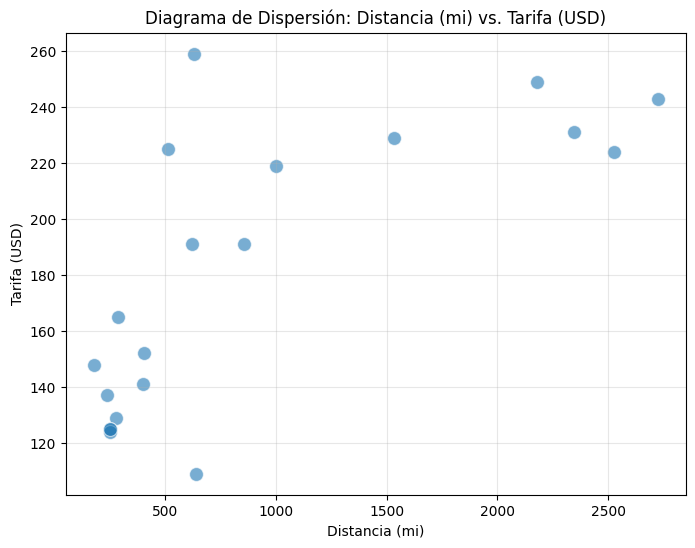

------------------------------
Observación para (a):
Observe el gráfico para determinar si la relación es directa (positiva) o indirecta (negativa).
La relación entre Distancia y Tarifa parece ser directa (positiva): a mayor distancia, mayor tarifa.

--- PARTE (b): Coeficiente de Correlación y Significancia ---

Coeficiente de correlación de Pearson (r): 0.7253

Prueba de Hipótesis para el Coeficiente de Correlación (H1: ρ > 0):
  Nivel de significancia (α): 0.05
  Grados de libertad (gl): 18
  Estadístico t calculado: 4.4700
  Valor crítico (t, α=0.05): 1.7341
  Valor p (una cola): 0.0001

DECISIÓN (Valor p < 0.05): RECHAZAR H0
CONCLUSIÓN: ✓ Con un nivel de significancia de 0.05, existe evidencia estadística para concluir que el coeficiente de correlación es significativamente mayor a cero (correlación positiva significativa).
Parte (b): Coeficiente de correlación y su significancia calculados.

--- PARTE (c): Porcentaje de Variación Explicada (R²) ---

Coeficiente de determinación (R

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, f as f_dist
import numpy as np

# --- DATAFRAME DEL PROBLEMA (Distancia vs. Tarifa de Vuelos) ---
data_flights = {
    'Origen': ['Detroit, MI', 'Baltimore, MD', 'Sacramento, CA', 'Orlando, FL', 'Chicago, IL', 'Columbus, OH', 'Fort Lauderdale, FL', 'Chicago, IL', 'Philadelphia, PA', 'Houston, TX', 'Houston, TX', 'Houston, TX', 'Houston, TX', 'Kansas City, MO', 'Phoenix, AZ', 'Houston, TX', 'Atlanta, GA', 'Minneapolis, MN', 'West Palm Beach, FL', 'Kansas City, MO'],
    'Destino': ['Myrtle Beach, SC', 'Syracuse, NY', 'Las Vegas, NV', 'Atlanta, GA', 'Louisville, KY', 'Minneapolis, MN', 'Los Angeles, CA', 'Indianapolis, IN', 'San Francisco, CA', 'Dallas/Ft. Worth, TX', 'Odessa, TX', 'Dallas/Ft. Worth, TX', 'Dallas/Ft. Worth, TX', 'St. Louis, MO', 'San Jose, CA', 'Orlando, FL', 'Seattle, WA', 'San Diego, CA', 'Seattle, WA', 'Washington, DC'],
    'Distancia (mi)': [636, 275, 398, 405, 286, 627, 2346, 177, 2528, 248, 512, 248, 248, 237, 621, 853, 2181, 1531, 2724, 999],
    'Tarifa (USD)': [109, 129, 141, 152, 165, 259, 231, 148, 224, 125, 225, 124, 125, 137, 191, 191, 249, 229, 243, 219]
}
df_flights = pd.DataFrame(data_flights)

variable_x_flights = 'Distancia (mi)'
variable_y_flights = 'Tarifa (USD)'
n_flights = len(df_flights)
alfa_flights = 0.05 # Nivel de significancia

# =========================================================================
# --- ENCABEZADO ---
# =========================================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Distancia vs. Tarifa de Vuelos")
print("=" * 70)
print(f"\nDatos cargados: {n_flights} vuelos")
print(f"Variable independiente (X): {variable_x_flights}")
print(f"Variable dependiente (Y): {variable_y_flights}")
print(f"Nivel de significancia (α): {alfa_flights}")
print("=" * 70)

# =========================================================================
# --- PARTE (a): Trace un diagrama de dispersión ---
# =========================================================================
print("\n--- PARTE (a): Diagrama de Dispersión ---")
print("Generating Scatter Plot...")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x_flights, y=variable_y_flights, data=df_flights, s=100, alpha=0.6)
plt.title(f'Diagrama de Dispersión: {variable_x_flights} vs. {variable_y_flights}')
plt.xlabel(variable_x_flights)
plt.ylabel(variable_y_flights)
plt.grid(True, alpha=0.3)
plt.show()
print("-" * 30)
print("Observación para (a):")
print("Observe el gráfico para determinar si la relación es directa (positiva) o indirecta (negativa).")
# Based on visual inspection, it appears to be a direct (positive) relationship.
print("La relación entre Distancia y Tarifa parece ser directa (positiva): a mayor distancia, mayor tarifa.")
print("=" * 70)


# =========================================================================
# --- PARTE (b): Coeficiente de correlación y su significancia ---
# =========================================================================
print("\n--- PARTE (b): Coeficiente de Correlación y Significancia ---")

# Calcular el coeficiente de correlación de Pearson
pearson_corr_flights = df_flights[variable_x_flights].corr(df_flights[variable_y_flights], method='pearson')
print(f"\nCoeficiente de correlación de Pearson (r): {pearson_corr_flights:.4f}")

# Prueba de hipótesis para la correlación: H0: rho = 0, H1: rho > 0 (Prueba de una cola)
r_flights = pearson_corr_flights
gl_flights = n_flights - 2  # Grados de libertad

# Fórmula: t = r * sqrt(n - 2) / sqrt(1 - r^2)
try:
    t_calculado_flights = r_flights * np.sqrt(n_flights - 2) / np.sqrt(1 - r_flights**2)
except ZeroDivisionError:
    t_calculado_flights = float('nan')

# Valor p (one-sided, upper tail)
valor_p_flights = t.sf(t_calculado_flights, gl_flights)

# Valor crítico de t (para alfa)
t_critico_flights = t.ppf(1 - alfa_flights, gl_flights)

print(f"\nPrueba de Hipótesis para el Coeficiente de Correlación (H1: ρ > 0):")
print(f"  Nivel de significancia (α): {alfa_flights}")
print(f"  Grados de libertad (gl): {gl_flights}")
print(f"  Estadístico t calculado: {t_calculado_flights:.4f}")
print(f"  Valor crítico (t, α={alfa_flights}): {t_critico_flights:.4f}")
print(f"  Valor p (una cola): {valor_p_flights:.4f}")

# Criterio de Decisión
if valor_p_flights < alfa_flights:
    decision_hipotesis_flights = "RECHAZAR H0"
    conclusion_corr_significancia = f"✓ Con un nivel de significancia de {alfa_flights}, existe evidencia estadística para concluir que el coeficiente de correlación es significativamente mayor a cero (correlación positiva significativa)."
else:
    decision_hipotesis_flights = "NO RECHAZAR H0"
    conclusion_corr_significancia = f"✗ Con un nivel de significancia de {alfa_flights}, no existe evidencia estadística para concluir que el coeficiente de correlación es significativamente mayor a cero."

print(f"\nDECISIÓN (Valor p < {alfa_flights}): {decision_hipotesis_flights}")
print(f"CONCLUSIÓN: {conclusion_corr_significancia}")
print("=" * 70)
print("Parte (b): Coeficiente de correlación y su significancia calculados.")


# =========================================================================
# --- PARTE (c): Porcentaje de variación representado por la distancia (R²) ---
# =========================================================================
print("\n--- PARTE (c): Porcentaje de Variación Explicada (R²) ---")

# Calcular el coeficiente de determinación (R²)
r_cuadrado_flights = pearson_corr_flights**2

print(f"\nCoeficiente de determinación (R²): {r_cuadrado_flights:.4f}")
print(f"Porcentaje de variación en '{variable_y_flights}' representado por '{variable_x_flights}': {r_cuadrado_flights*100:.2f}%")

print("=" * 70)
print("Parte (c): Porcentaje de variación en Tarifa explicado por Distancia calculado.")


# =========================================================================
# --- PARTE (d): Ecuación de regresión, adición por milla extra, estimación ---
# =========================================================================
print("\n--- PARTE (d): Ecuación de Regresión y Estimaciones ---")

# Calcular la pendiente (b1) y la intersección (b0) - ya calculadas en la parte (a) conceptualmente
# Recalculamos para asegurar consistencia y claridad
mean_x_flights = df_flights[variable_x_flights].mean()
mean_y_flights = df_flights[variable_y_flights].mean()

std_x_flights = df_flights[variable_x_flights].std(ddof=1)
std_y_flights = df_flights[variable_y_flights].std(ddof=1)

b1_flights = pearson_corr_flights * (std_y_flights / std_x_flights)
b0_flights = mean_y_flights - b1_flights * mean_x_flights

print(f"\nEcuación de Regresión Lineal Simple:")
print(f"  PENDIENTE (b₁): {b1_flights:.4f}")
print(f"  INTERSECCIÓN (b₀): {b0_flights:.4f}")
print(f"  ECUACIÓN: Ŷ = {b0_flights:.4f} + {b1_flights:.4f} * Distancia")


print(f"\nInterpretación de la pendiente:")
print(f"El coeficiente de la pendiente (b₁) es {b1_flights:.4f}.")
print(f"Esto significa que, en promedio, por cada milla adicional recorrida, la tarifa se incrementa en aproximadamente {b1_flights:.4f} USD.")


# Estimar la tarifa para un vuelo de 1500 millas
distancia_estimar = 1500
tarifa_estimada = b0_flights + b1_flights * distancia_estimar
print(f"\nEstimación de Tarifa:")
print(f"  Para un vuelo de {distancia_estimar} millas:")
print(f"  Tarifa estimada (Ŷ) = {b0_flights:.4f} + {b1_flights:.4f} * {distancia_estimar}")
print(f"  Tarifa estimada = {tarifa_estimada:.4f} USD")

print("=" * 70)
print("Parte (d): Ecuación de regresión y estimaciones calculadas.")


# =========================================================================
# --- PARTE (e): Explicación sobre la extrapolación ---
# =========================================================================
print("\n--- PARTE (e): Explicación sobre Estimación para Vuelo Internacional ---")

print("\nProblema: Estimar la tarifa para un vuelo de Atlanta a Heathrow (4218 millas) usando la ecuación de regresión.")
distancia_internacional = 4218
tarifa_estimada_internacional = b0_flights + b1_flights * distancia_internacional

print(f"\nEstimación usando la ecuación (solo como ejemplo, no recomendada):")
print(f"  Tarifa estimada (Ŷ) = {b0_flights:.4f} + {b1_flights:.4f} * {distancia_internacional}")
print(f"  Tarifa estimada = {tarifa_estimada_internacional:.4f} USD")

print("\nExplicación de por qué NO sería buena idea usar esta ecuación:")
print("  1. Extrapolación:")
print(f"     • La distancia de {distancia_internacional} millas ({distancia_internacional:.0f}) está muy por fuera del rango de distancias en los datos originales ({df_flights[variable_x_flights].min():.0f} a {df_flights[variable_x_flights].max():.0f} millas).")
print("     • Usar el modelo para predecir valores fuera del rango de los datos de entrenamiento (extrapolación) es arriesgado.")
print("     • No hay garantía de que la relación lineal observada dentro del rango de datos se mantenga para distancias mucho mayores.")

print("\n  2. Naturaleza del Vuelo:")
print("     • El modelo se basó en vuelos DOMÉSTICOS.")
print("     • Un vuelo internacional (Atlanta a Londres) tiene factores que probablemente no están representados en el modelo de vuelos domésticos, como:")
print("       - Impuestos y tasas internacionales.")
print("       - Mayor duración y costos operativos diferentes.")
print("       - Diferentes estructuras de mercado y competencia.")
print("       - Posibles diferencias en el tipo de avión, servicios, etc.")

print("\n  3. Supuestos del Modelo:")
print("     • Aunque no analizamos los residuos en detalle para este modelo, es probable que los supuestos (linealidad, normalidad, homocedasticidad) no se cumplan bien para vuelos internacionales si el modelo se ajustó solo a datos domésticos.")

print("\n  Conclusión:")
print("  Estimar la tarifa para un vuelo internacional de larga distancia usando un modelo basado únicamente en vuelos domésticos es inapropiado y la estimación obtenida ({:.2f} USD) probablemente no sea precisa.".format(tarifa_estimada_internacional))
print("  Se necesitarían datos de vuelos internacionales y posiblemente un modelo más complejo para estimar tarifas de vuelos de larga distancia como este.")

print("=" * 70)
print("Parte (e): Explicación sobre la extrapolación completada.")


print("\n✓ ANÁLISIS COMPLETO DEL PROBLEMA DE DISTANCIA Y TARIFA FINALIZADO")
print("=" * 70)